1KG
==
Run mushi on 3-SFS computed from 1000 Genome Project data

In [5]:
# %matplotlib inline 
%matplotlib notebook
from mushi import kSFS
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA, NMF
import pickle

In [7]:
# plt.style.use('dark_background')

In [9]:
pops = ('AFR', 'AMR', 'EAS', 'EUR', 'SAS')

### Load 1KG 3-SFSs

In [11]:
ksfs_dict = {}
for pop in pops:
    ksfs_dict[pop] = pickle.load(open(f'1KG/scons_output/{pop}/mushi.pkl', 'rb'))

### Mutation type enrichment as a heatmap with correlation clustering

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/jax/lib/xla_bridge.py:114: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


χ² goodness of fit 166781.9152799597, p = 0.0


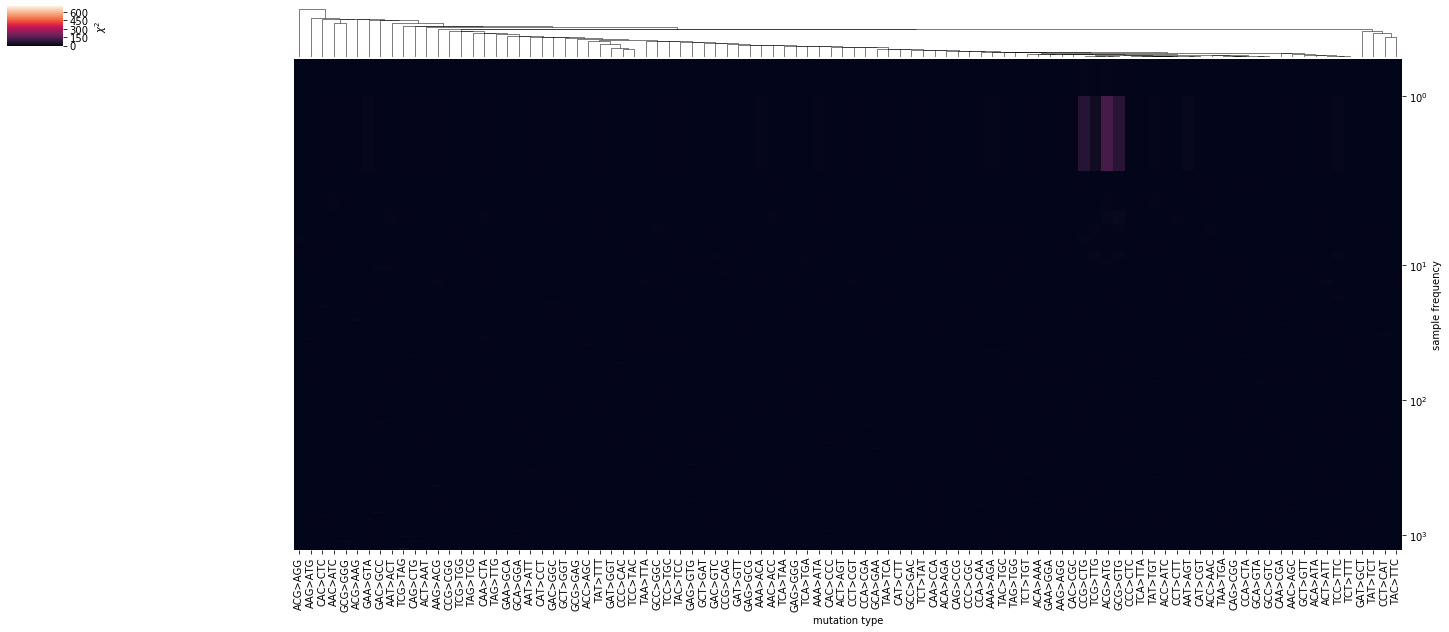

χ² goodness of fit 320486.97510235, p = 0.0


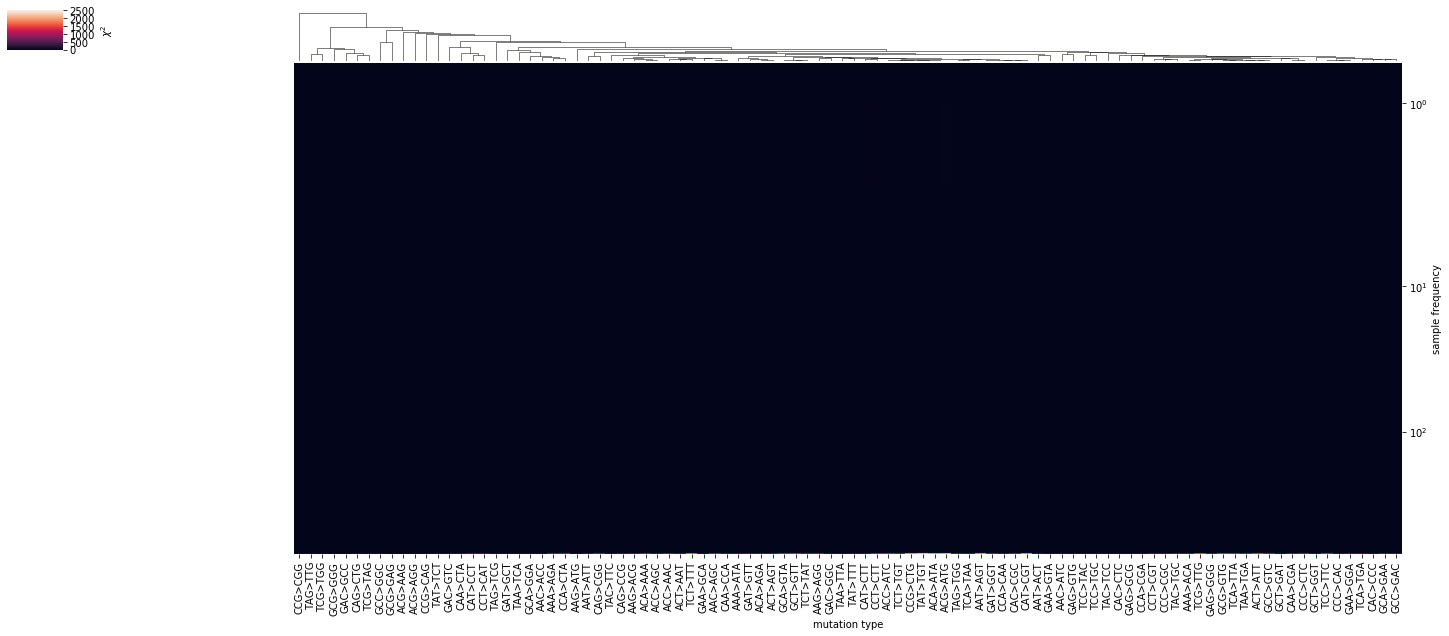

χ² goodness of fit 372249.4299538394, p = 0.0


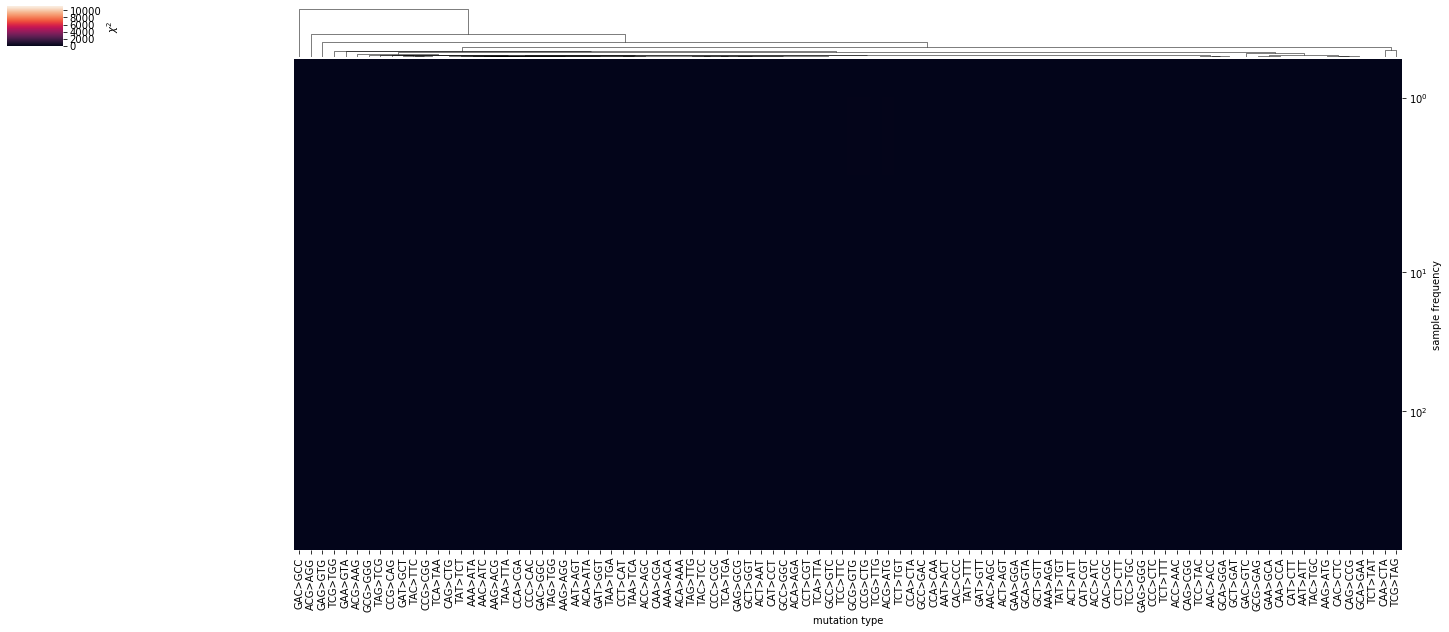

χ² goodness of fit 509774.63327712275, p = 0.0


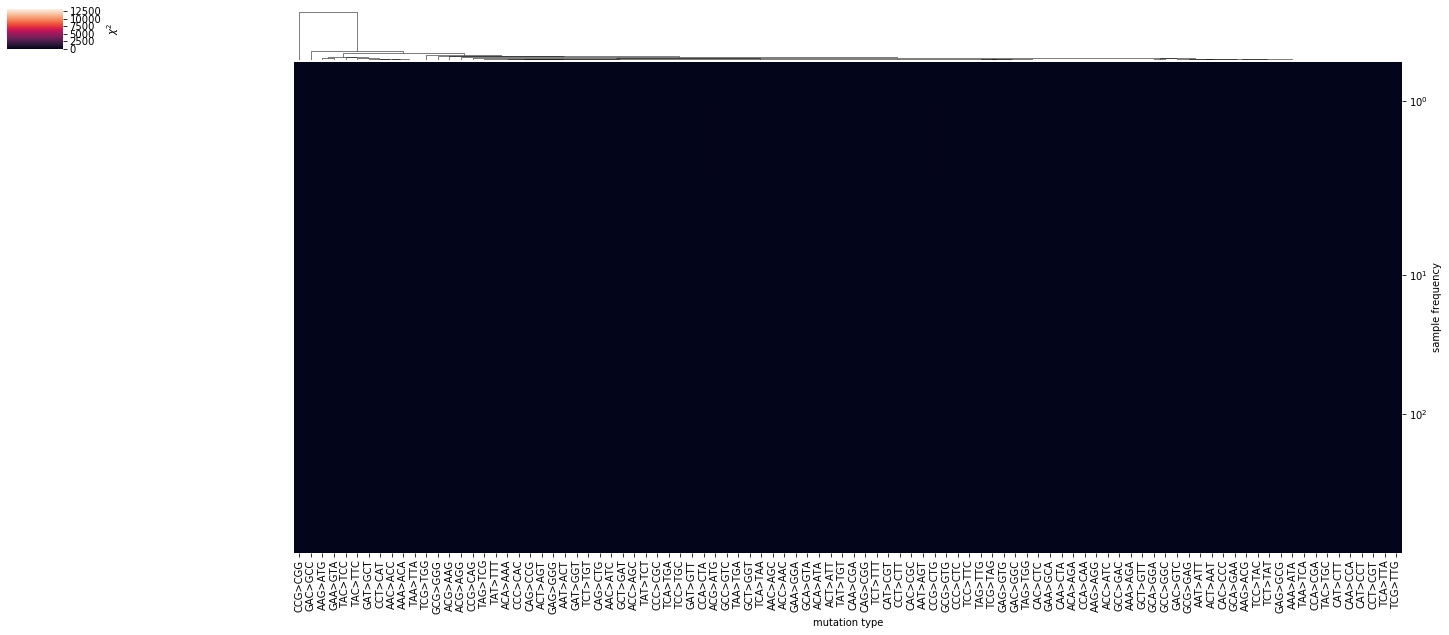

χ² goodness of fit 152311.22874304163, p = 0.0


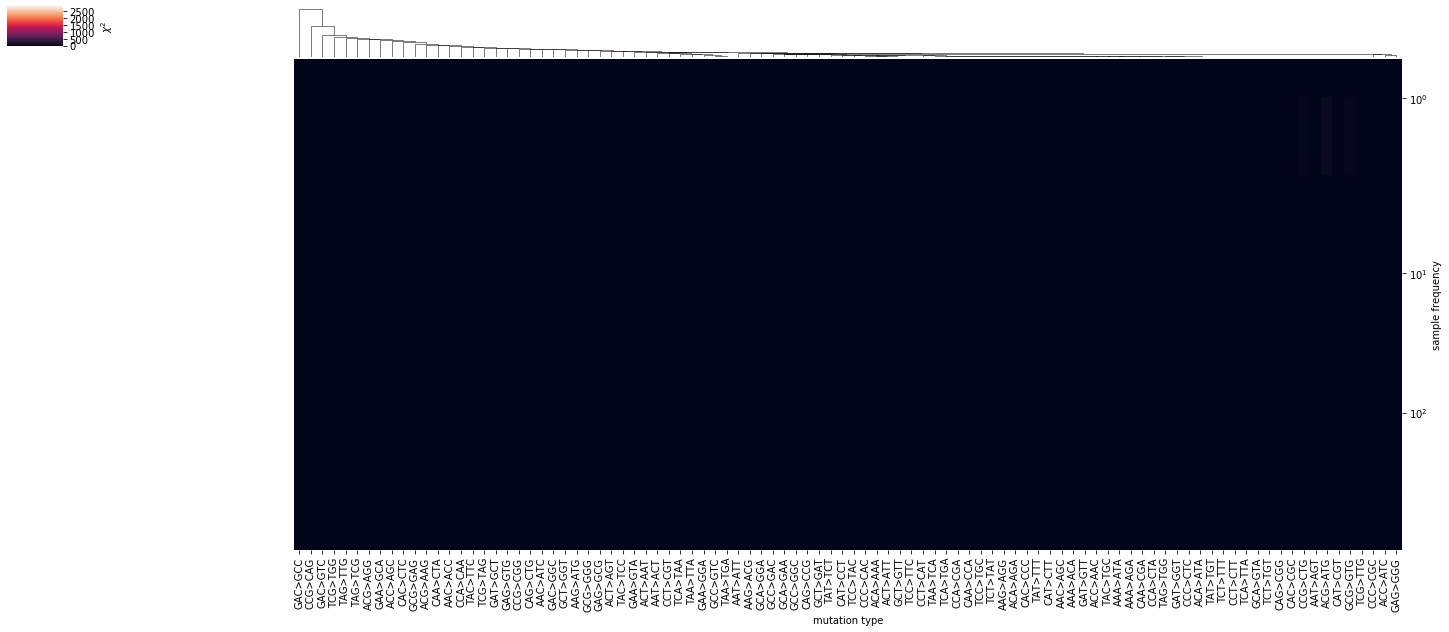

In [5]:
for pop in pops:
    ksfs_dict[pop].clustermap(figsize=(25, 10))
    # plt.savefig('/Users/williamdewitt/Downloads/1KG_heatmap.pdf', transparent=True)
    plt.show()

### TMRCA CDF

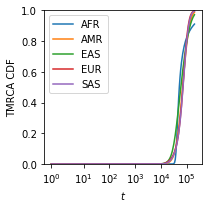

In [6]:
plt.figure(figsize=(3, 3))
for pop in pops:
    plt.plot(ksfs_dict[pop].η.change_points, ksfs_dict[pop].tmrca_cdf(), label=pop)
    plt.xlabel('$t$')
    plt.ylabel('TMRCA CDF')
    plt.ylim([0, 1])
    plt.xscale('symlog')
    plt.legend()
    plt.tight_layout()
plt.show()

AFR


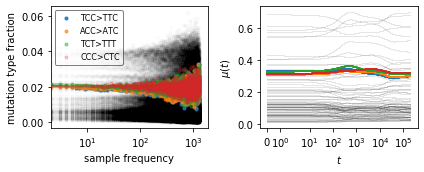

AMR


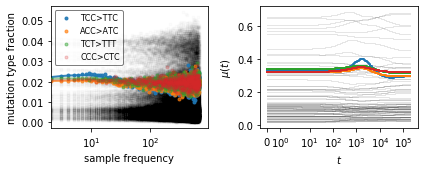

EAS


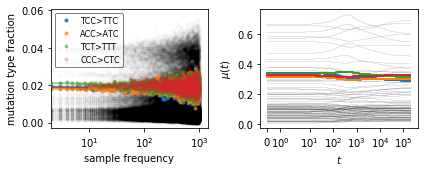

EUR


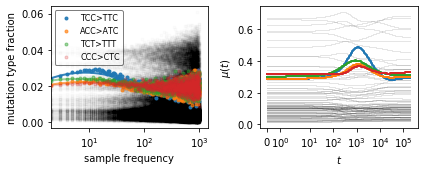

SAS


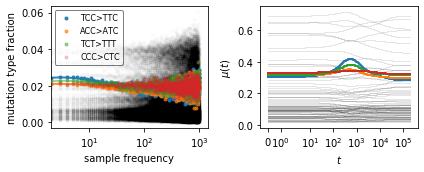

In [7]:
pulse_types = ('TCC>TTC', 'ACC>ATC', 'TCT>TTT', 'CCC>CTC')

for pop in pops:
    print(pop)
    plt.figure(figsize=(6, 2.5))
    plt.subplot(121)
    ksfs_dict[pop].plot(alpha=0.01, c='k', lw=2, normed=True, zorder=0)
    for color_idx, mut_type in enumerate(pulse_types):
        zorder = color_idx + 1
        alpha = 0.9 * (len(pulse_types) - color_idx) / len(pulse_types)
        ksfs_dict[pop].plot(mut_type, alpha=alpha, lw=2, c=f'C{color_idx}', normed=True, label=mut_type, zorder=zorder)
    plt.legend(loc=0, prop={'size': 8}, framealpha=0.5, edgecolor='k')
    plt.xlim([2, None])

    plt.subplot(122)
    ksfs_dict[pop].μ.plot(alpha=0.1, lw=1, c='k', normed=False)
    for mut_type in pulse_types:
        ksfs_dict[pop].μ.plot(types=[mut_type], lw=2, normed=False, label=mut_type)
    plt.legend().remove()#loc=2, prop={'size': 7.5})

    # plt.savefig('/Users/williamdewitt/Downloads/1KG.pdf', transparent=True)
    plt.show()

### Singular value spectrum of $Z$

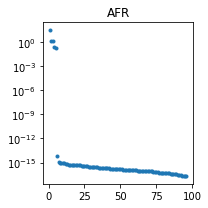

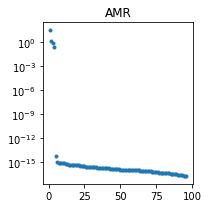

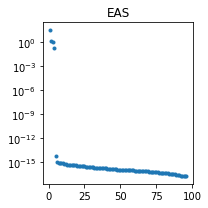

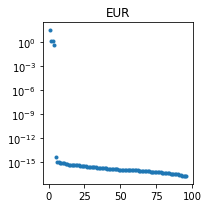

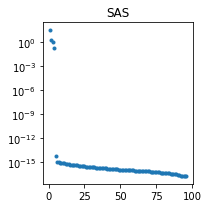

In [22]:
for pop in pops:
    plt.figure(figsize=(3, 3))
    plt.plot(range(1, 1 + min(ksfs_dict[pop].μ.Z.shape)), np.linalg.svd(ksfs_dict[pop].μ.Z, compute_uv=False), '.')
    plt.yscale('log')
    plt.title(pop)
    plt.tight_layout()
    plt.show()

Heatmap of the inferred mutation spectrum history, plotted as relative mutation intensity as in Harris and Pritchard

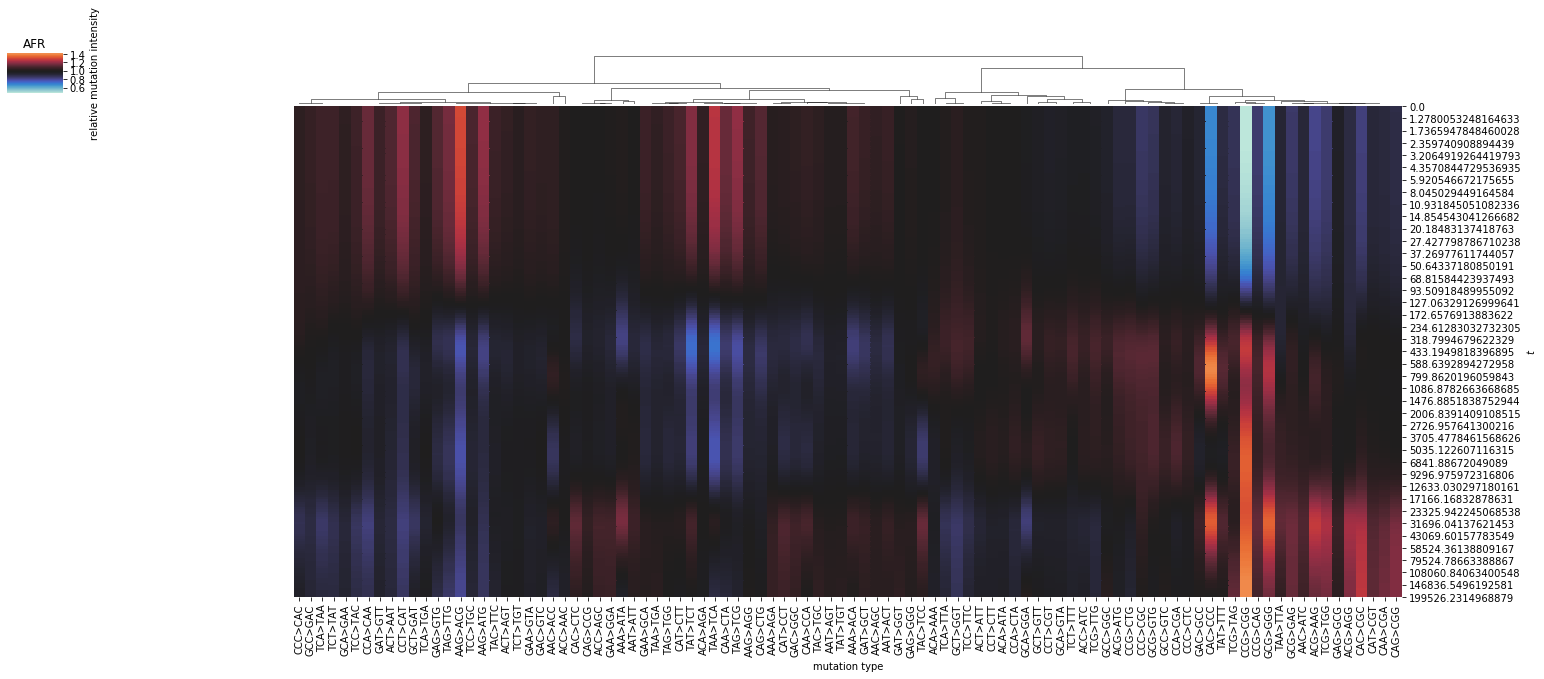

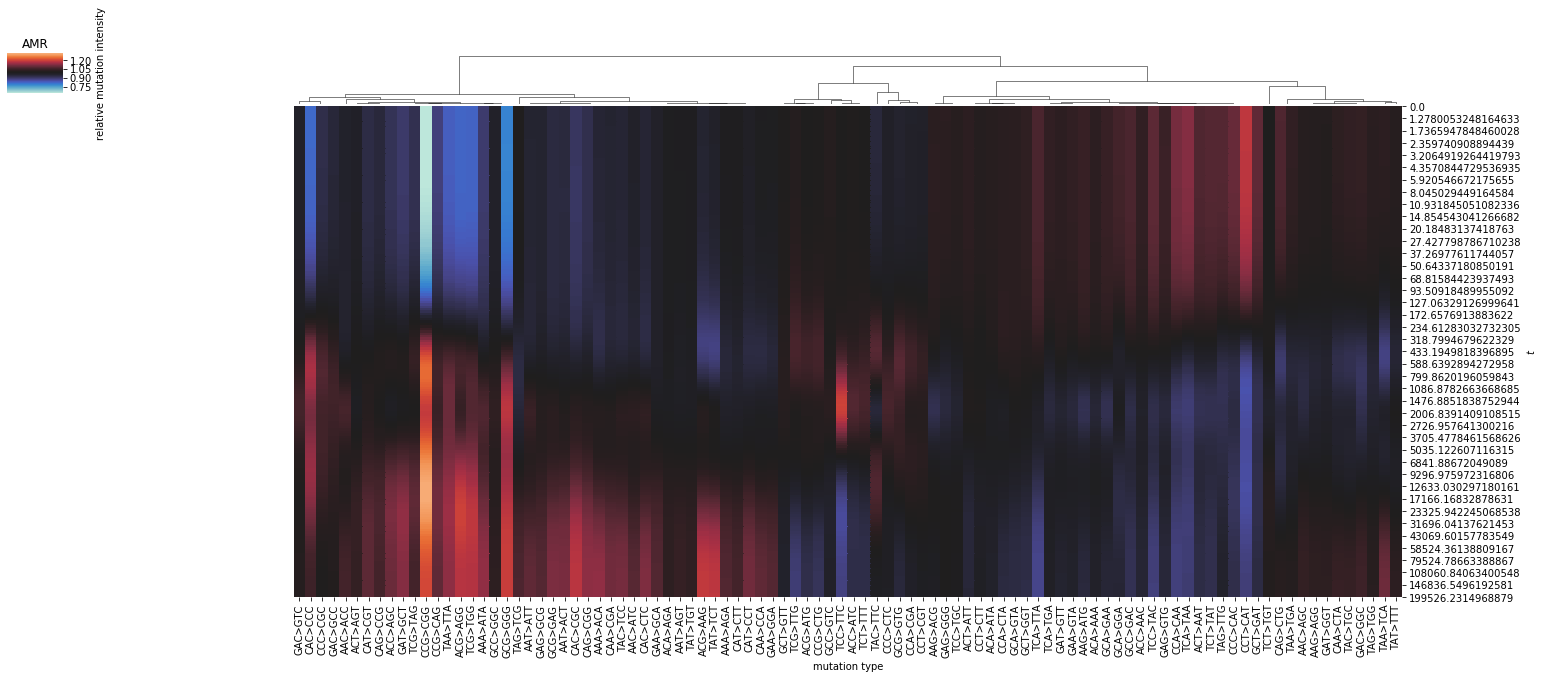

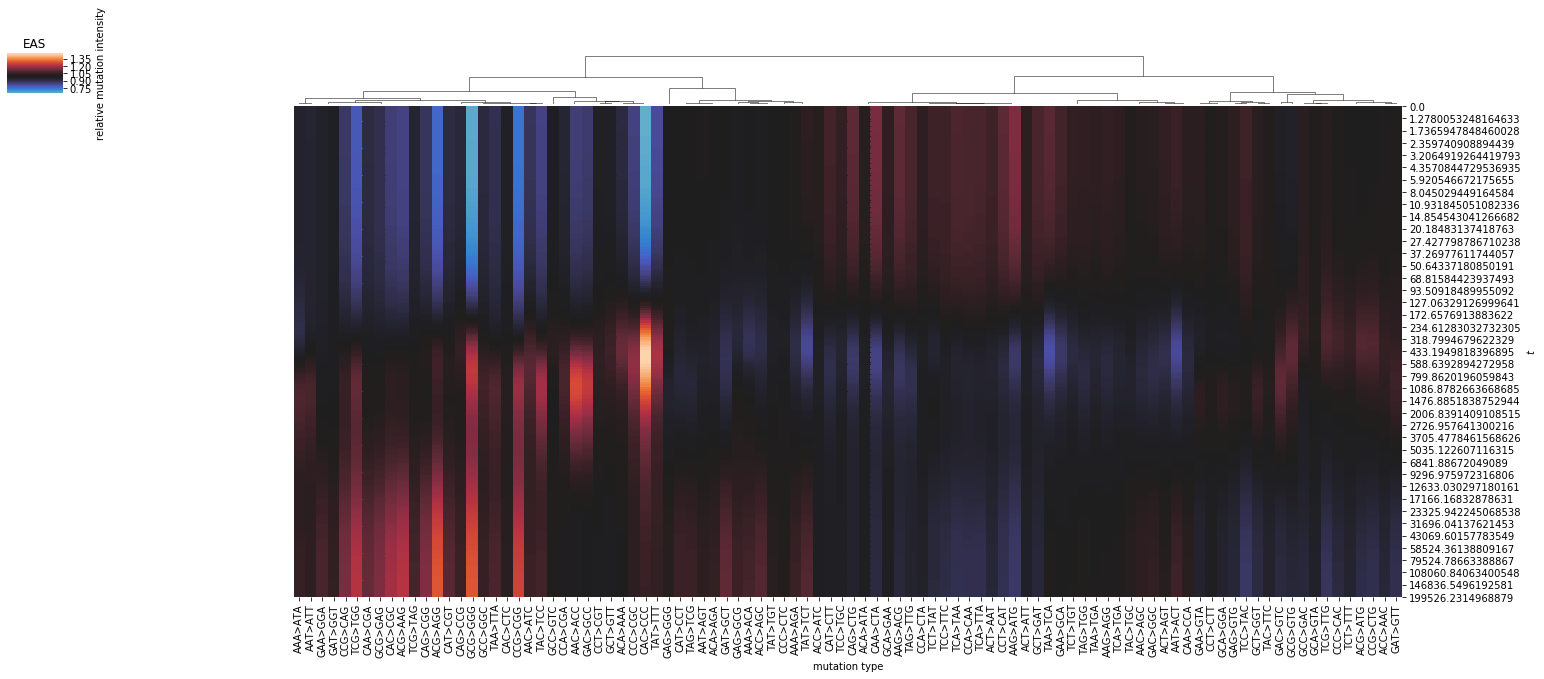

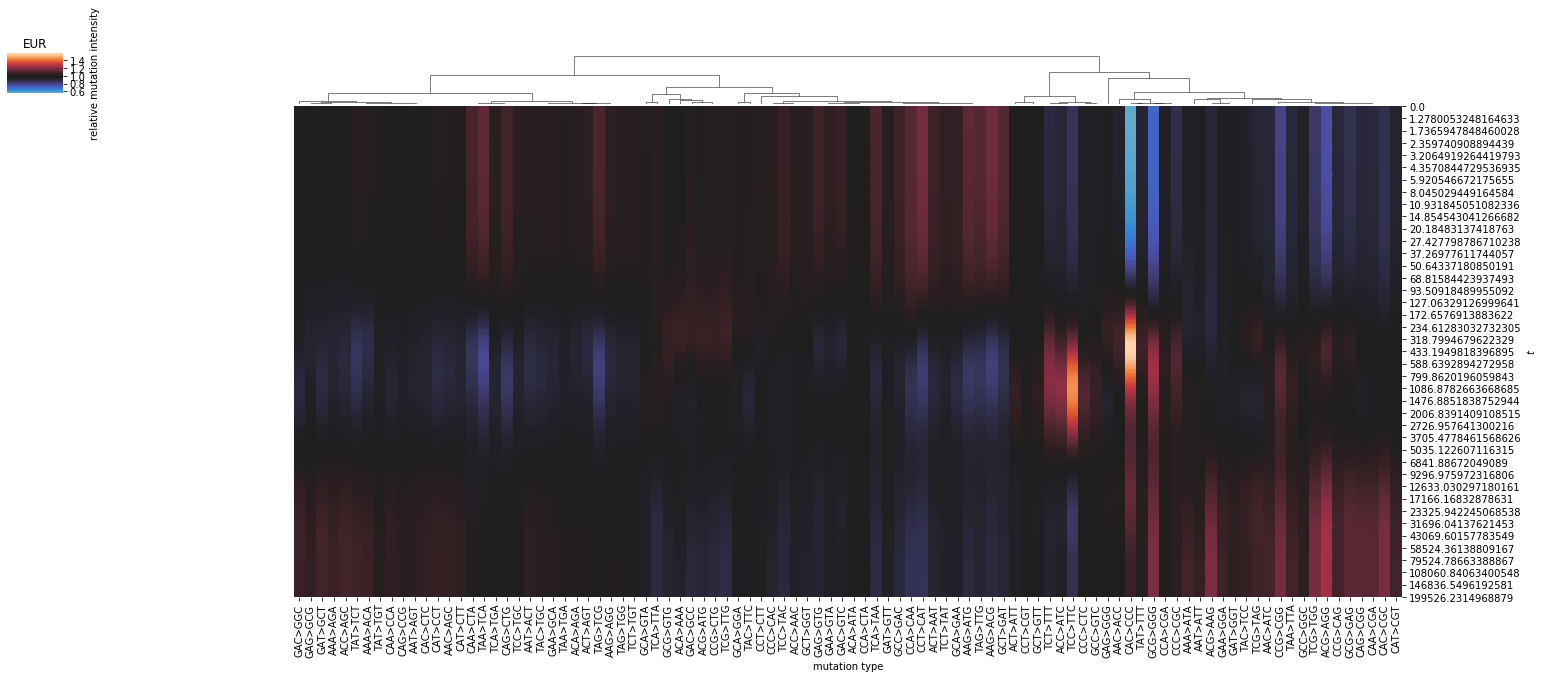

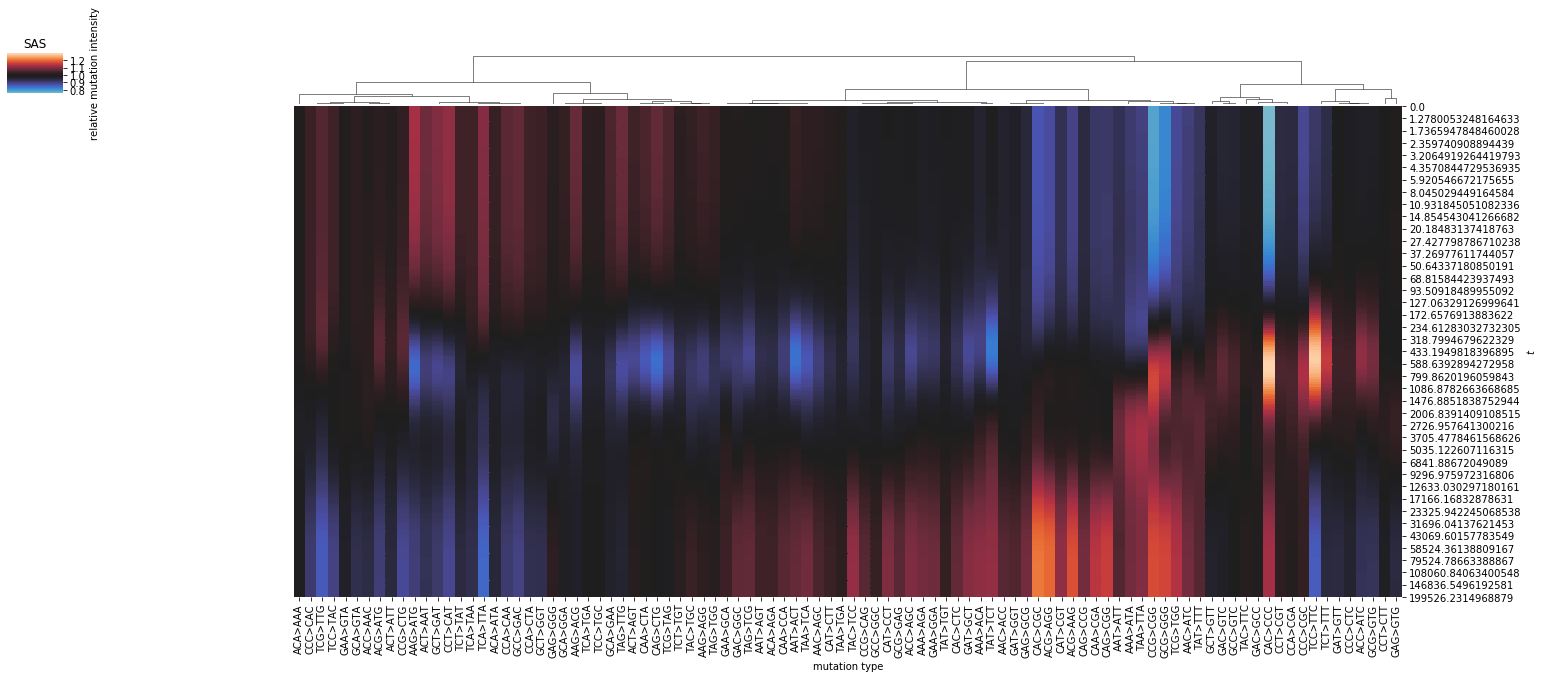

In [24]:
for pop in pops:
    ksfs_dict[pop].μ.clustermap(figsize=(25, 10))
    plt.title(pop)
    # plt.savefig('/Users/williamdewitt/Downloads/cluster.png', transparent=False)
    plt.show()

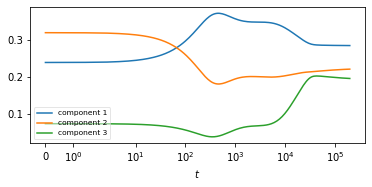

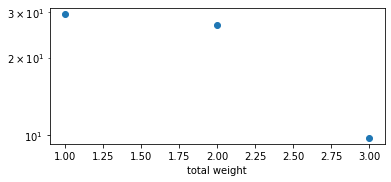

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


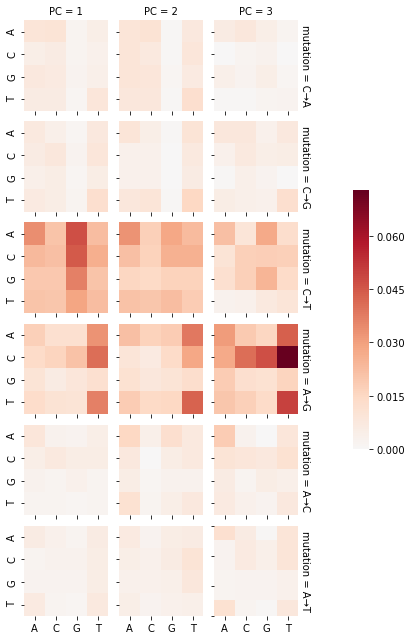

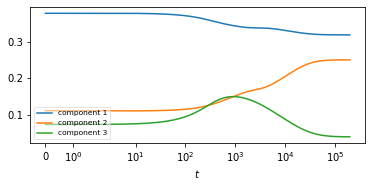

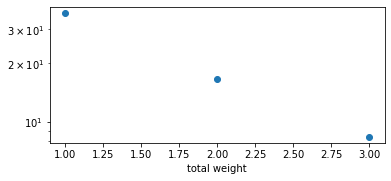

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


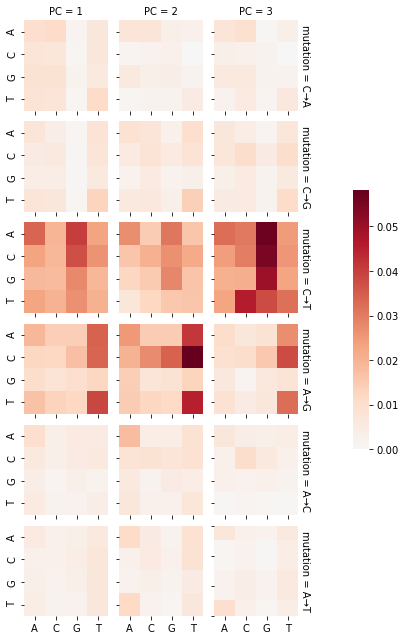

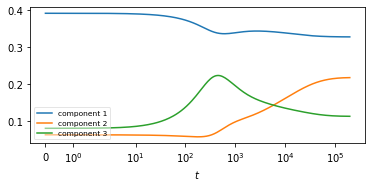

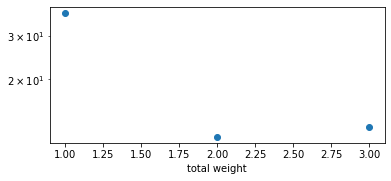

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


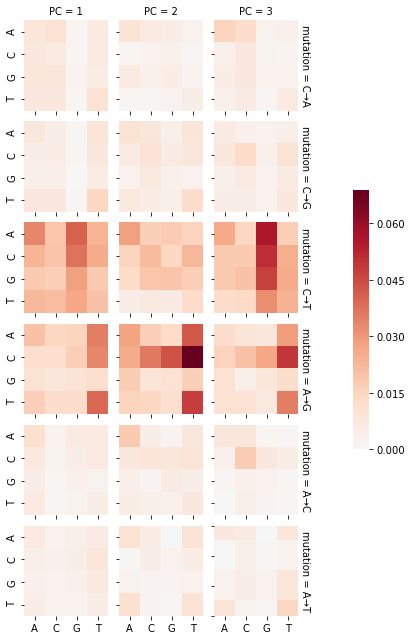

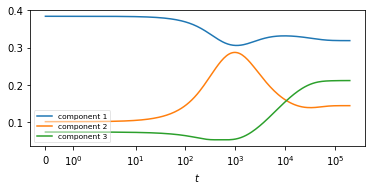

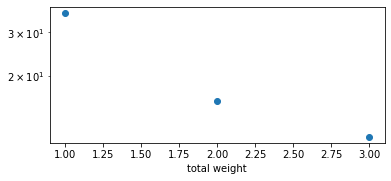

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


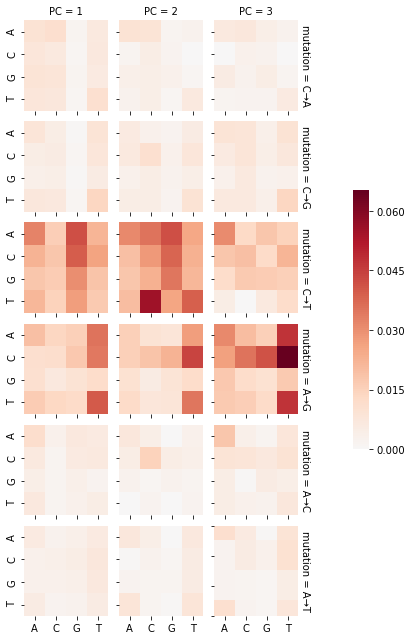

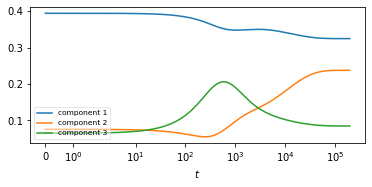

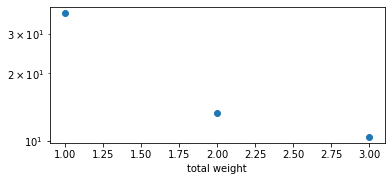

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


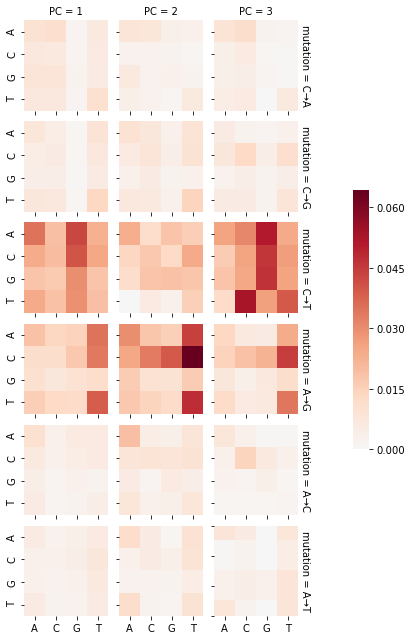

In [12]:
for pop in pops:
    n_components = 3
    nmf = NMF(alpha=5e-1, n_components=n_components, verbose=False, tol=1e-10, max_iter=10000)
    W = nmf.fit_transform(ksfs_dict[pop].μ.Z.T).T

    # norms = nmf.components_.T.mean(0, keepdims=True)
    H = nmf.components_.T# / norms
    # W = norms.T * W

    total_weight = W.sum(1, keepdims=True)
    W = W / total_weight

    plt.figure(figsize=(6, 2.5))          
    for i in range(n_components):
        plt.plot(np.concatenate(([0], ksfs_dict[pop].μ.change_points)), H[:, i], label=f'component {i + 1}')
    plt.xlabel('$t$')
    plt.xscale('symlog')
    plt.legend(loc='lower left', prop={'size': 7.5}, framealpha=.5)
    plt.show()

    plt.figure(figsize=(6, 2.5))          
    plt.plot(range(1, n_components + 1), total_weight, 'o')
    plt.xlabel('component')
    plt.xlabel('total weight')
    plt.yscale('log')
    plt.show()

    df = pd.DataFrame(data=W.T,
                      index=ksfs_dict[pop].μ.mutation_types,
                      columns=range(1, n_components + 1))

    df_min = df.values.min()
    df_max = df.values.max()

    df["5'"] = df.index.str[0]
    df['mutation'] = df.index.str[1].str.cat(df.index.str[5], sep='→')
    df["3'"] = df.index.str[2]

    df = df.melt(id_vars=["5'", 'mutation', "3'"], var_name='PC')

    g = sns.FacetGrid(df, row='mutation', col='PC',
                      row_order=('C→A', 'C→G', 'C→T', 'A→G', 'A→C', 'A→T'),
                      margin_titles=True,
                      size=1.5
                      )

    def facet_heatmap(data, color, **kwargs):
        data = data.pivot(index="5'", columns="3'", values='value')
        sns.heatmap(data, **kwargs)

    # colorbar axes
    cbar_ax = g.fig.add_axes([1.1, .3, .05, .4])

    g = g.map_dataframe(facet_heatmap,
                        cbar_ax=cbar_ax,
                        cmap='RdBu_r',
                        center=0,
                        vmin=df_min, vmax=df_max
                        )

    # so the colorbar doesn't overlap the plot
    # g.fig.subplots_adjust(right=.9)
#     plt.savefig('/Users/williamdewitt/Downloads/PC_heatmap.pdf')
    plt.show()

In [50]:
animation.writers.list()

['imagemagick', 'imagemagick_file', 'html']

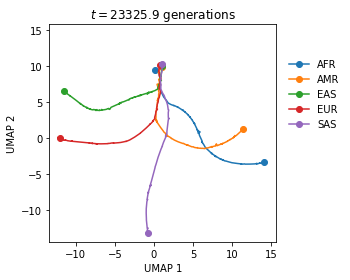

In [77]:
from umap import UMAP
import matplotlib.animation as animation
# from IPython.display import HTML

time = np.concatenate(([0], ksfs_dict[pop].μ.change_points))


embedding = UMAP(n_components=2, n_neighbors=15, min_dist=0)
# embedding = PCA(n_components=2)
embedding.fit(np.concatenate(tuple(ksfs_dict[pop].μ.Z for pop in pops)))
Z_transform = embedding.transform(np.concatenate(tuple(ksfs_dict[pop].μ.Z for pop in pops)))

Z_transform_dict = {pop:embedding.transform(ksfs_dict[pop].μ.Z) for pop in pops}

fig, ax = plt.subplots(figsize=(5, 4))
lines = [plt.plot(*Z_transform_dict[pop][0, :],
                  '-o', c=f'C{idx}', label=pop, markevery=[0, -1])[0]
         for idx, pop in enumerate(pops)]

def init():  # only required for blitting to give a clean slate.
    ax.set_title(f'$t = {time[0]:.1f}$ generations')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
#     ax.set_xlabel('PC 1')
#     ax.set_ylabel('PC 2')    
    ax.set_xlim(1.1 * Z_transform[:, 0].min(), 1.1 * Z_transform[:, 0].max())
    ax.set_ylim(1.1 * Z_transform[:, 1].min(), 1.1 * Z_transform[:, 1].max())    
    for idx, pop in enumerate(pops):
        lines[idx].set_data(*Z_transform_dict[pop][0, :])
    ax.legend(loc=(1.04, 0.5), fancybox=True, framealpha=0)
    plt.tight_layout()
    return lines


def animate(i):
    ax.set_title(f'$t = {time[i]:.1f}$ generations')
    for idx, pop in enumerate(pops):
        lines[idx].set_data(*Z_transform_dict[pop][:(i + 1), :].T)    
    return lines


init()
animate(len(time) - 36)
plt.savefig(f'foo.TRANSPARENT.pdf', transparent=True)


# ani = animation.FuncAnimation(fig, animate, init_func=init, frames=range(len(time)), blit=True)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

# plt.show()
# ani.save('foo.mp4', fps=24,
#          savefig_kwargs={'transparent': True, 'facecolor': 'none'}
#          )

# HTML(ani.to_jshtml())

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
  # This is added back by InteractiveShellApp.init_path()


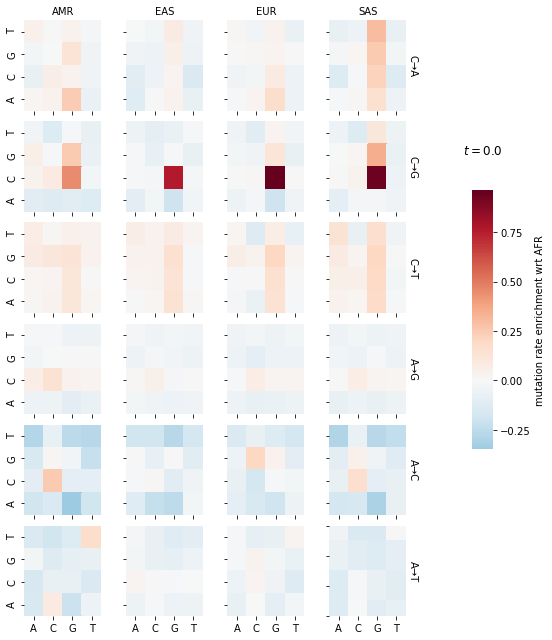

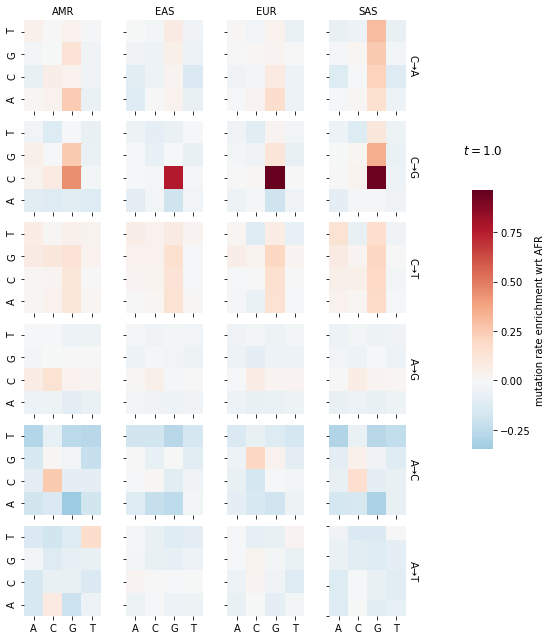

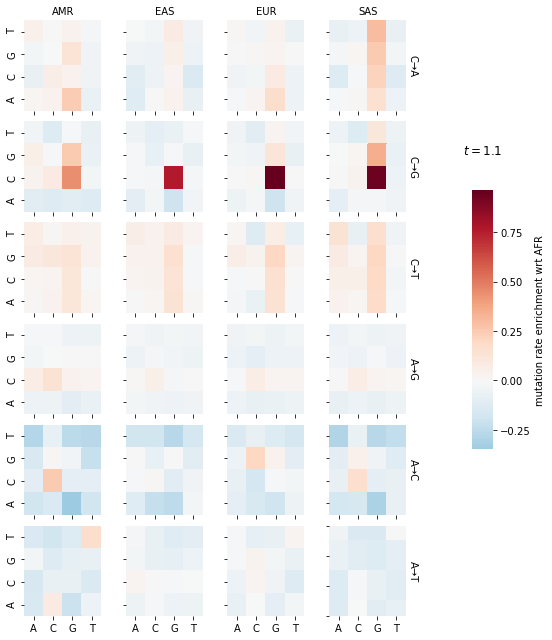

KeyboardInterrupt: 

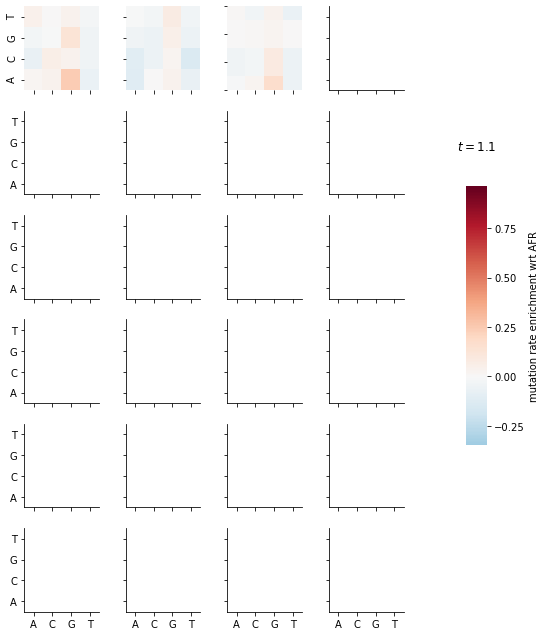

In [66]:
%matplotlib inline
foo = np.concatenate(tuple((ksfs_dict[pop].μ.Z - ksfs_dict['AFR'].μ.Z) / ksfs_dict['AFR'].μ.Z for pop in pops if pop is not 'AFR')).T
vmin = foo.min()
vmax = foo.max()
for i in range(len(time)):
    df = pd.DataFrame(data=np.concatenate(tuple([(ksfs_dict[pop].μ.Z[i, :] - ksfs_dict['AFR'].μ.Z[i, :]) / ksfs_dict['AFR'].μ.Z[i, :]] for pop in pops if pop is not 'AFR')).T,
                      index=ksfs_dict[pop].μ.mutation_types,
                      columns=[pop for pop in pops if pop is not 'AFR'])

    df["5'"] = df.index.str[0]
    df['mutation'] = df.index.str[1].str.cat(df.index.str[5], sep='→')
    df["3'"] = df.index.str[2]

    df = df.melt(id_vars=["5'", 'mutation', "3'"], var_name='population')

    g = sns.FacetGrid(df, row='mutation', col='population',
                      row_order=('C→A', 'C→G', 'C→T', 'A→G', 'A→C', 'A→T'),
                      margin_titles=True,
                      size=1.5
                      )

    def facet_heatmap(data, color, **kwargs):
        data = data.pivot(index="5'", columns="3'", values='value')
        data.sort_index(ascending=False, inplace=True)
        ax = sns.heatmap(data, **kwargs, cbar_kws={'label': 'mutation rate enrichment wrt AFR'})

    # colorbar axes
    cbar_ax = g.fig.add_axes([1.1, .3, .05, .4])
    cbar_ax.set_title(f'$t = {time[i]:.1f}$\n\n')

    g = g.map_dataframe(facet_heatmap,
                        cbar_ax=cbar_ax,
                        cmap='RdBu_r',
                        center=0,
                        vmin=vmin, vmax=vmax
                        )
    for ax in g.axes.flat:
        plt.setp(ax.texts, text="")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    # so the colorbar doesn't overlap the plot
    # g.fig.subplots_adjust(right=.9)

#     plt.savefig(f'bar.{i:03d}.png', bbox_extra_artists=(cbar_ax,),  bbox_inches='tight')
    plt.show()

/net/harris/vol1/users/wsdewitt/anaconda3/envs/mushi/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
  # Remove the CWD from sys.path while we load stuff.


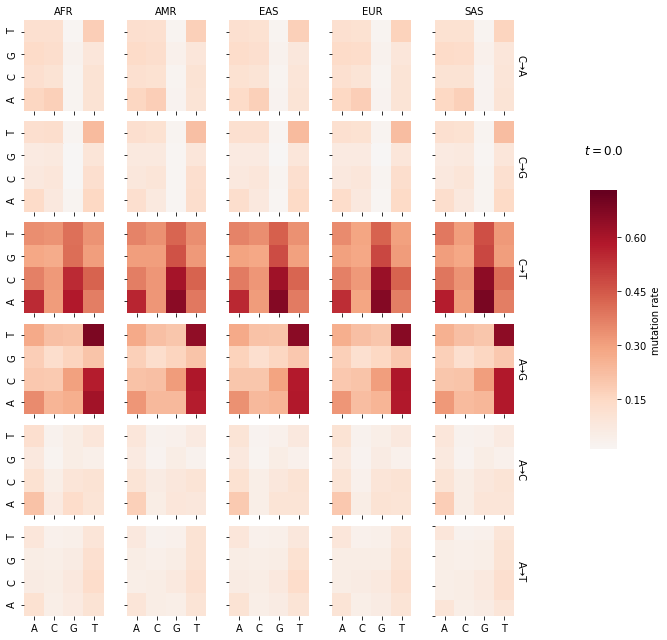

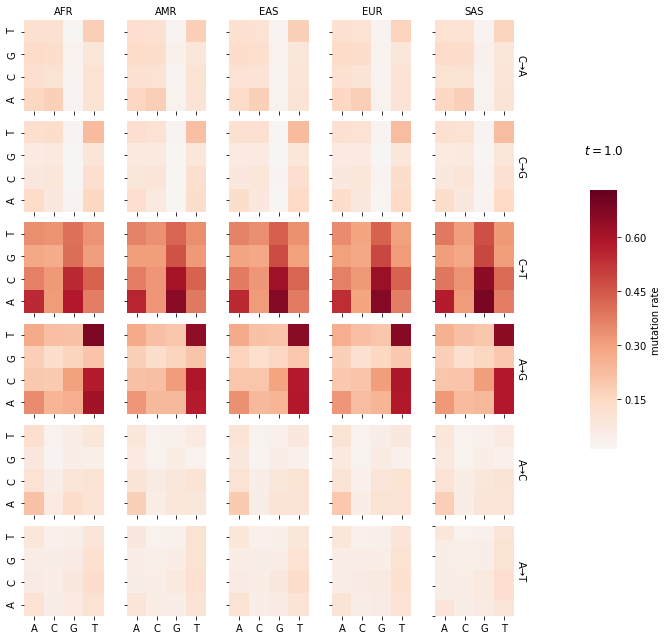

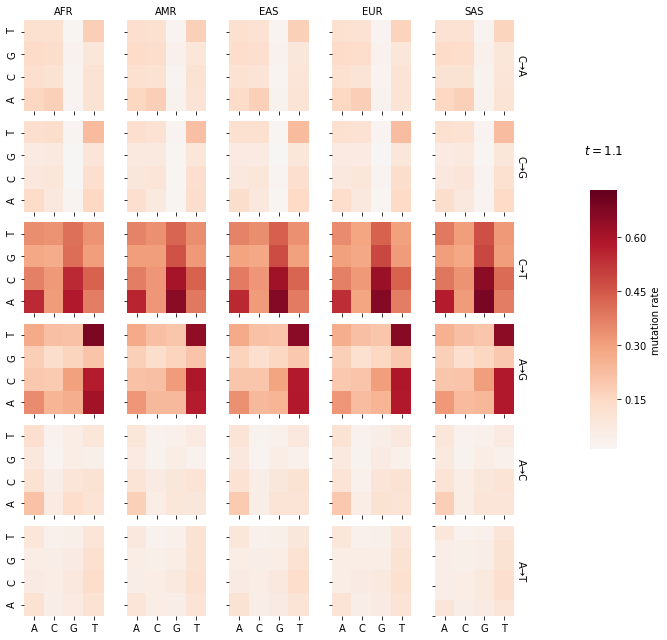

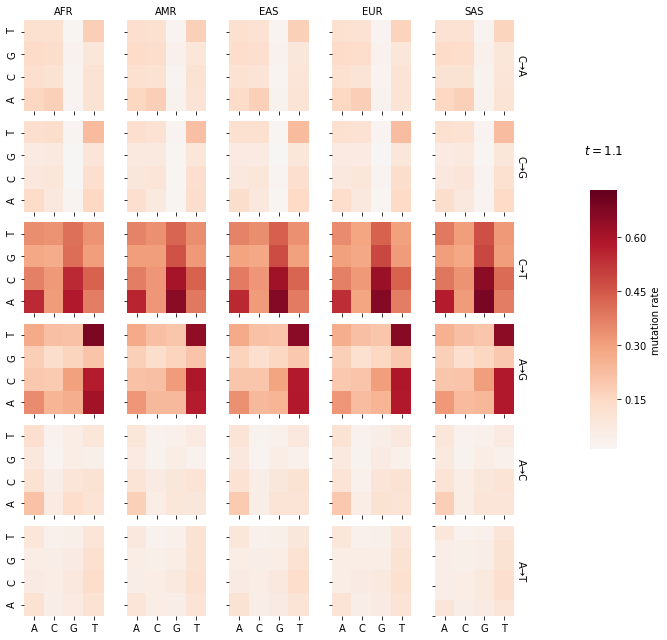

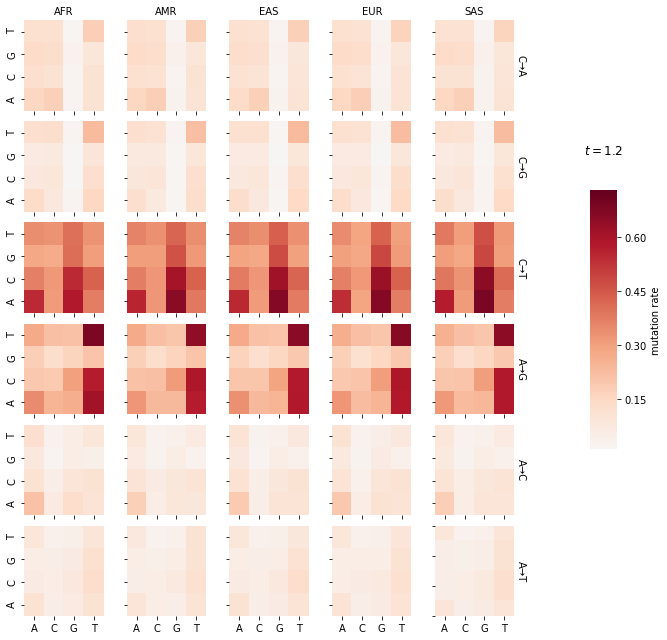

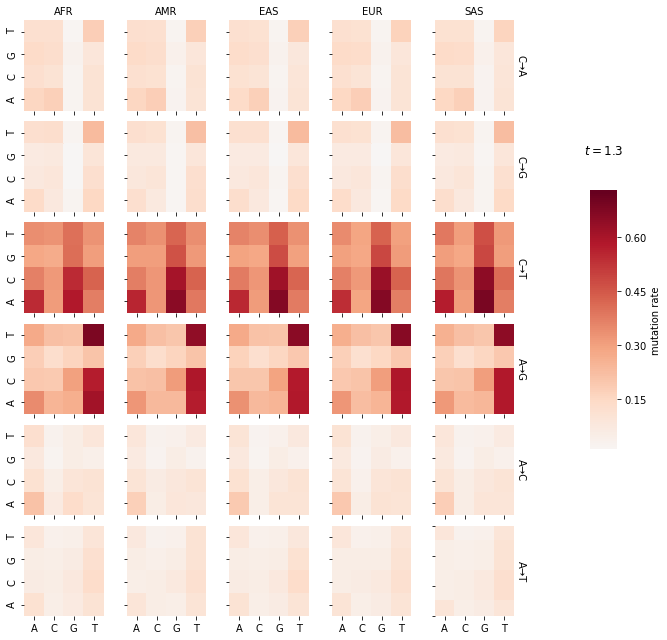

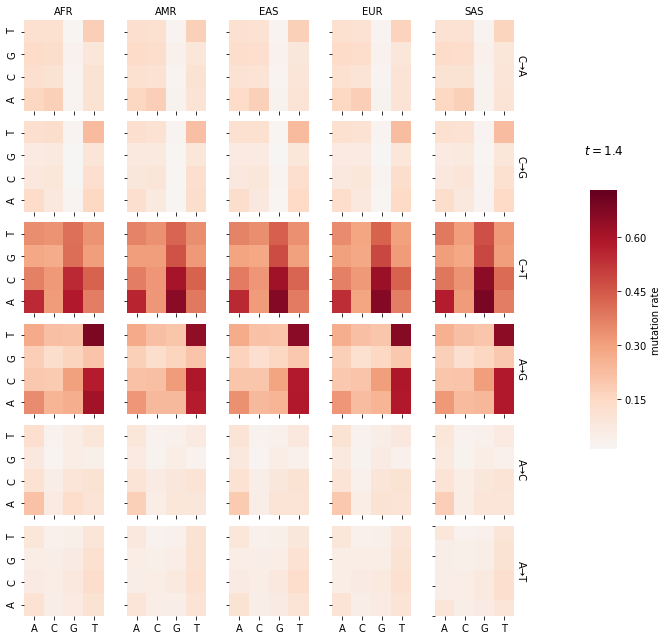

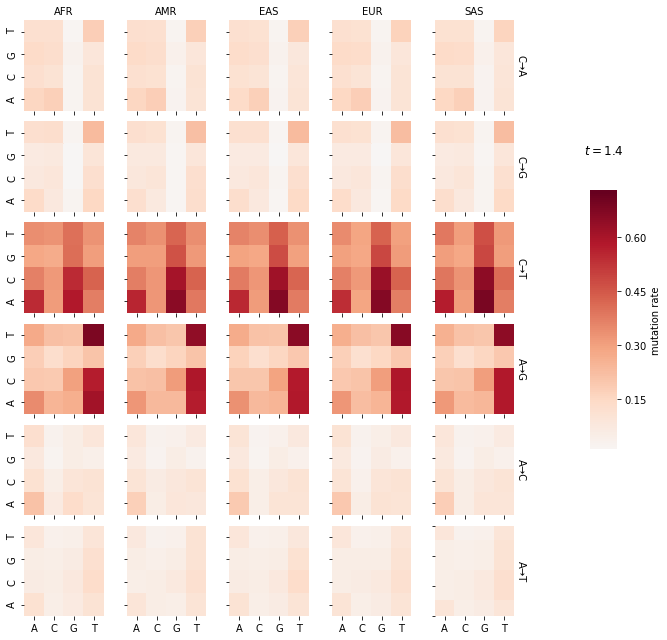

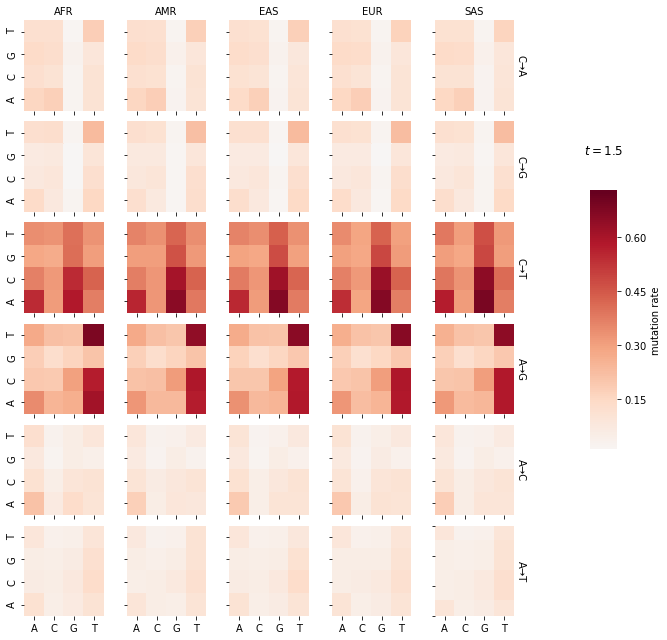

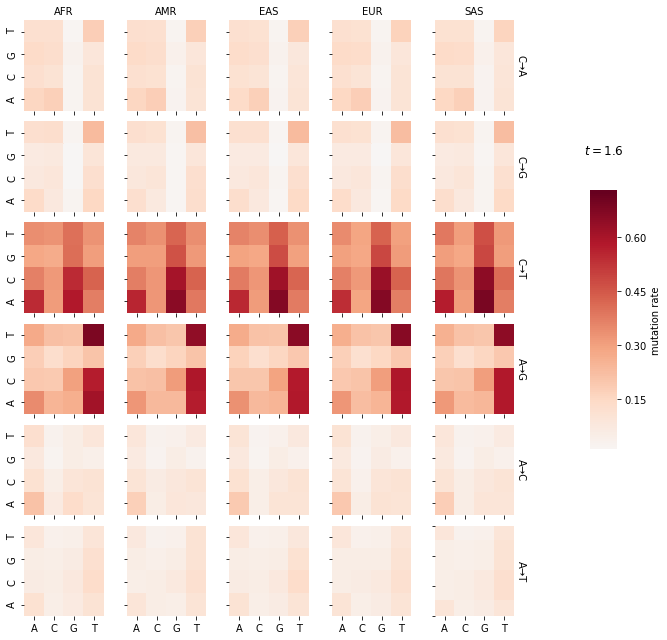

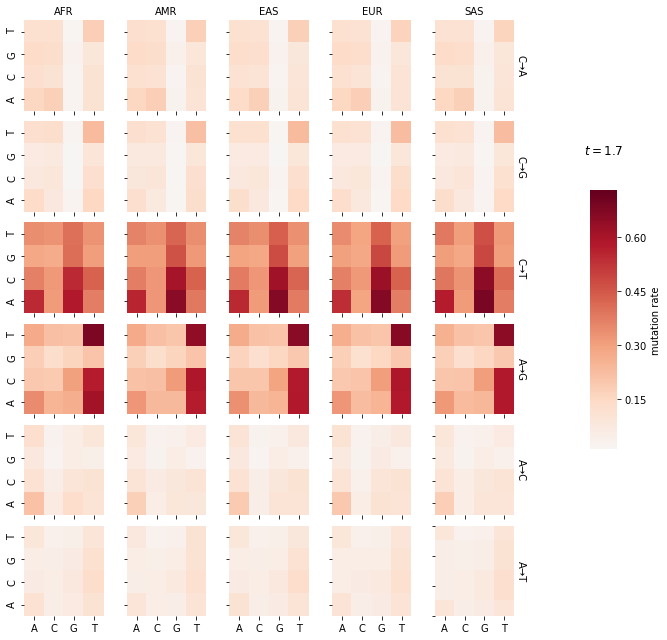

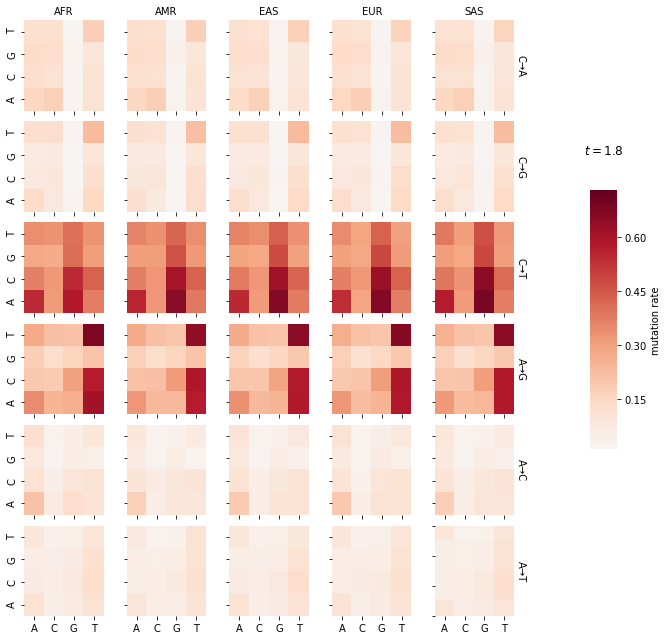

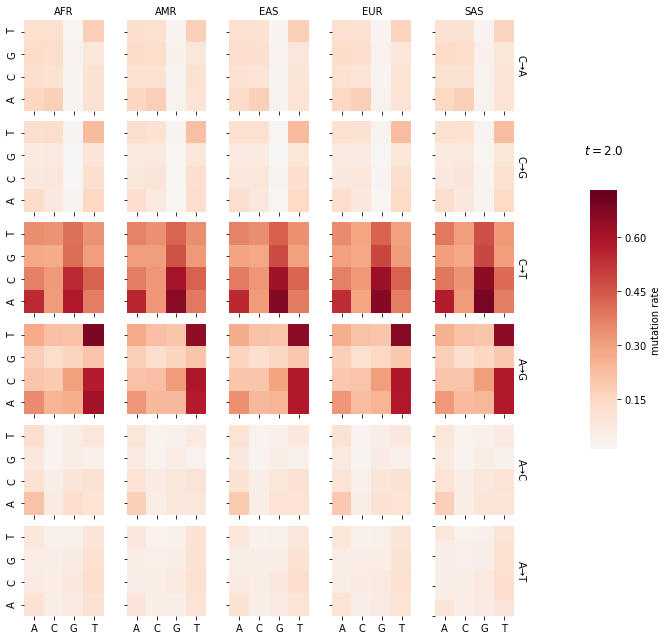

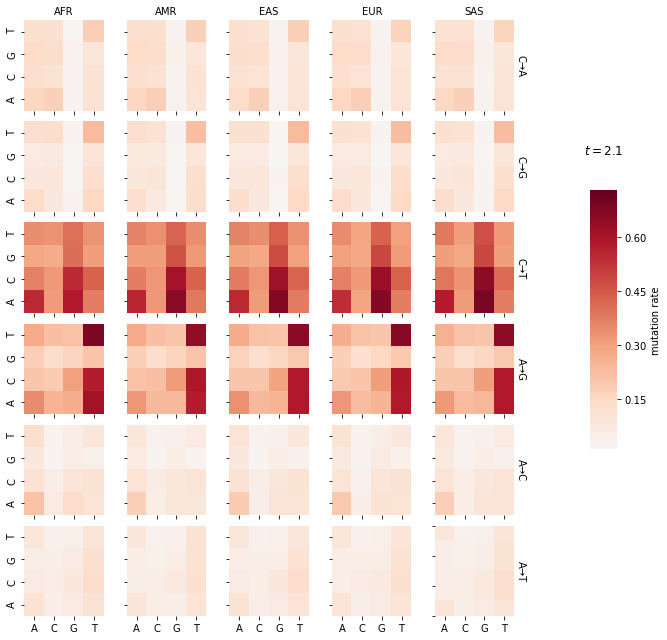

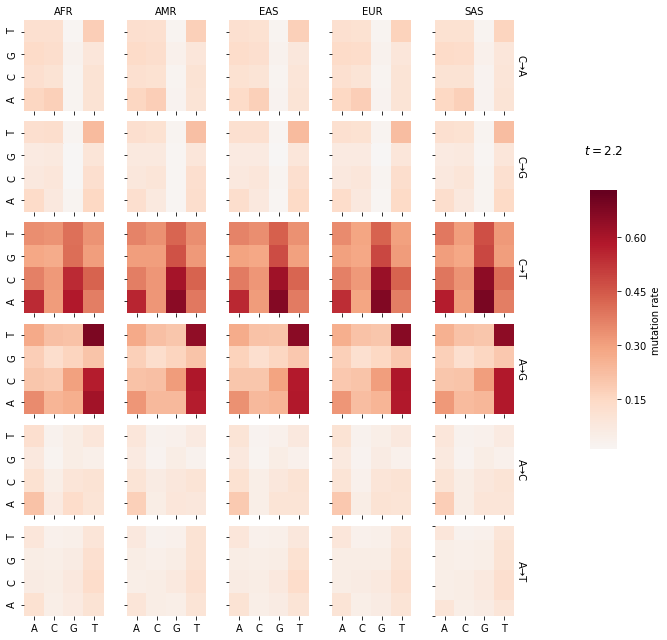

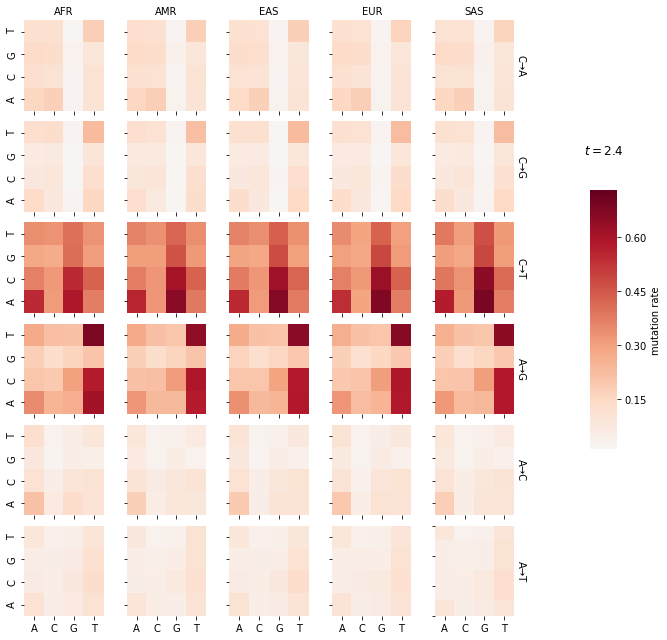

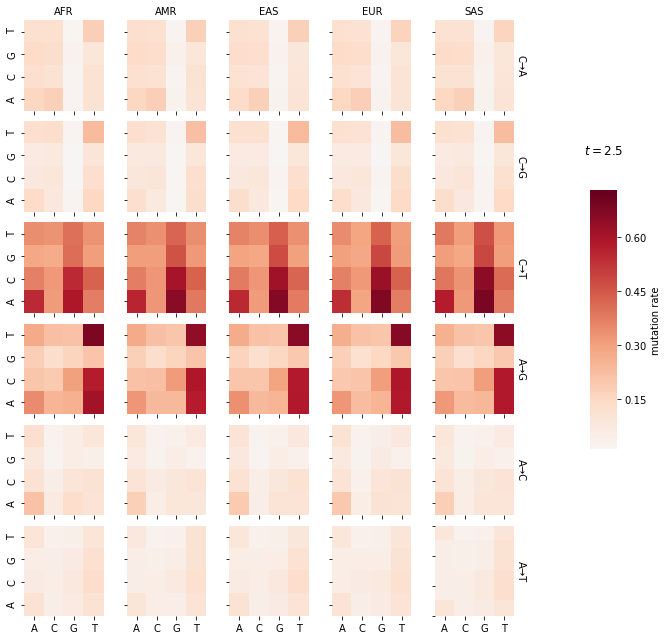

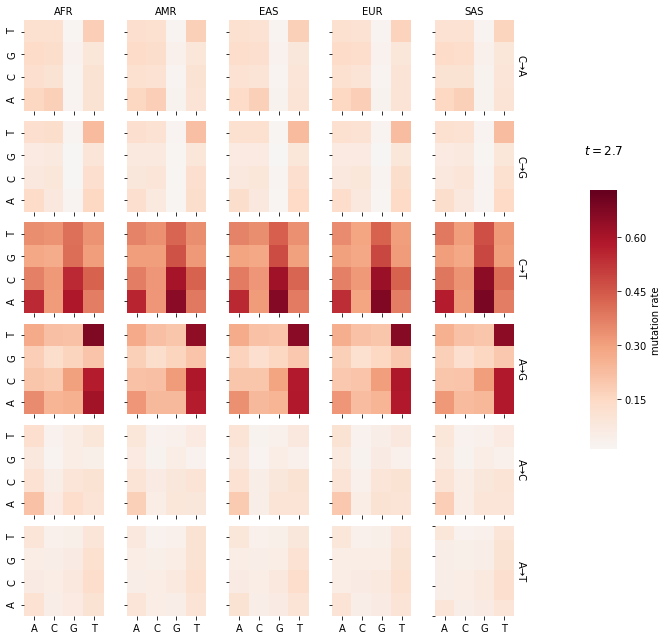

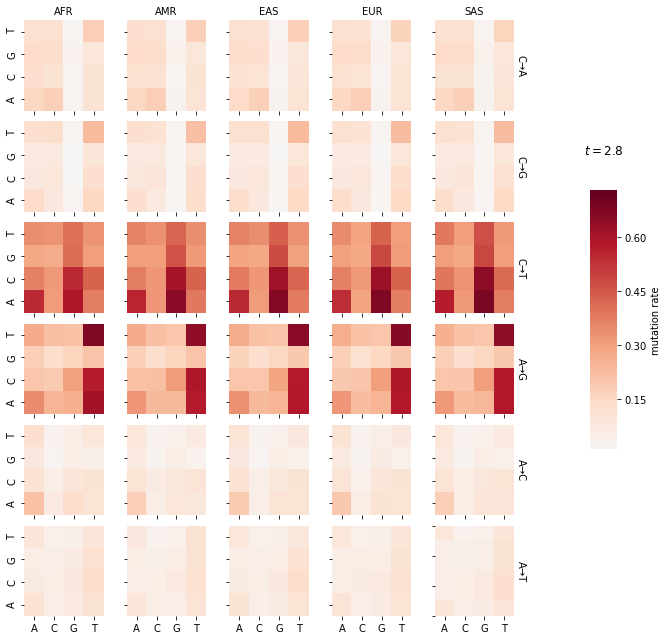

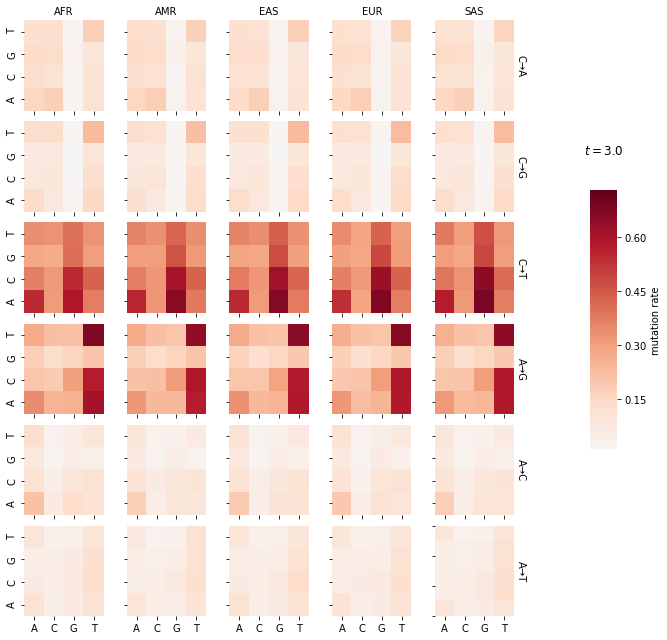

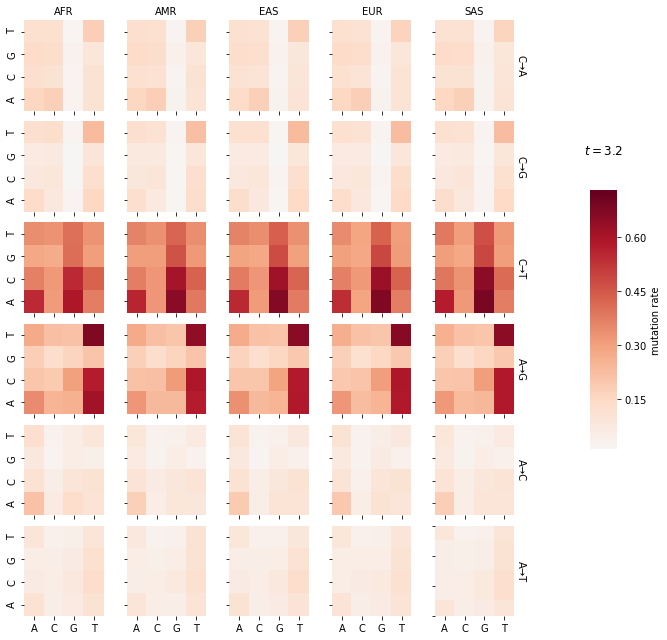

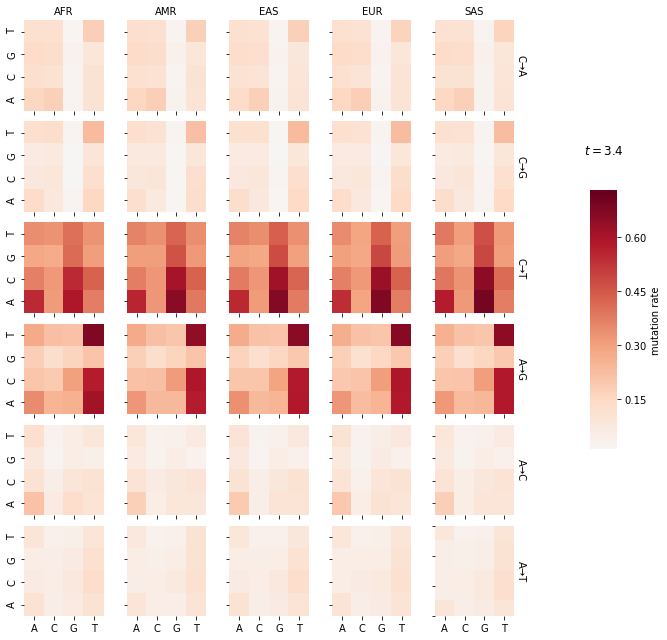

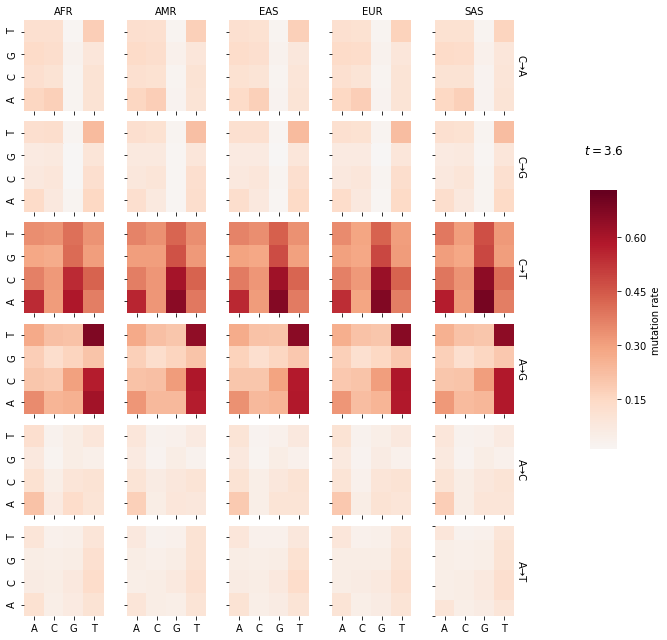

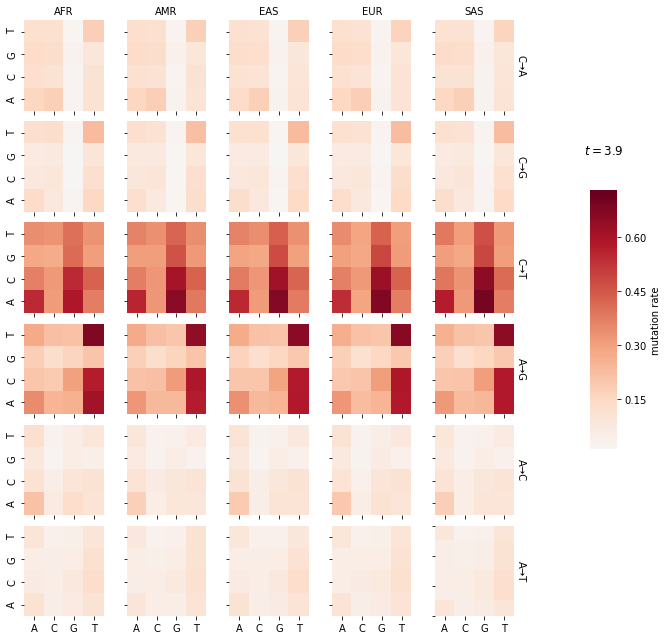

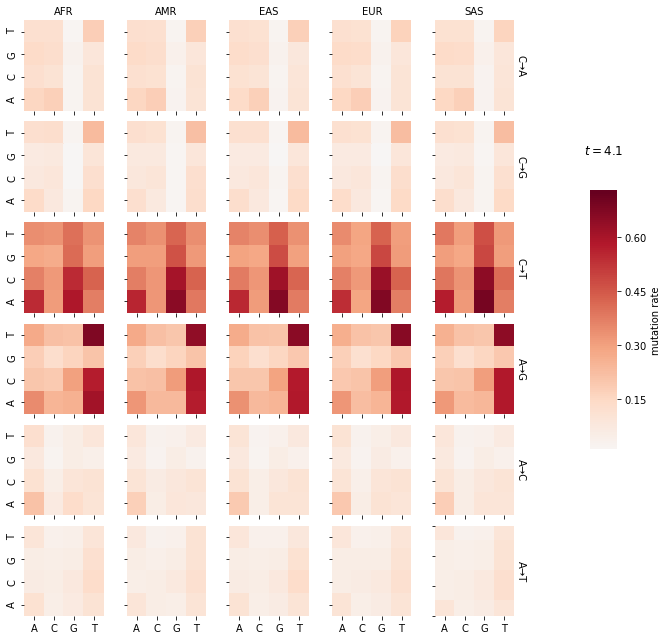

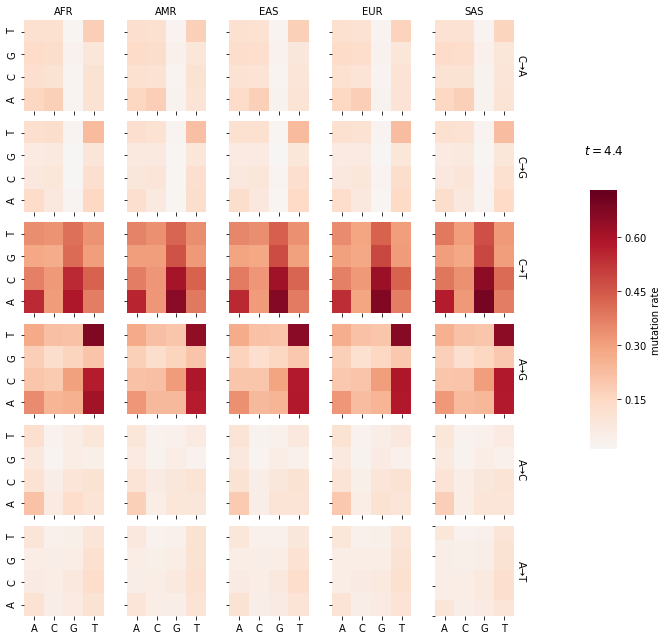

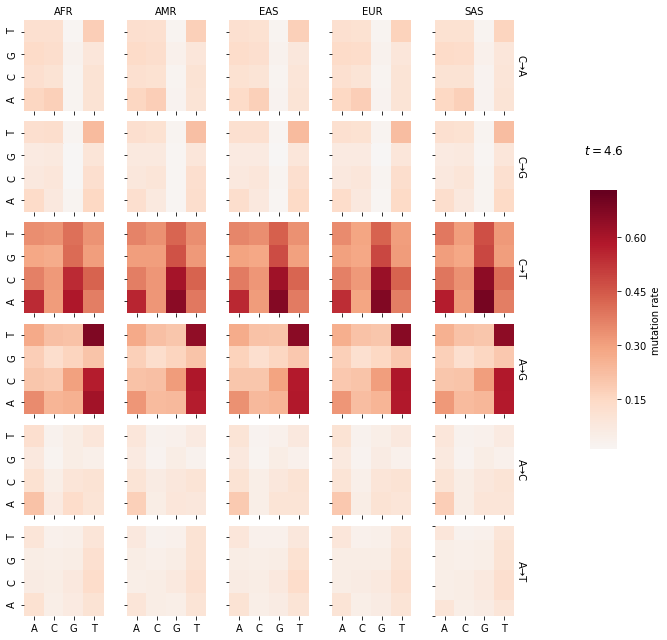

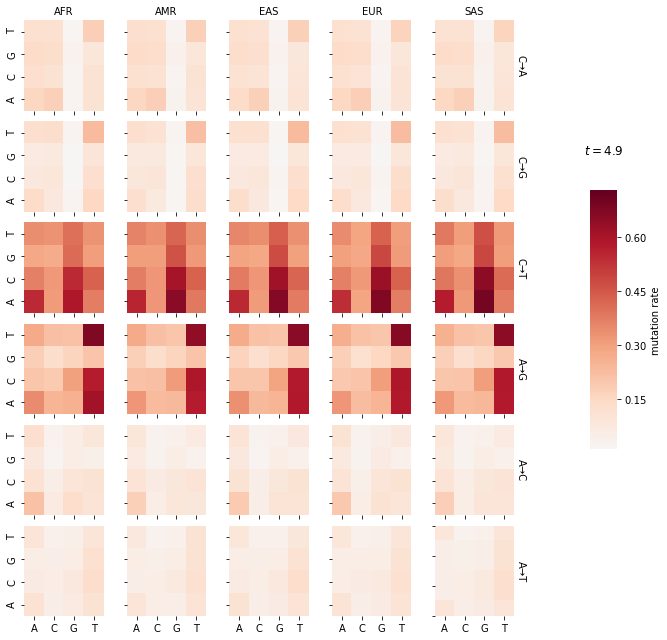

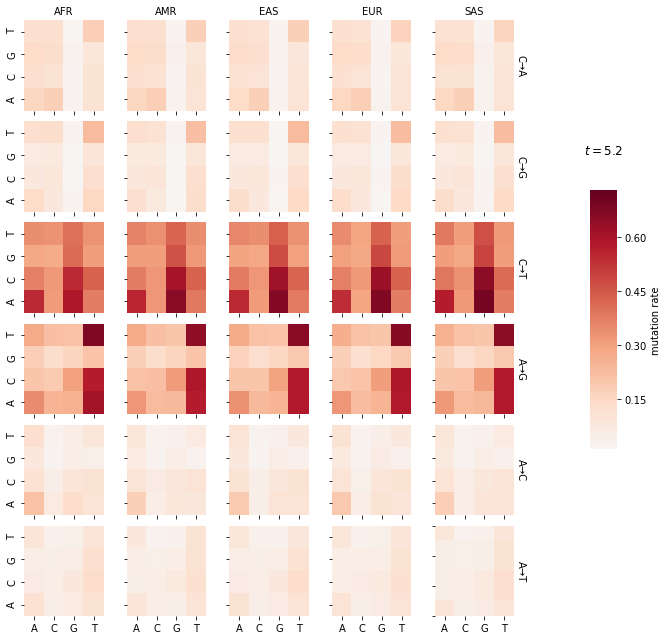

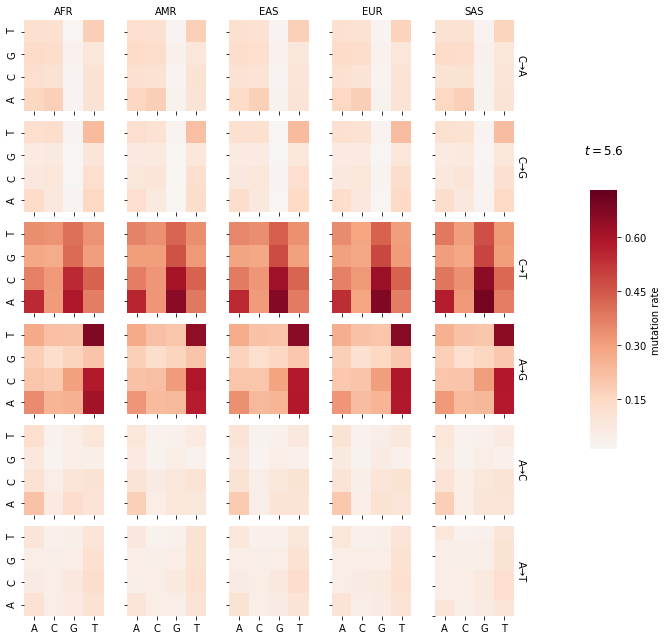

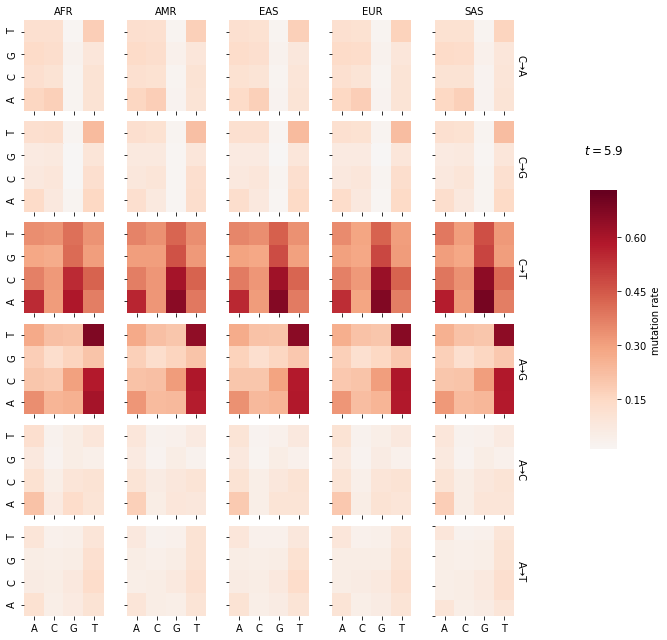

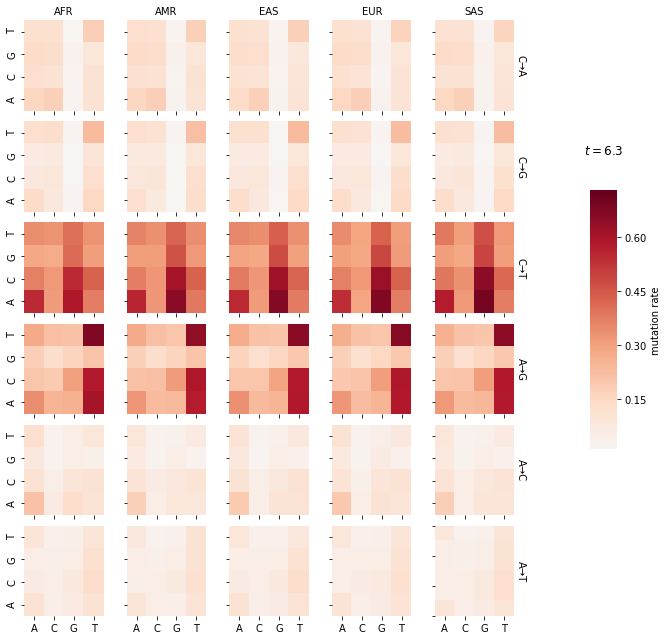

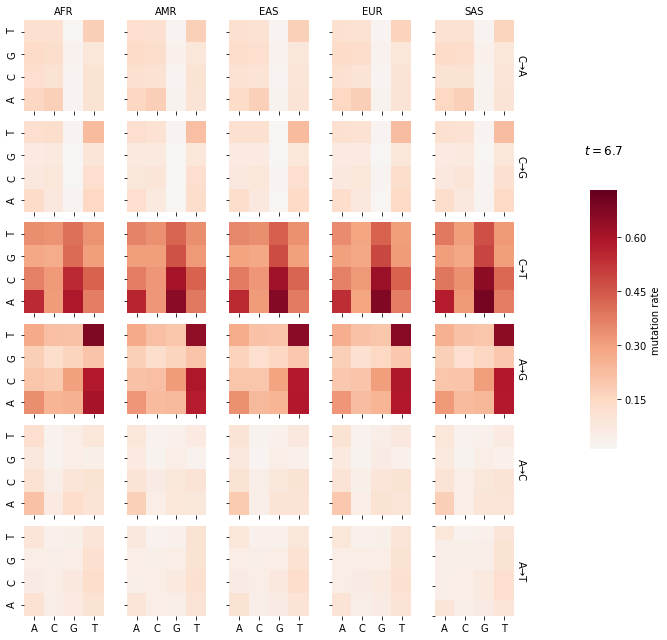

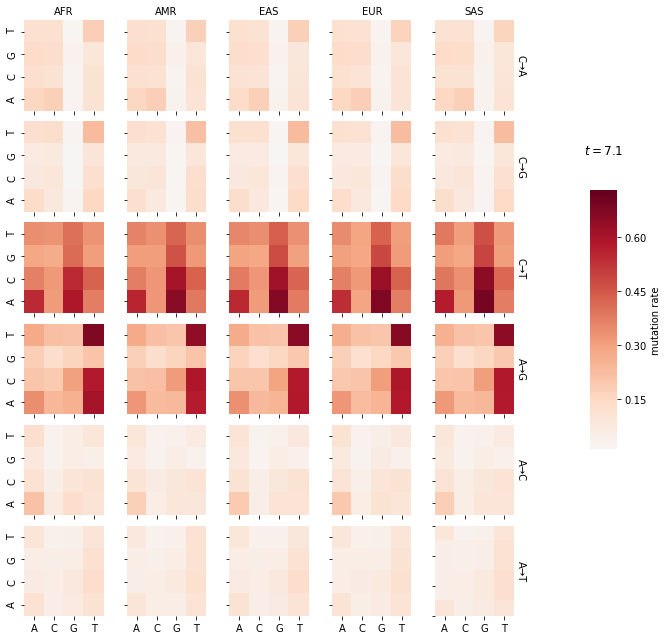

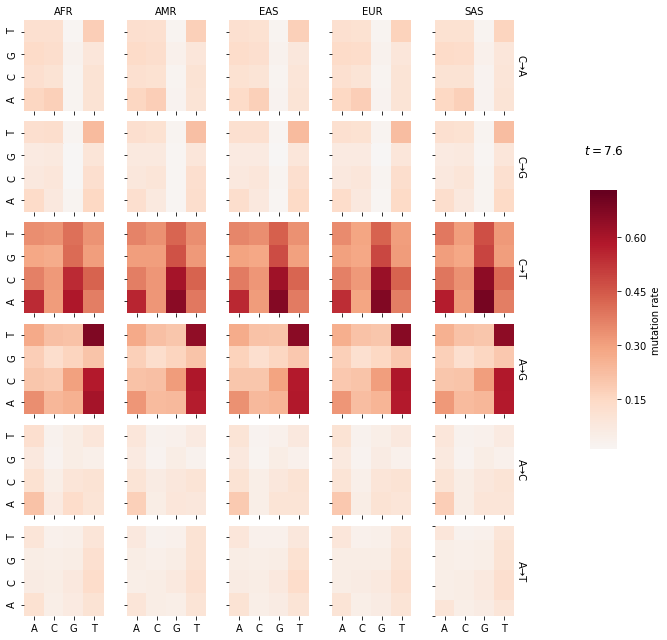

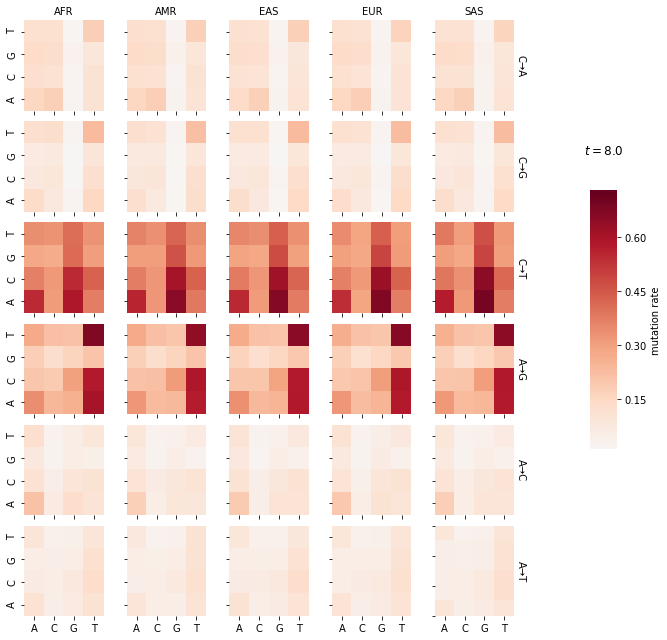

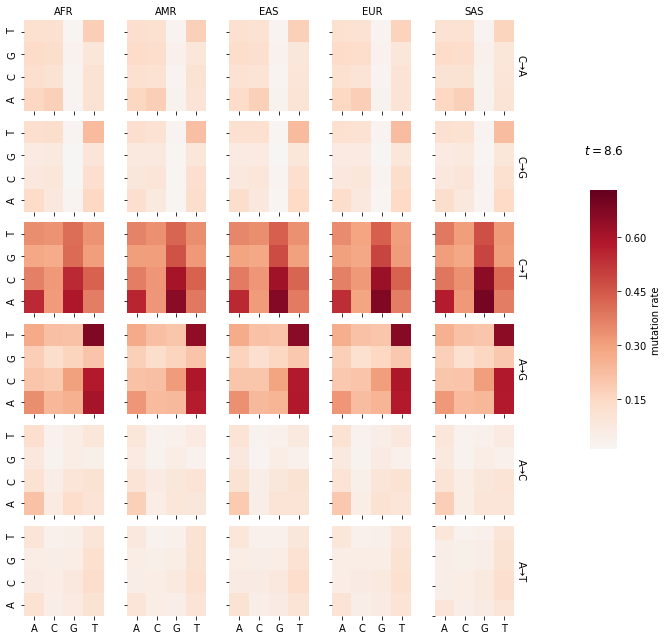

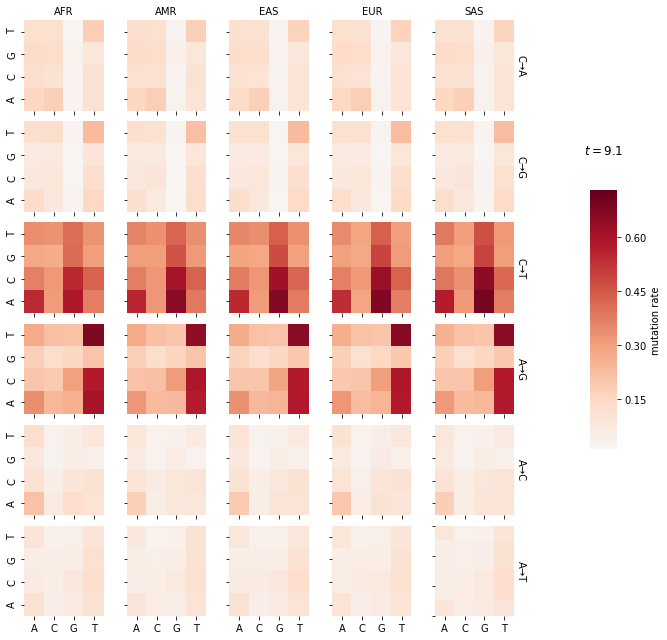

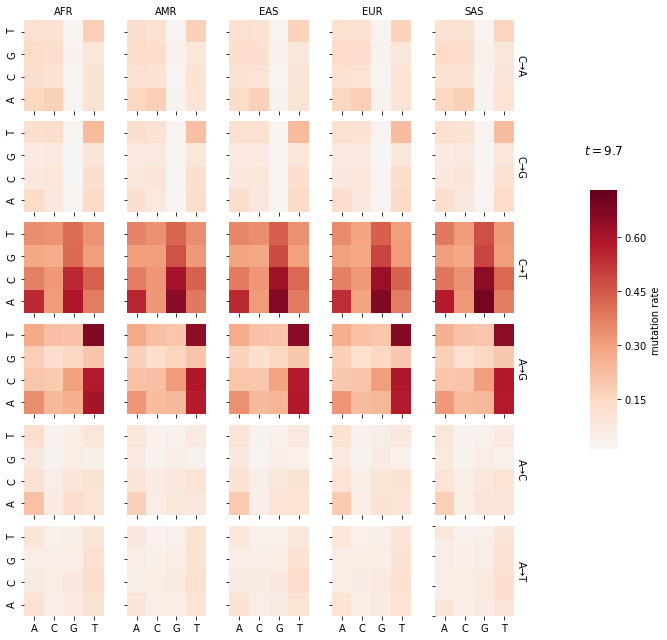

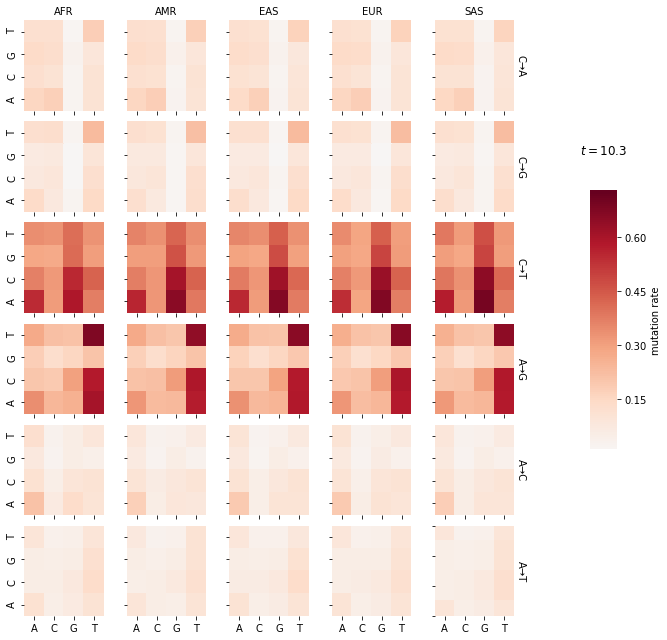

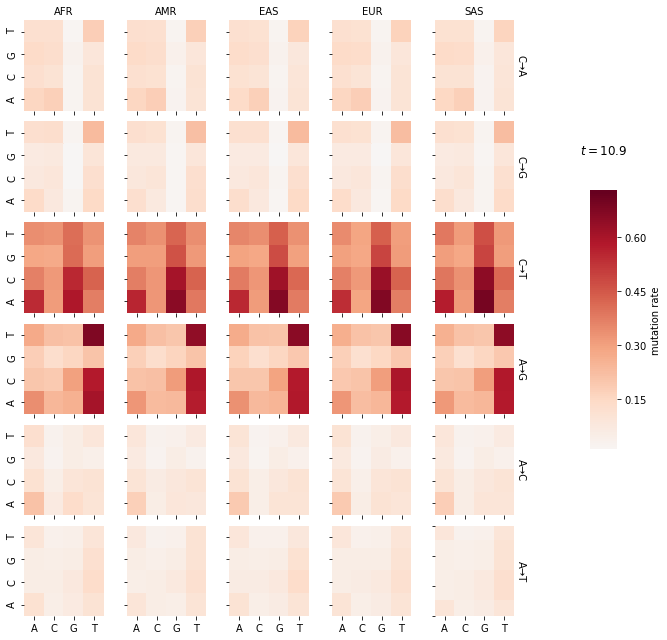

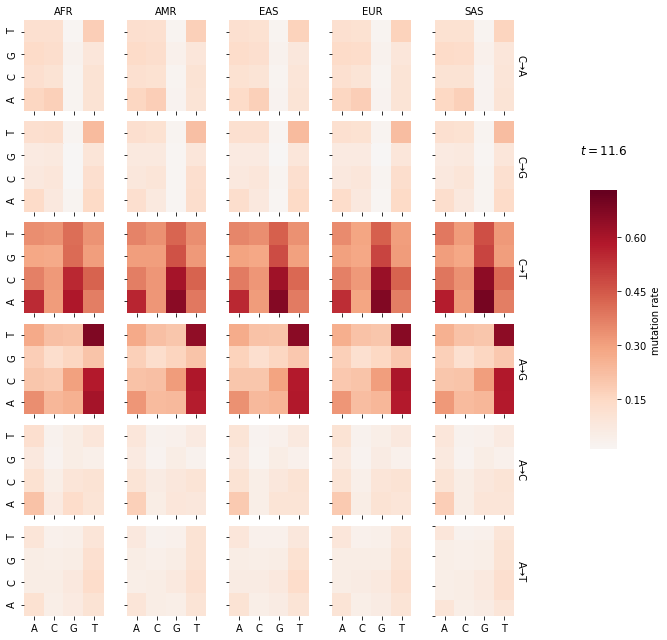

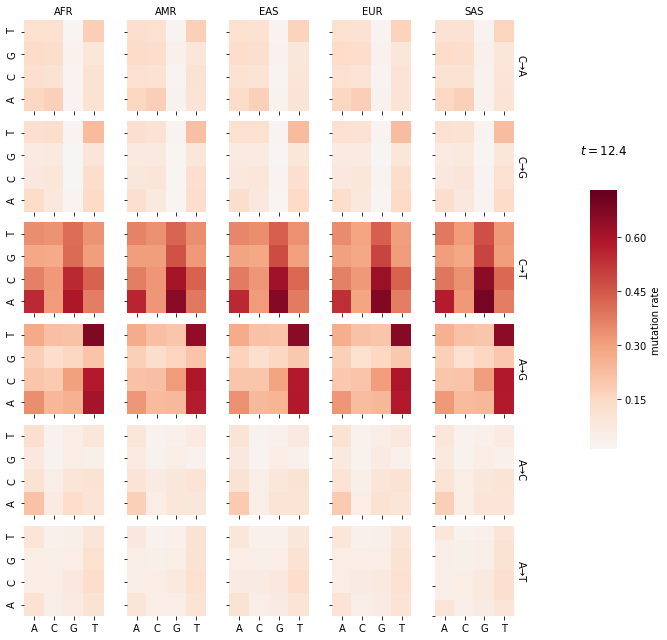

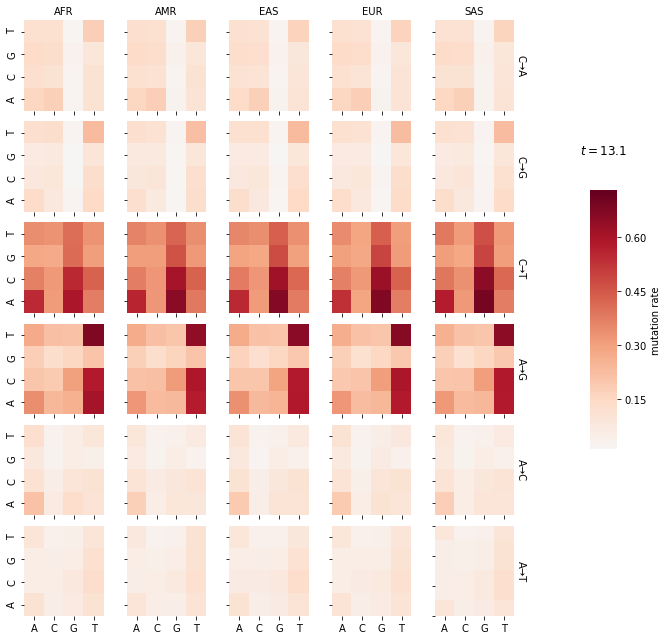

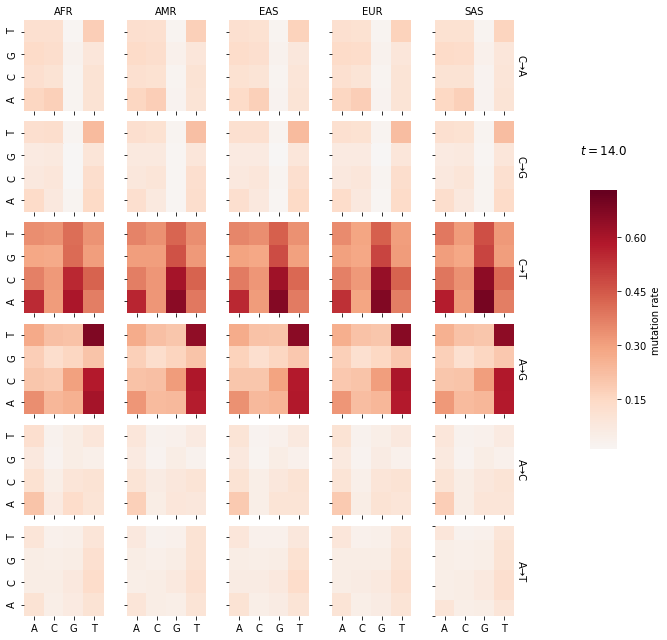

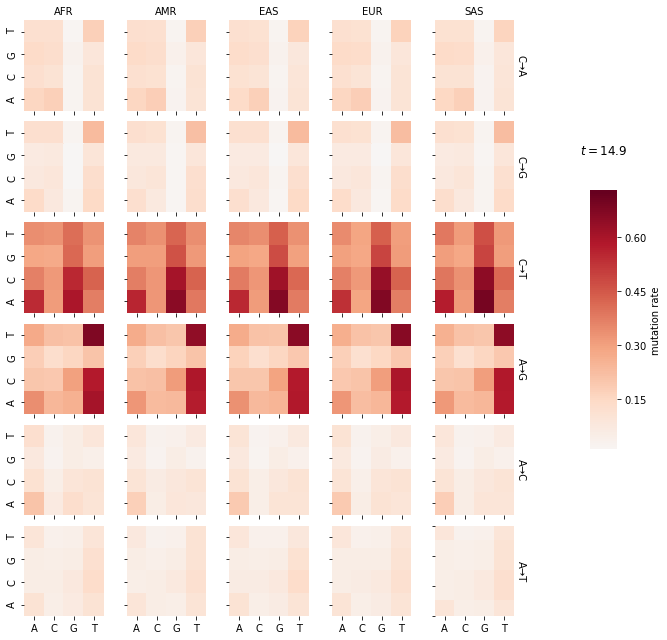

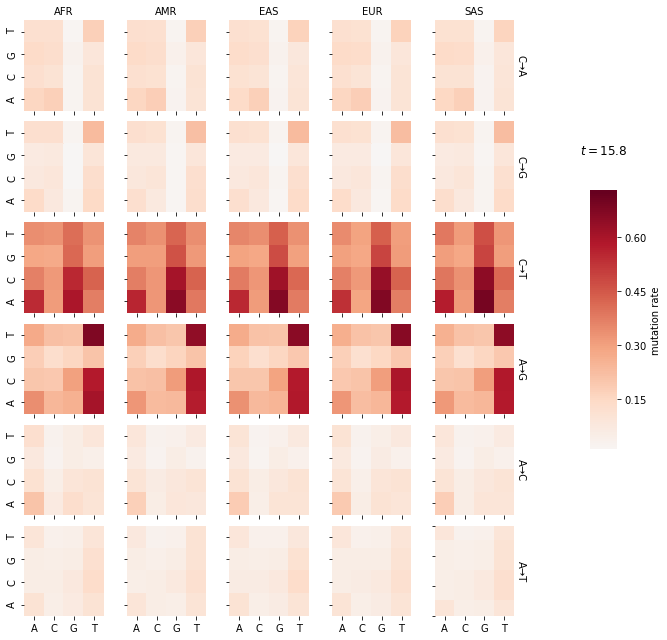

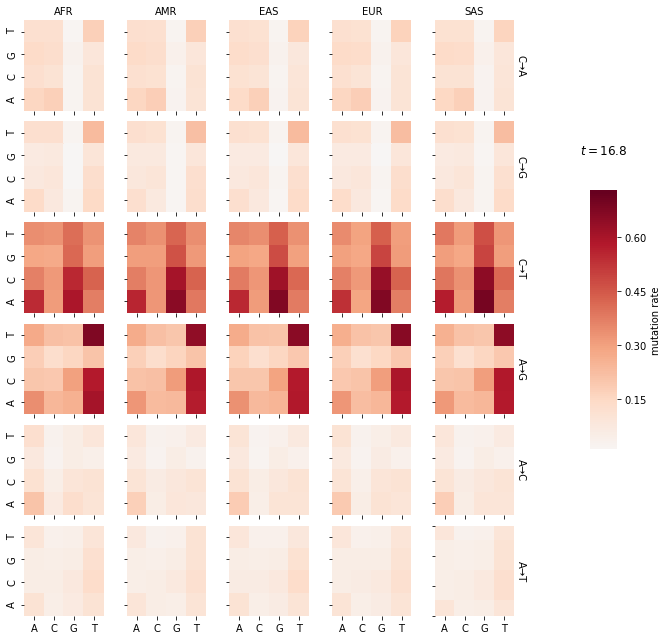

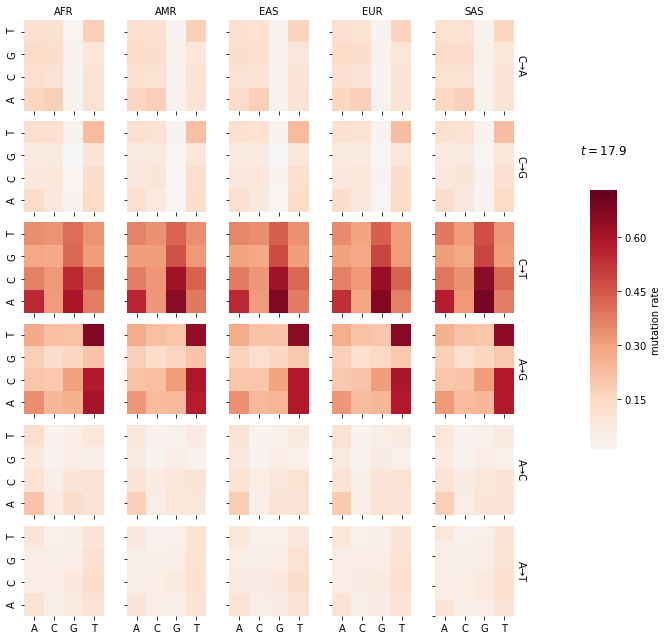

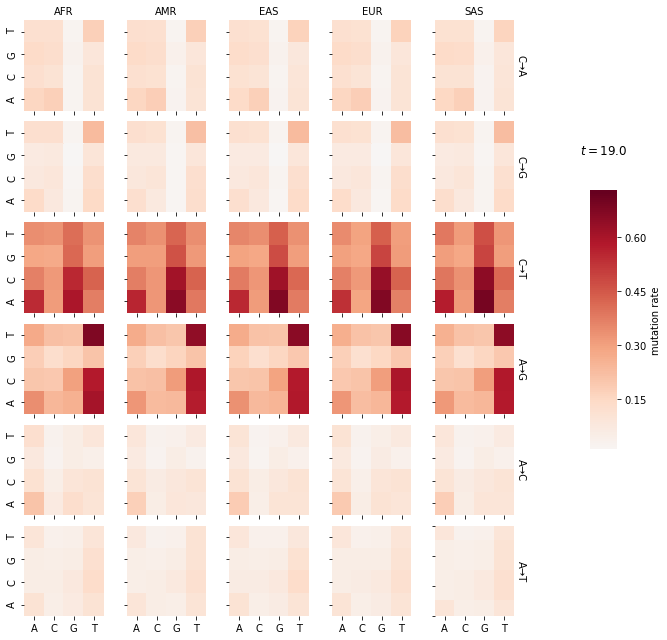

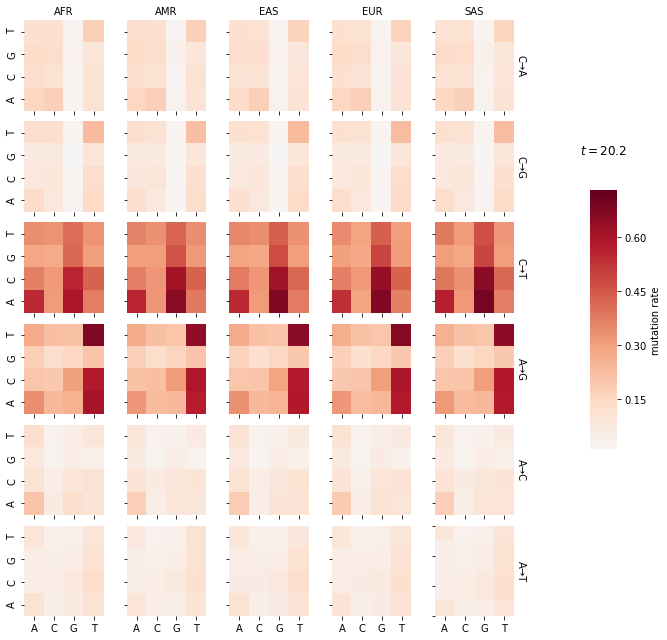

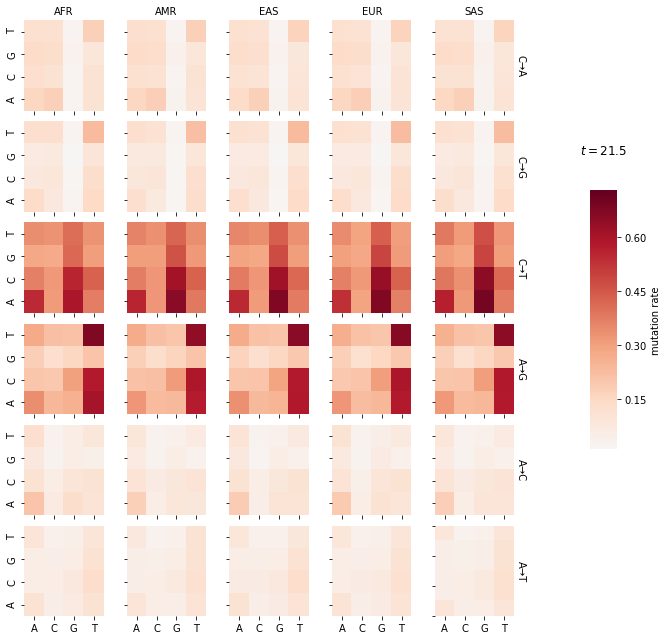

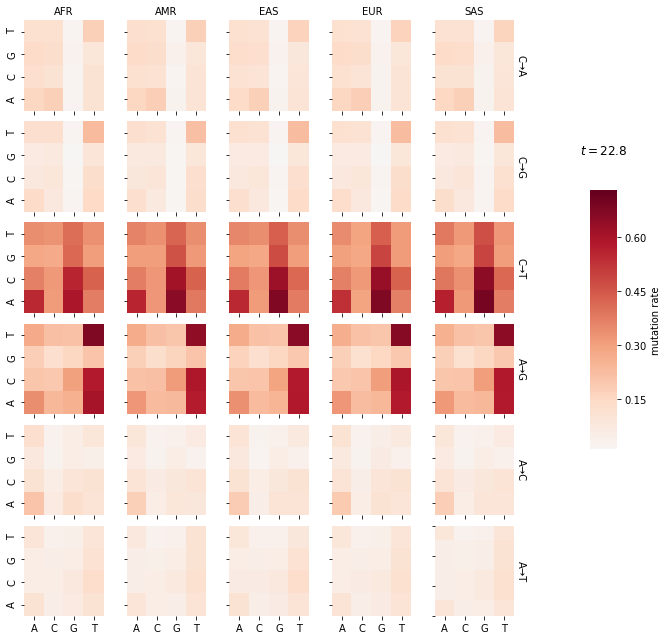

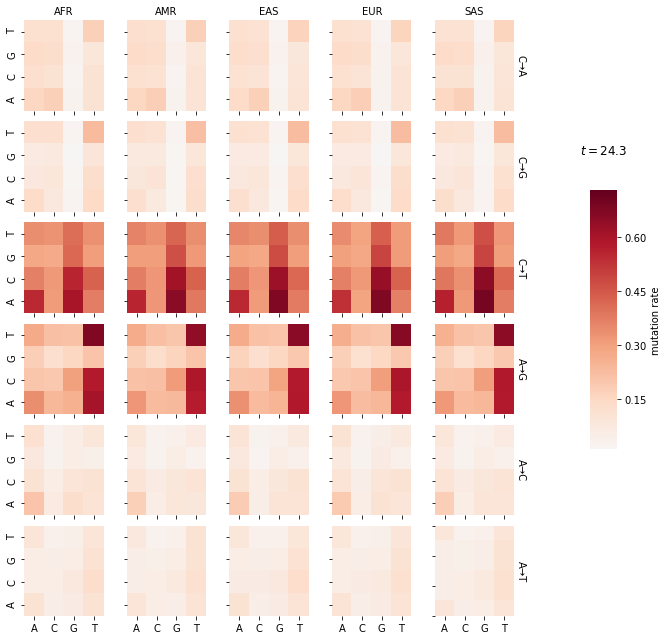

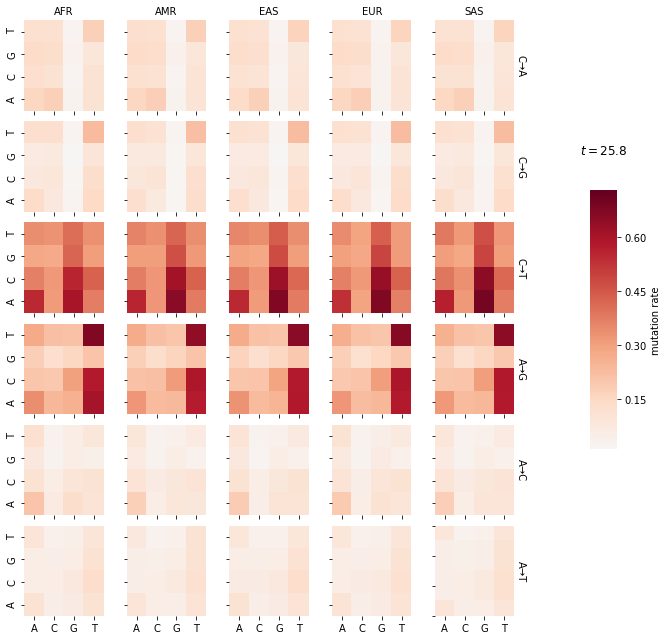

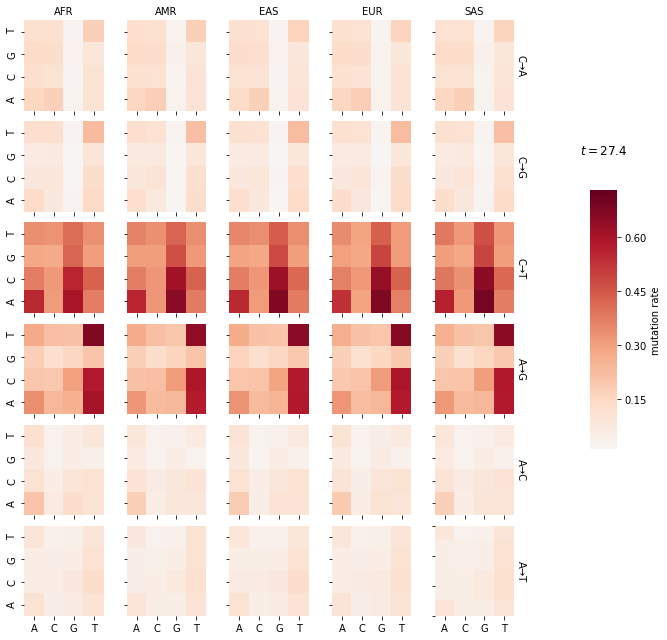

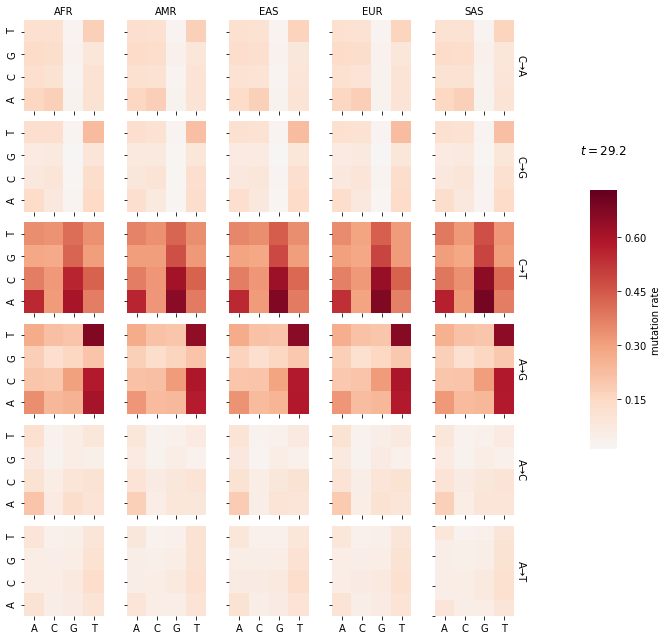

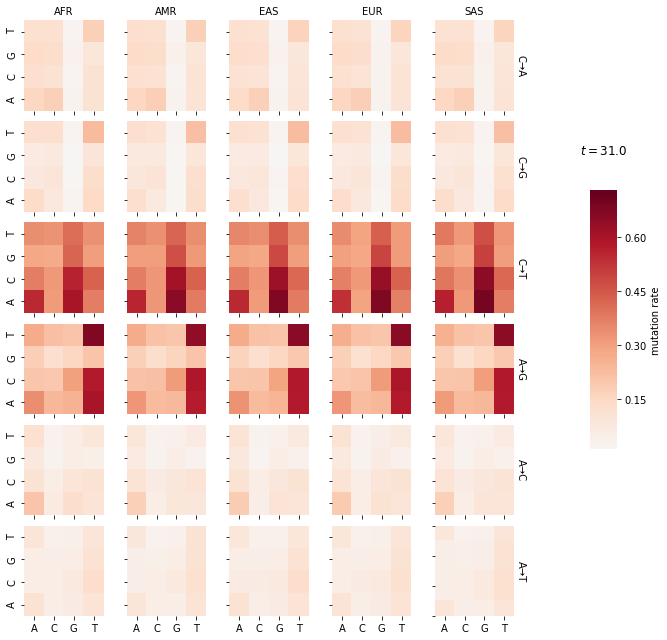

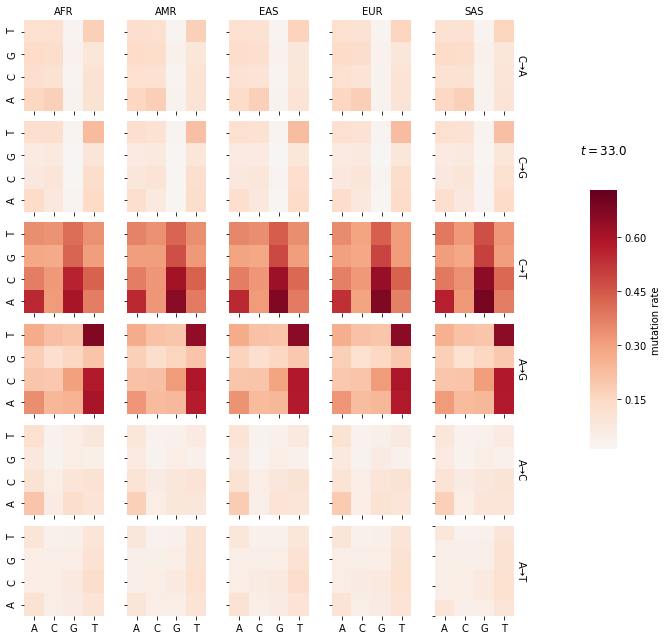

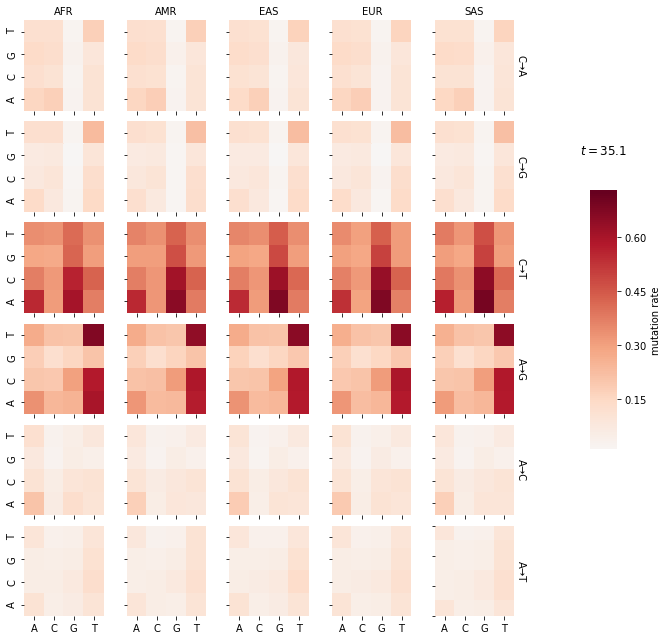

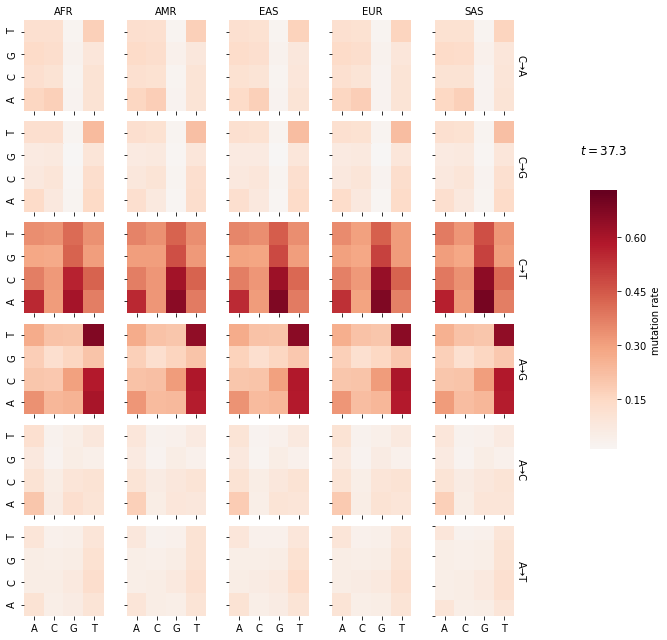

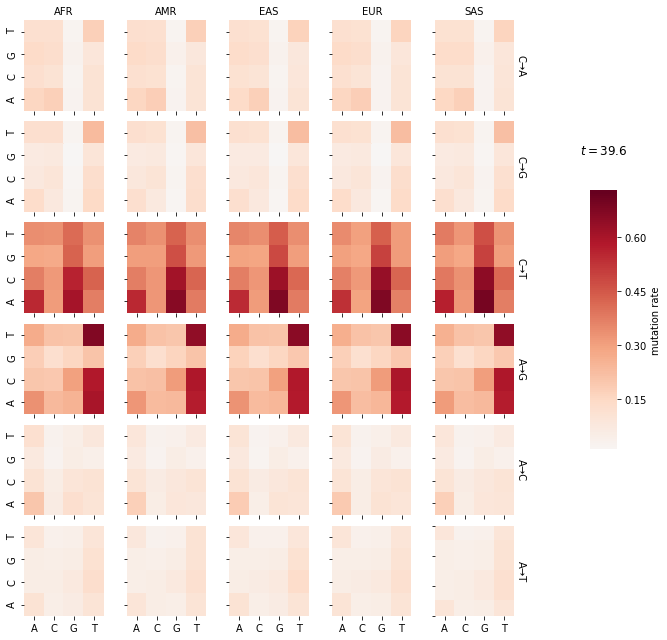

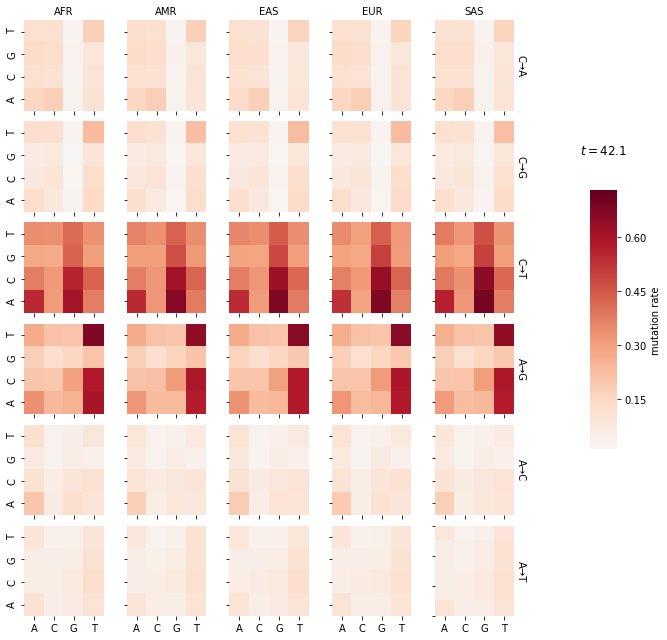

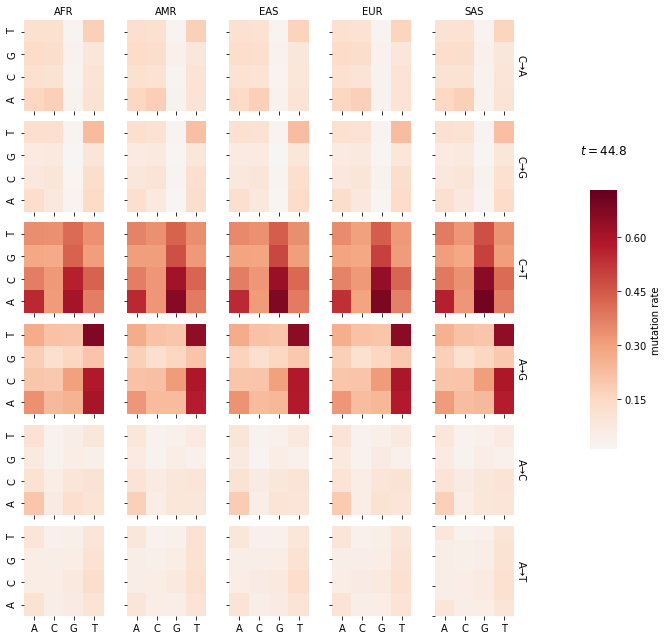

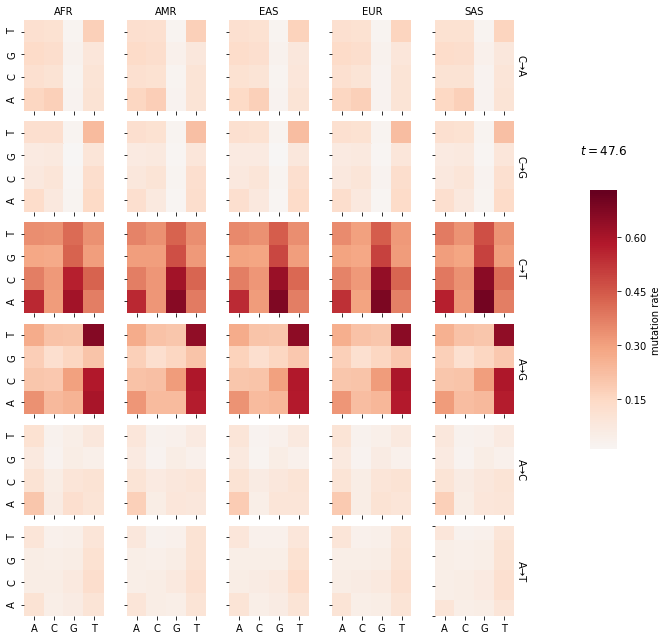

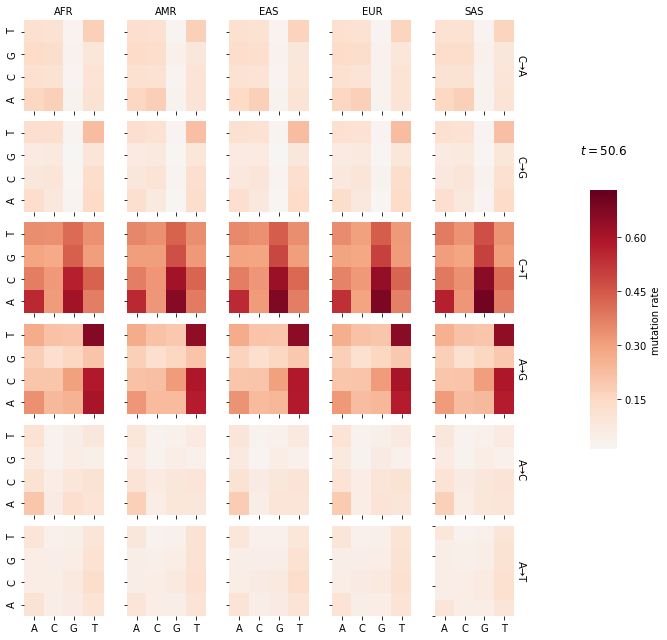

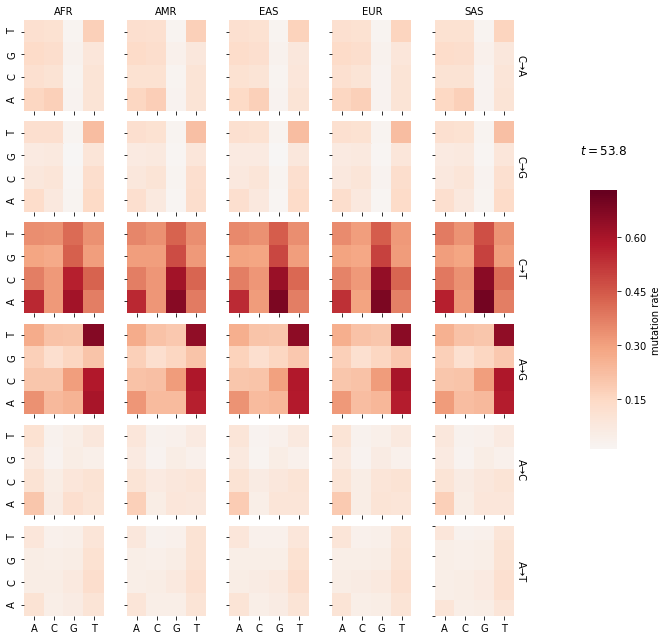

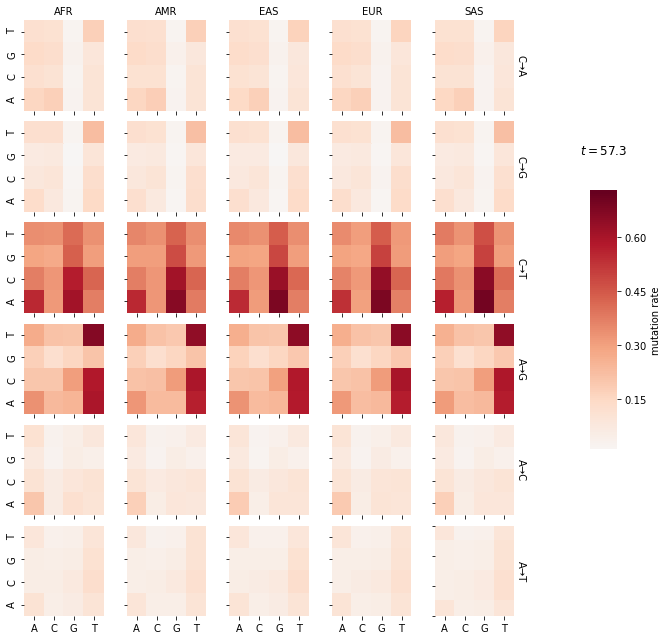

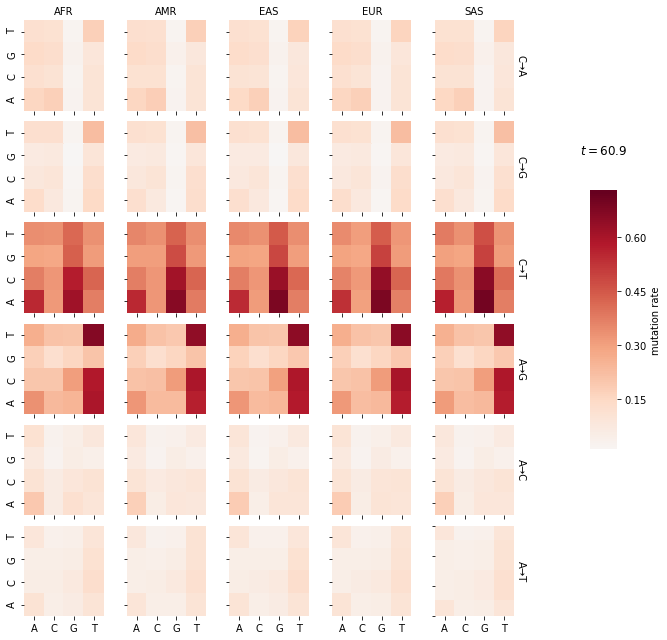

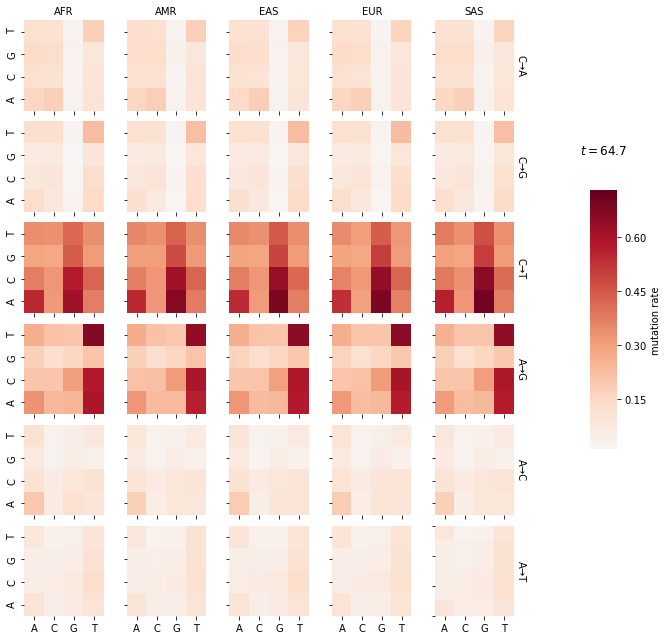

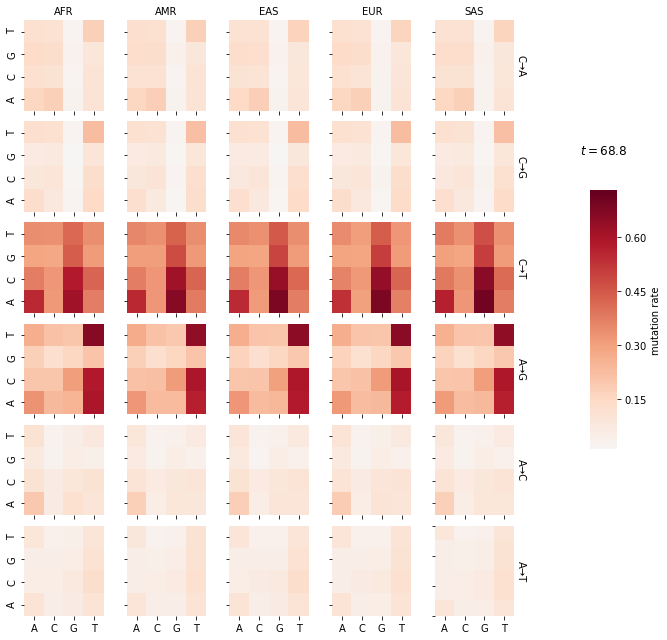

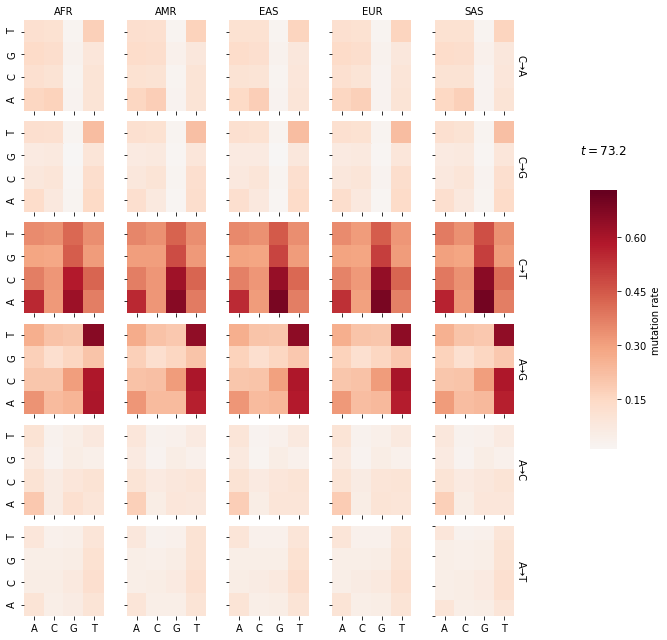

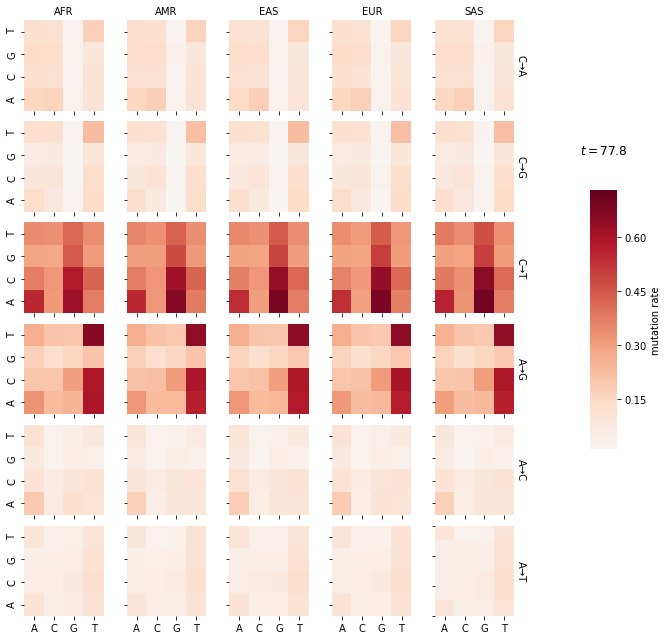

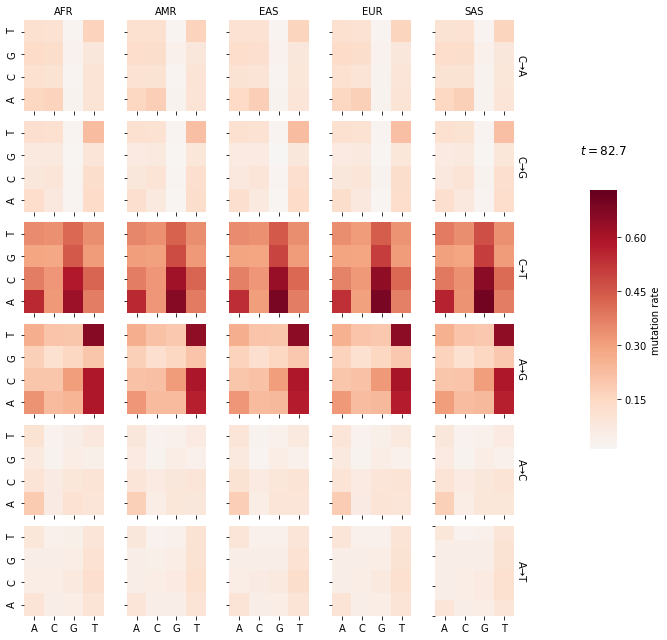

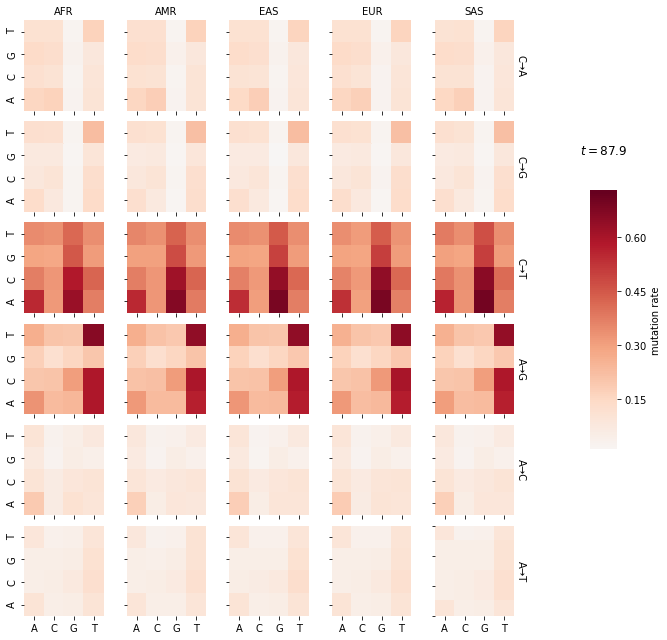

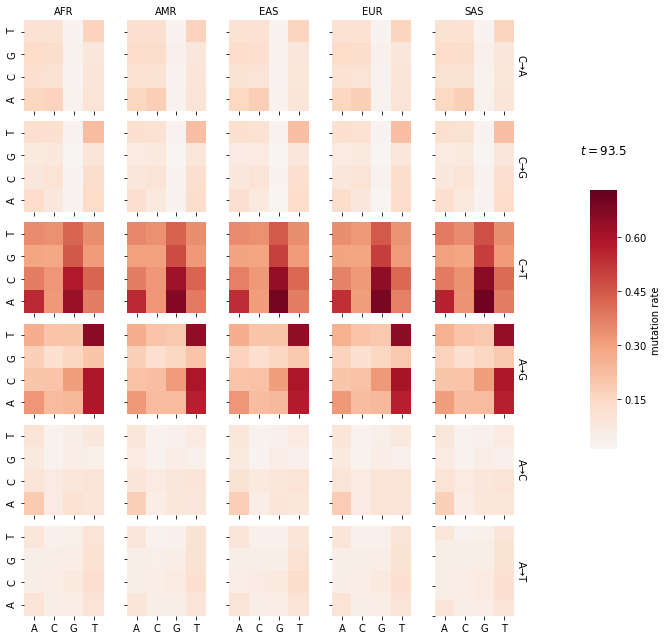

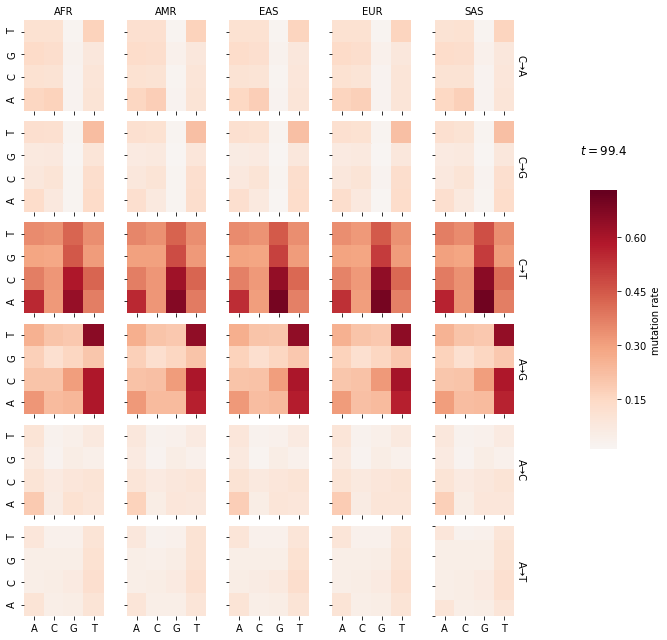

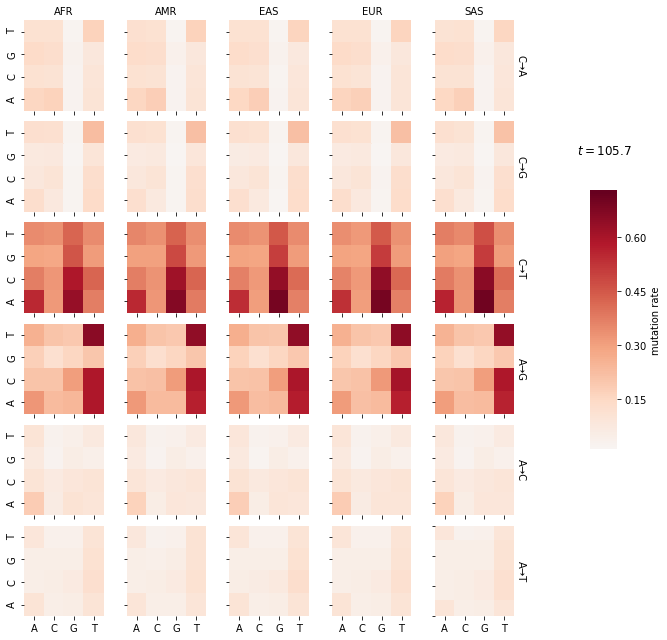

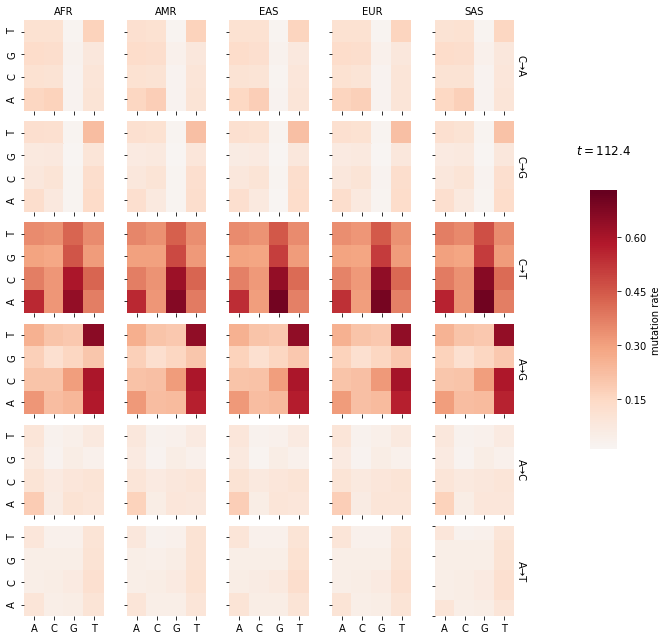

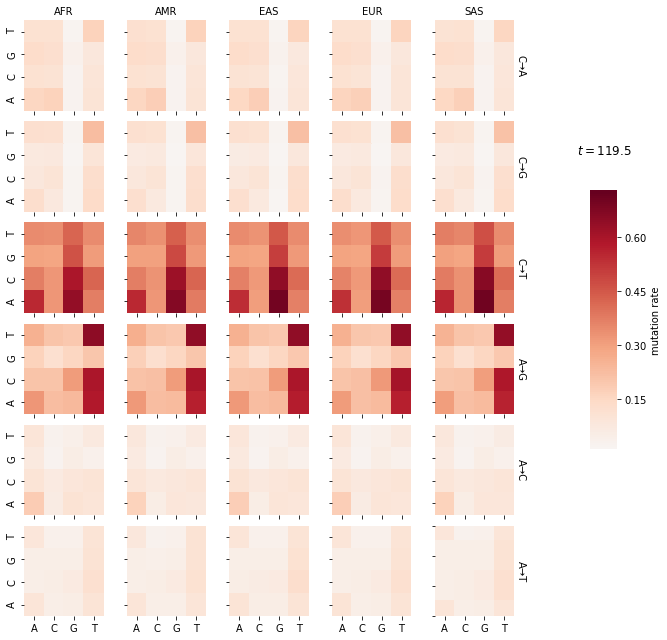

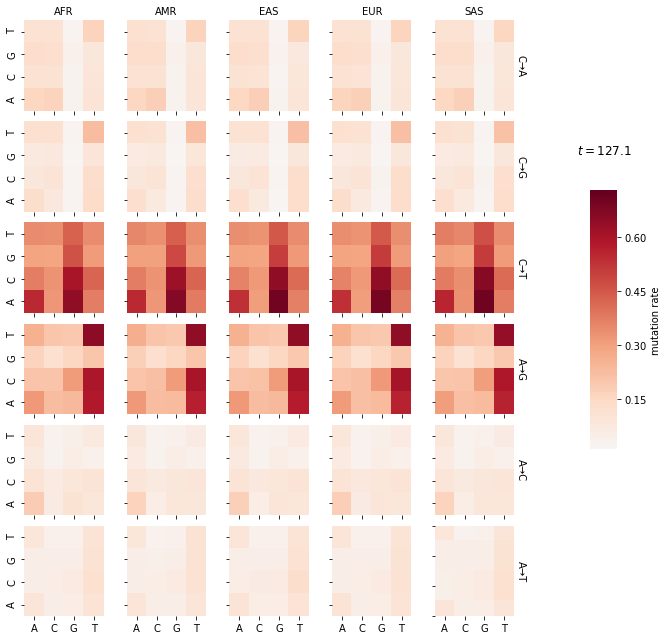

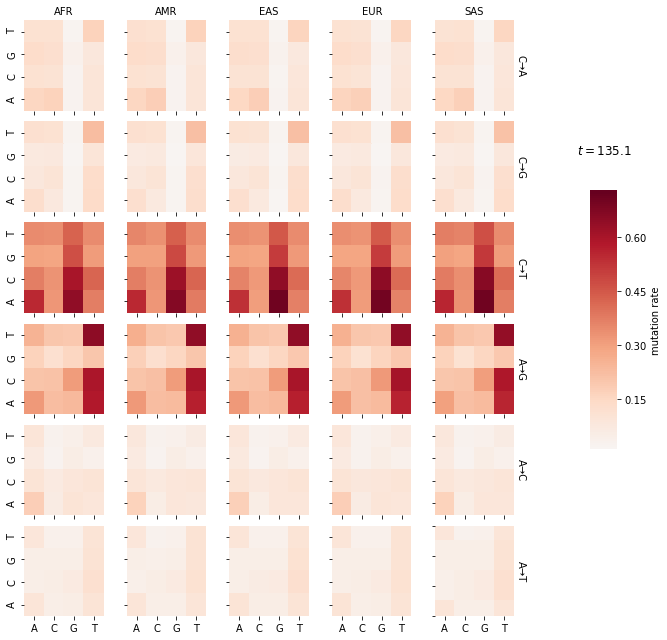

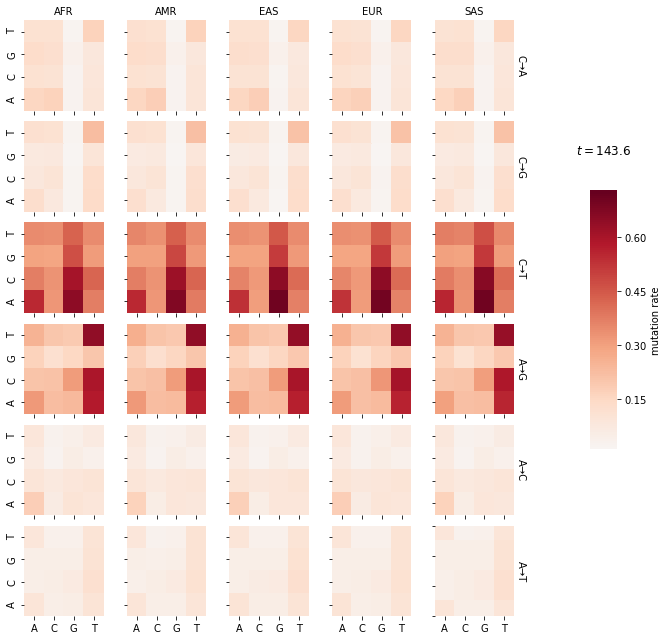

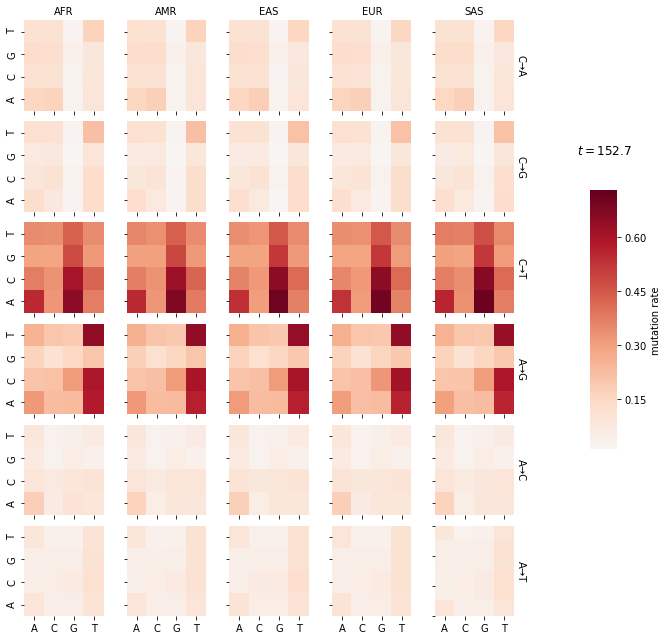

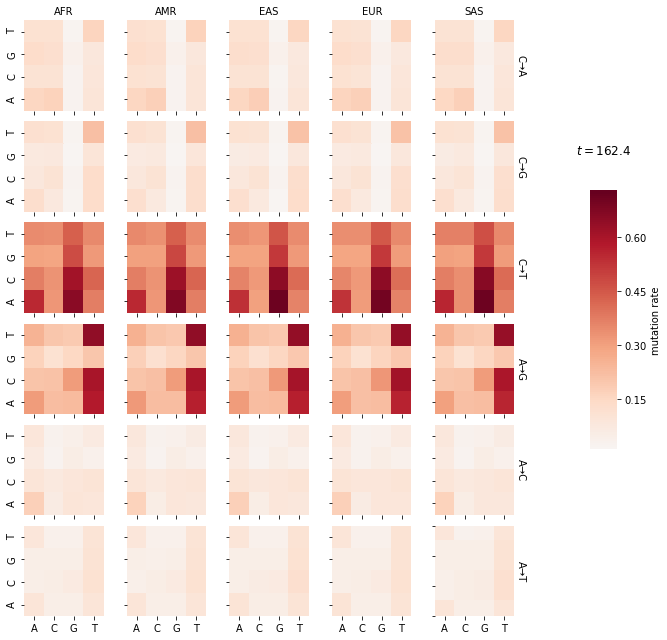

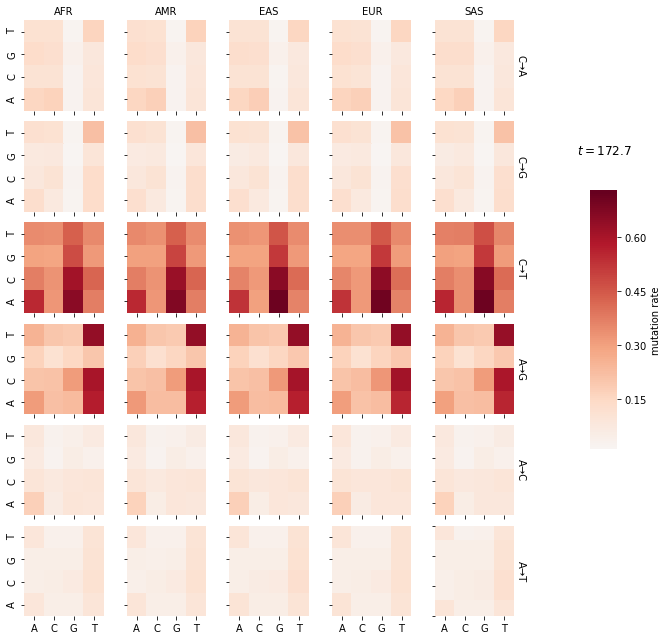

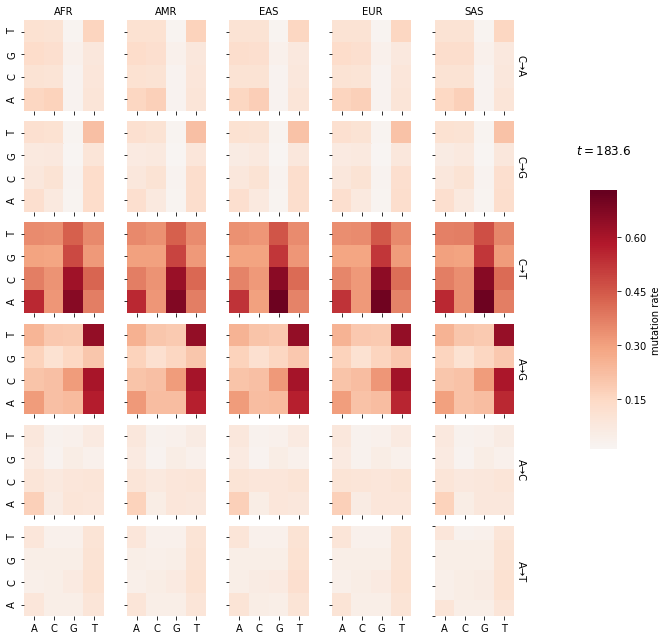

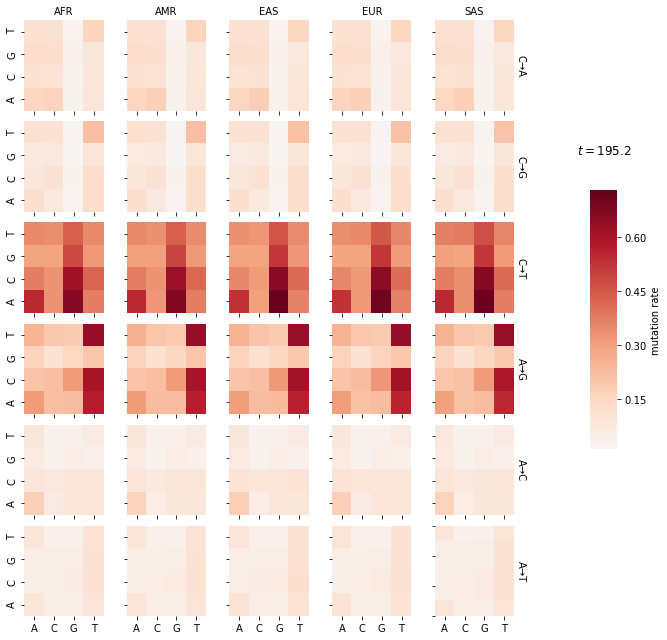

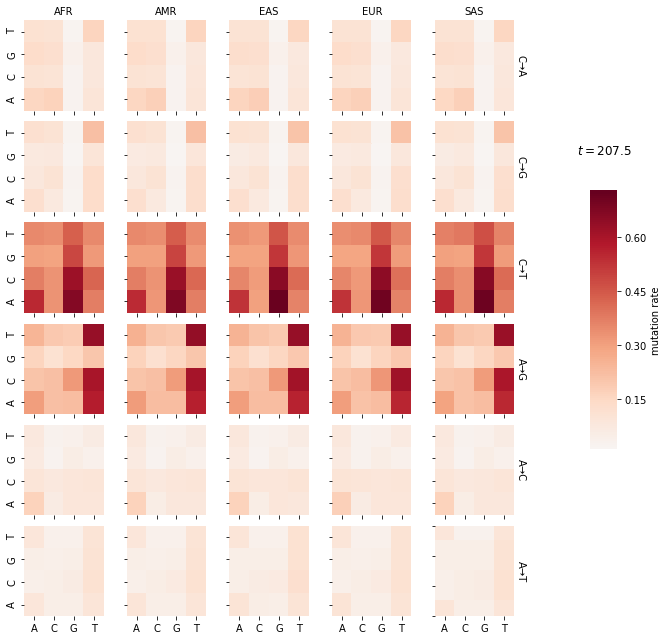

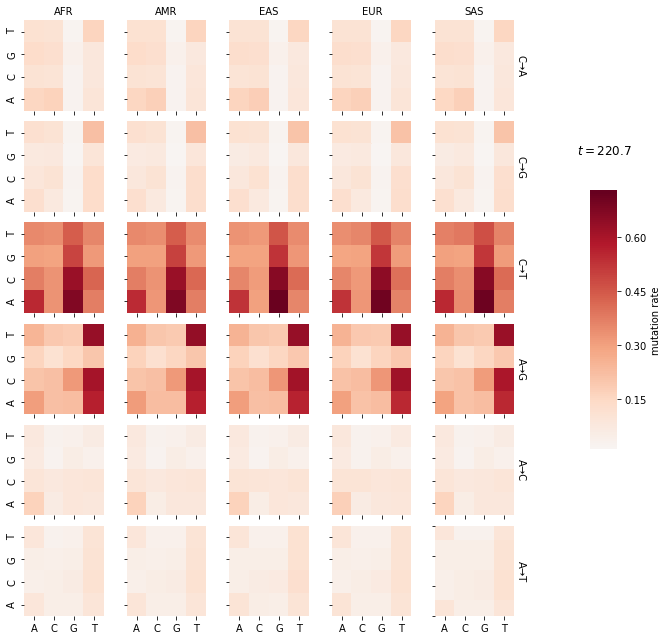

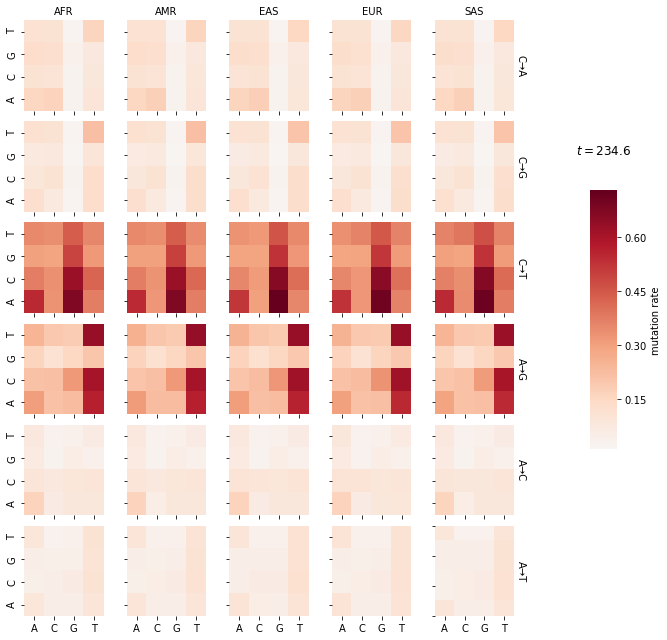

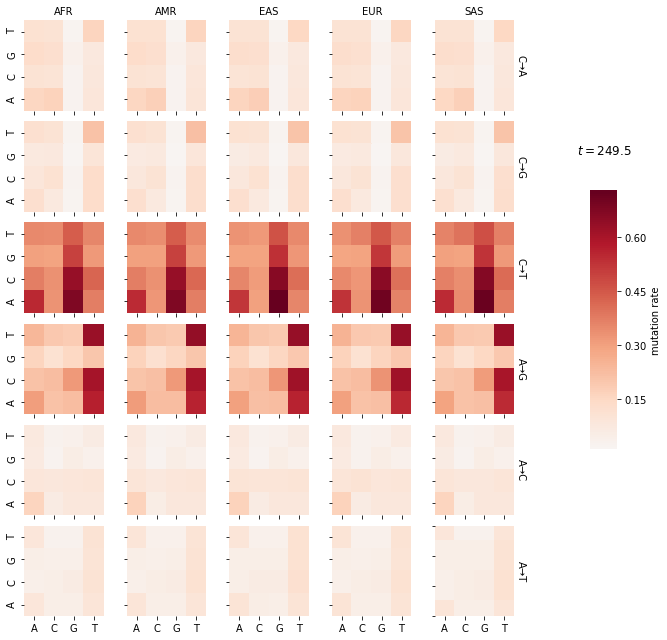

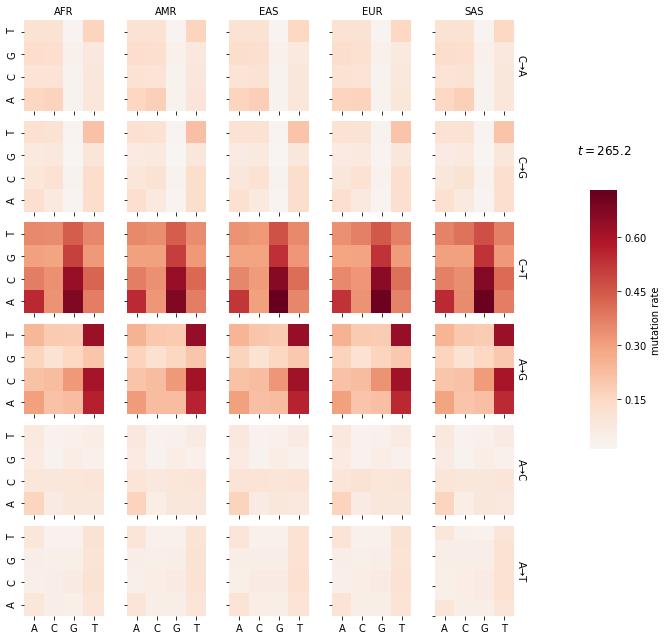

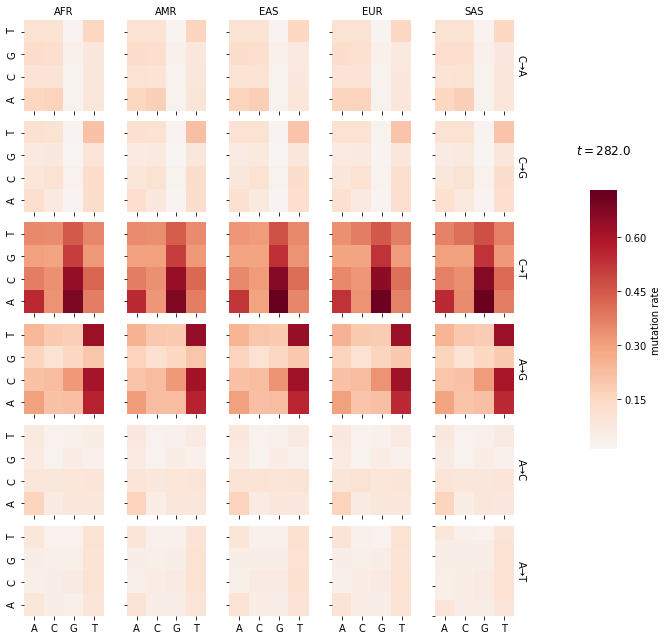

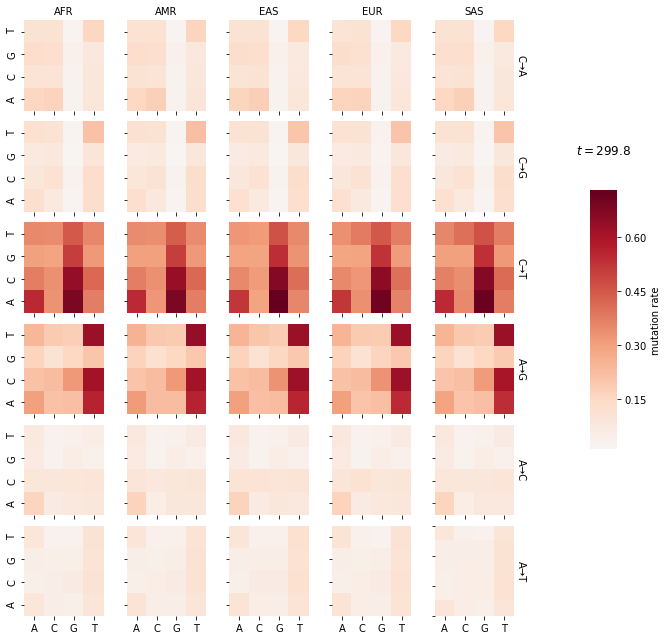

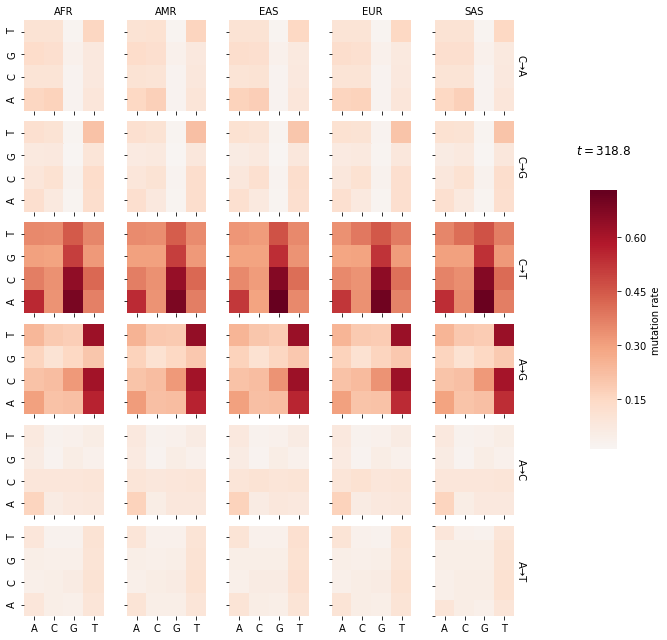

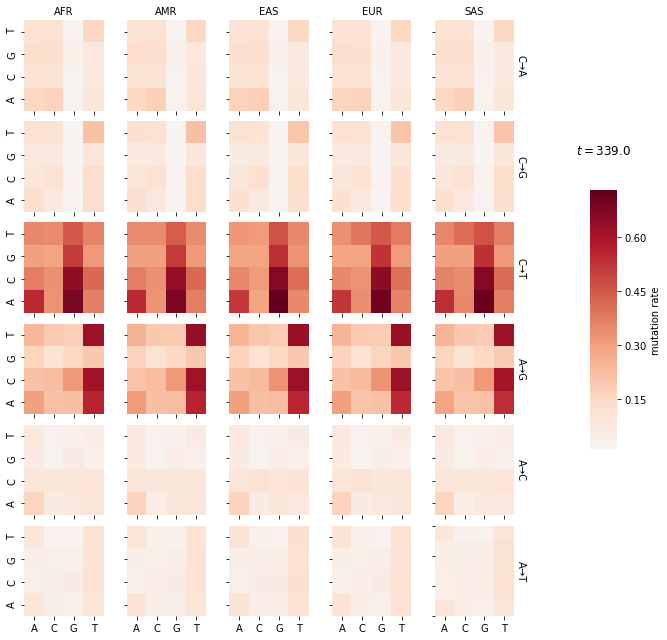

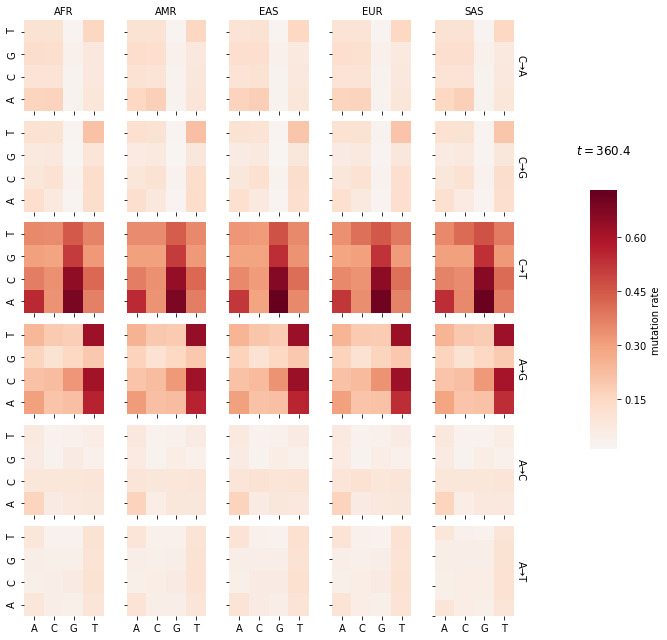

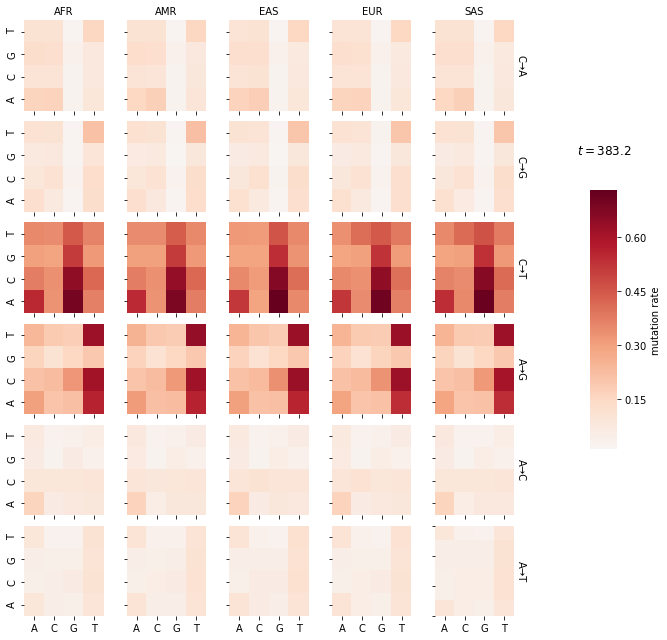

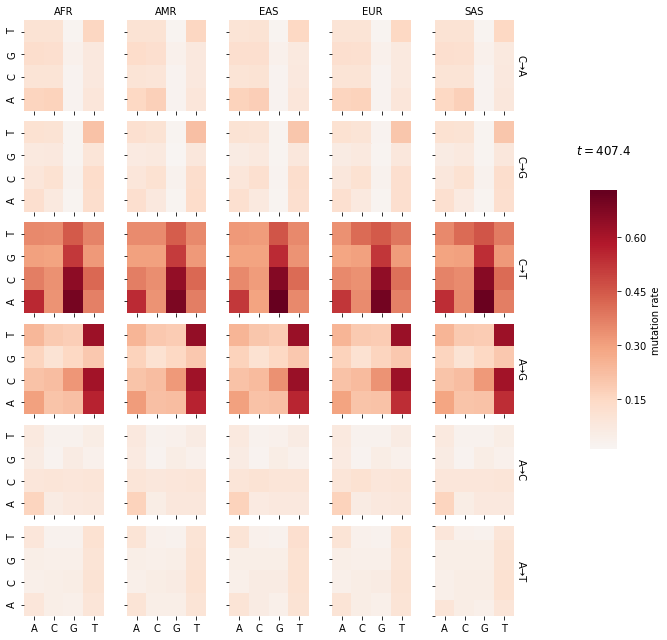

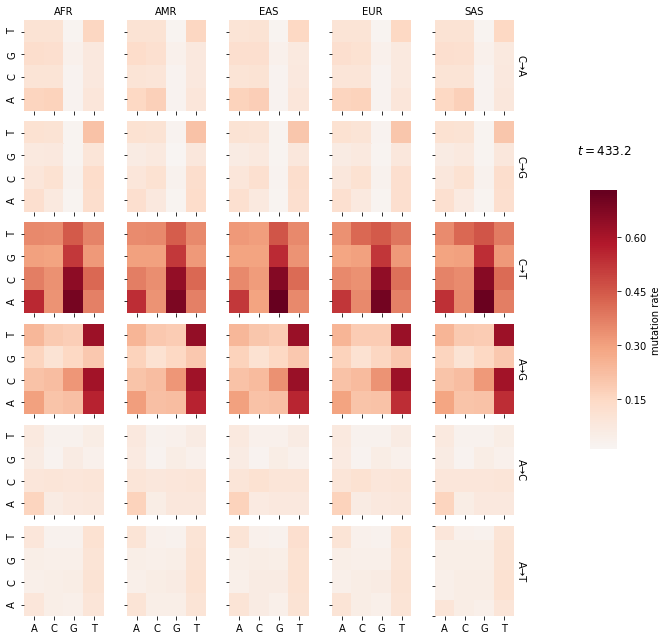

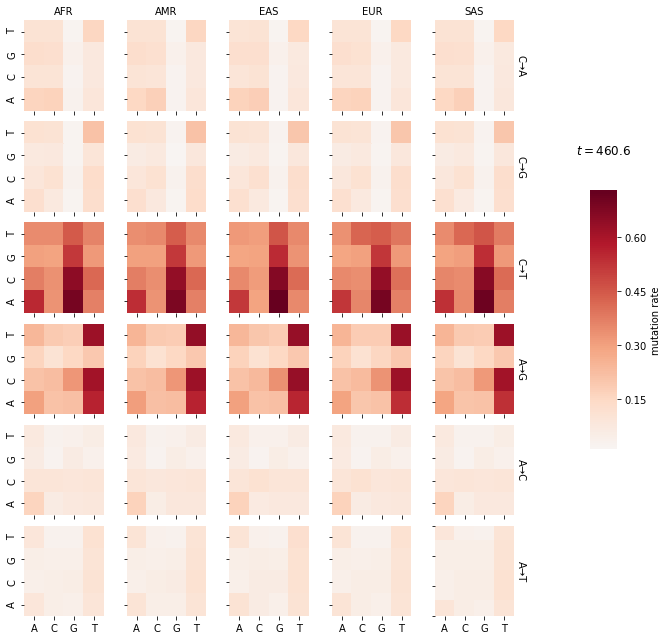

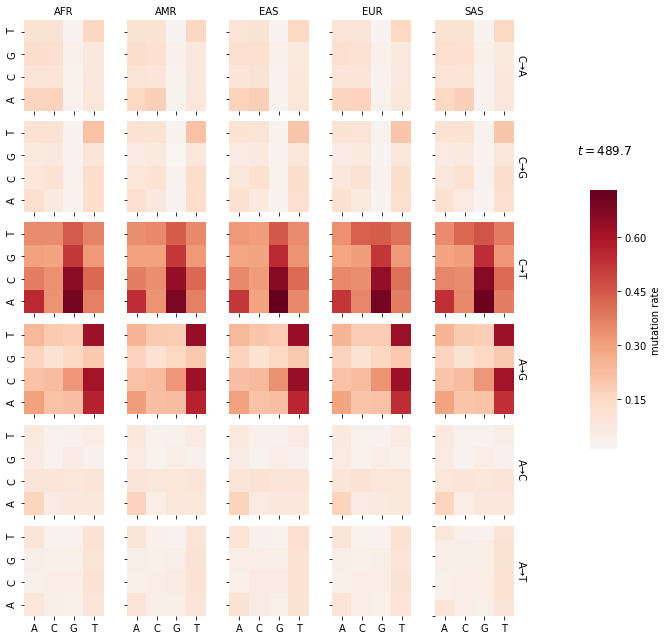

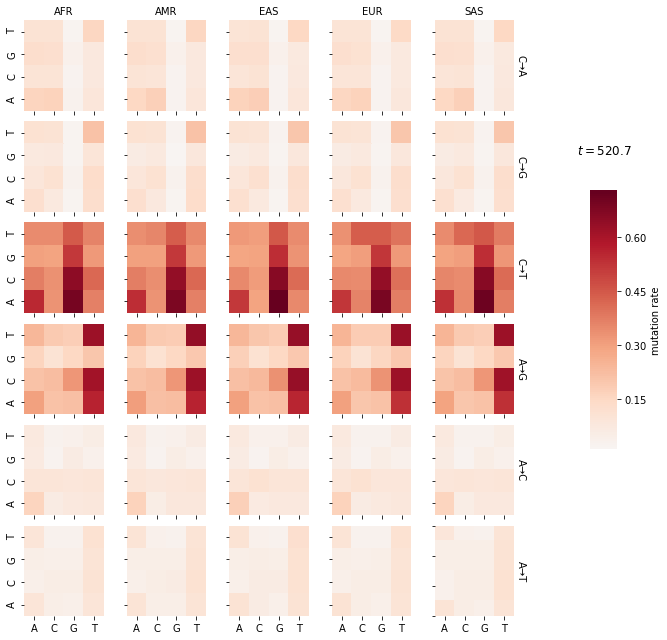

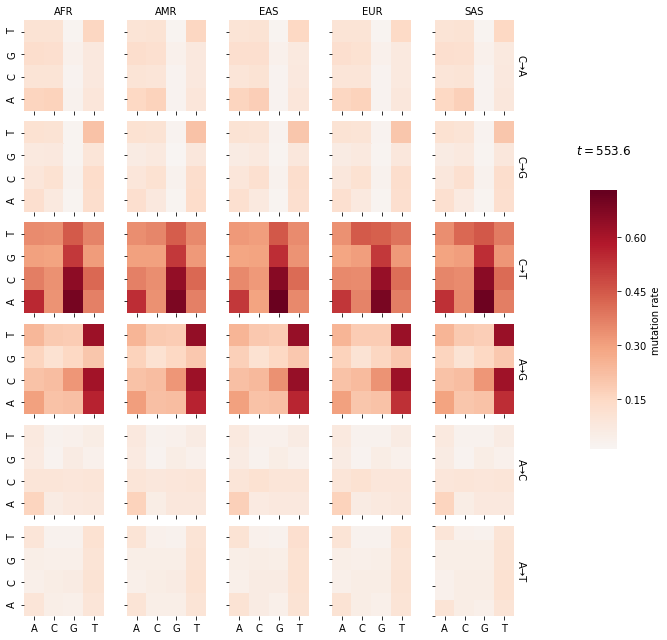

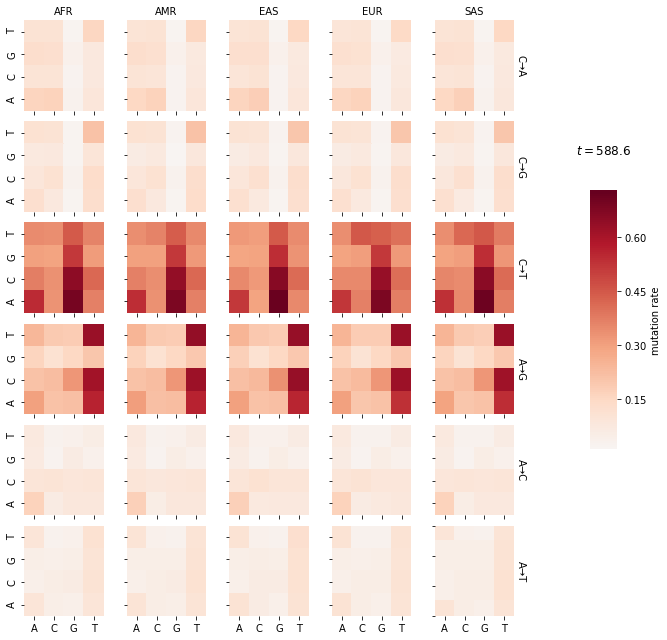

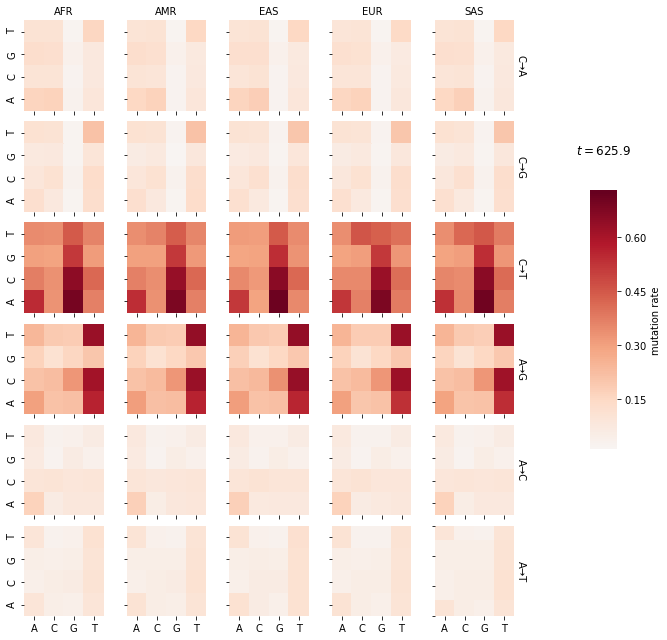

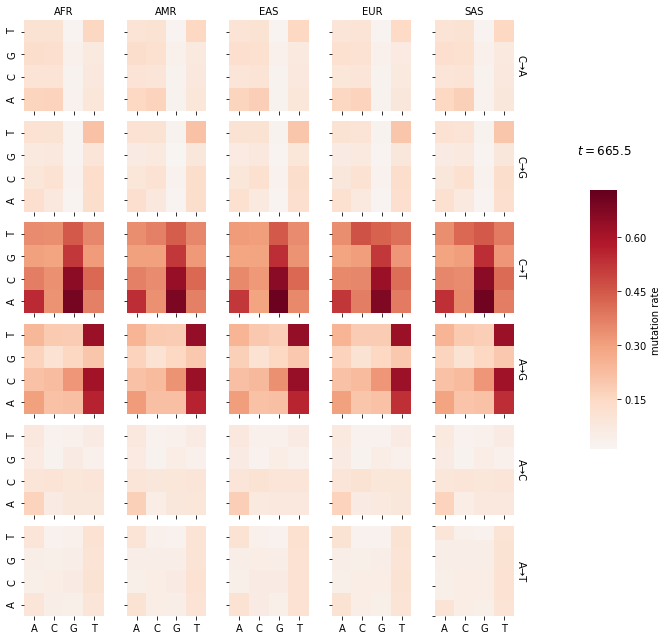

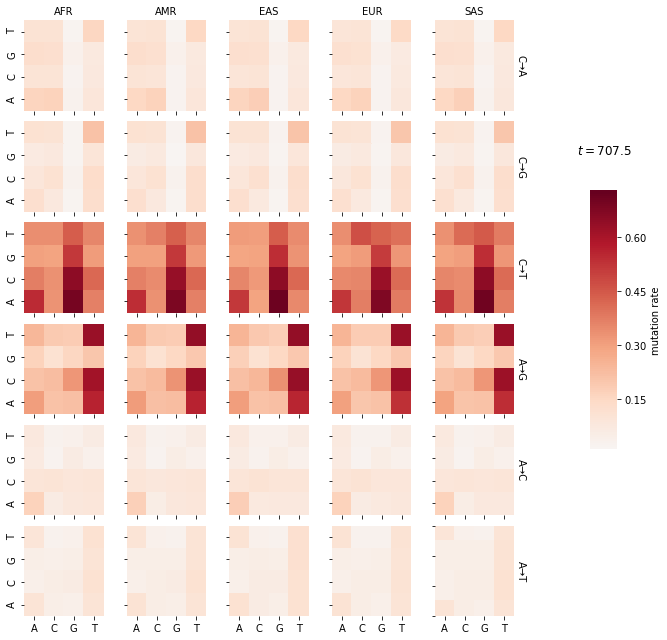

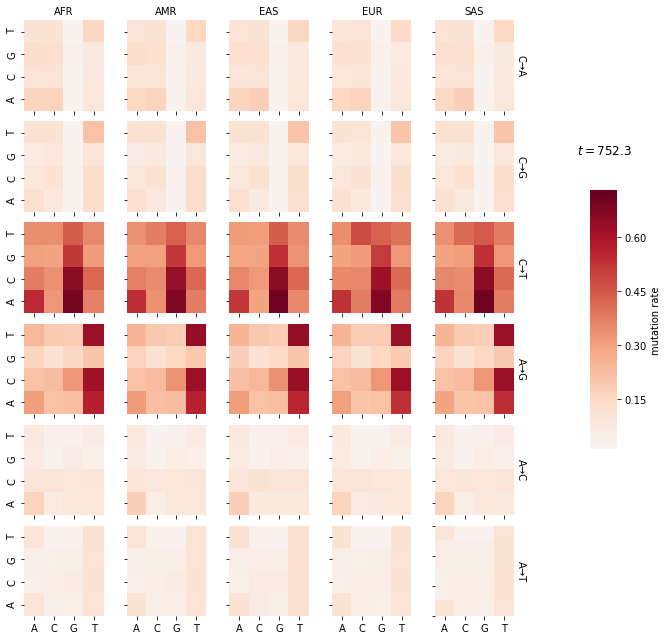

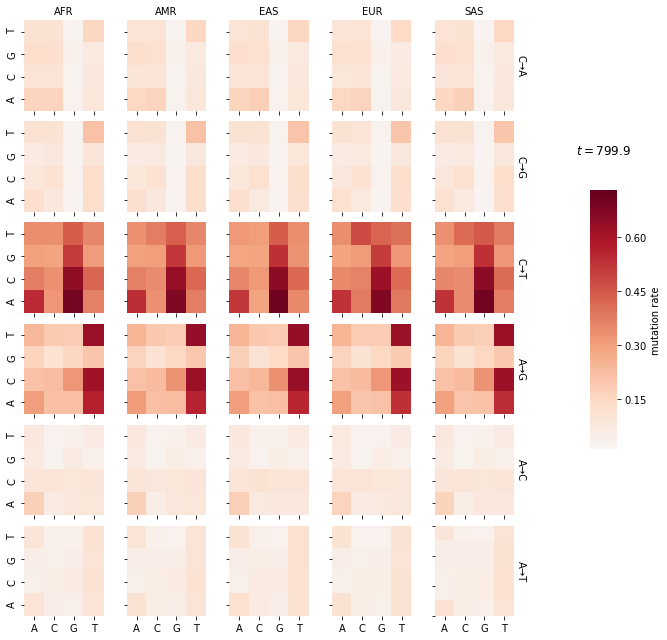

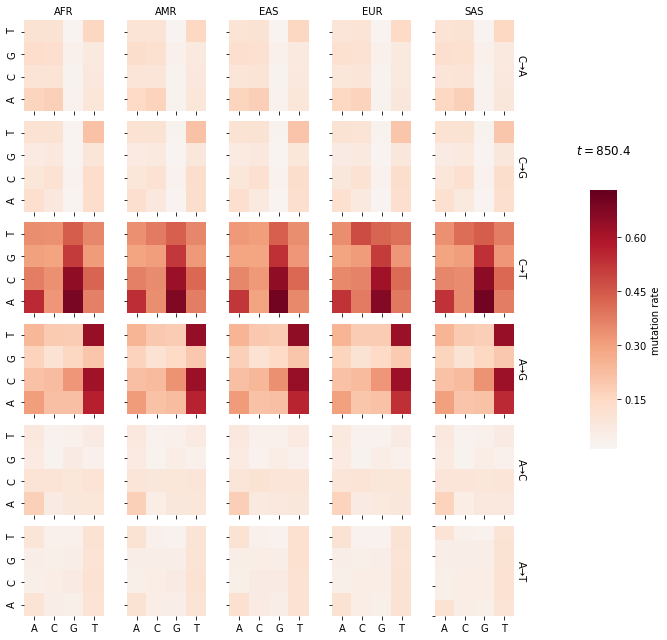

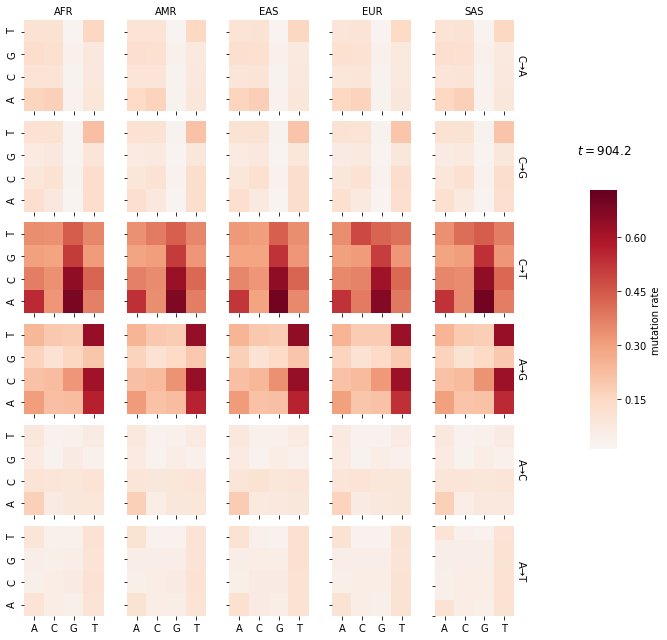

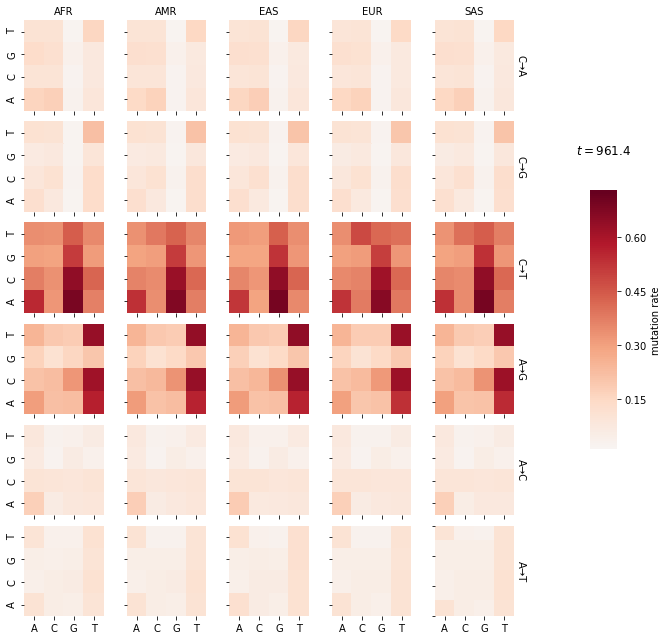

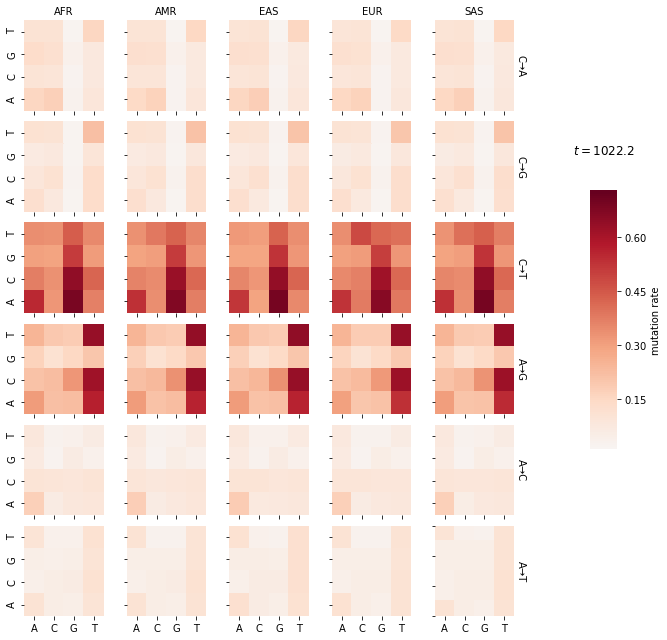

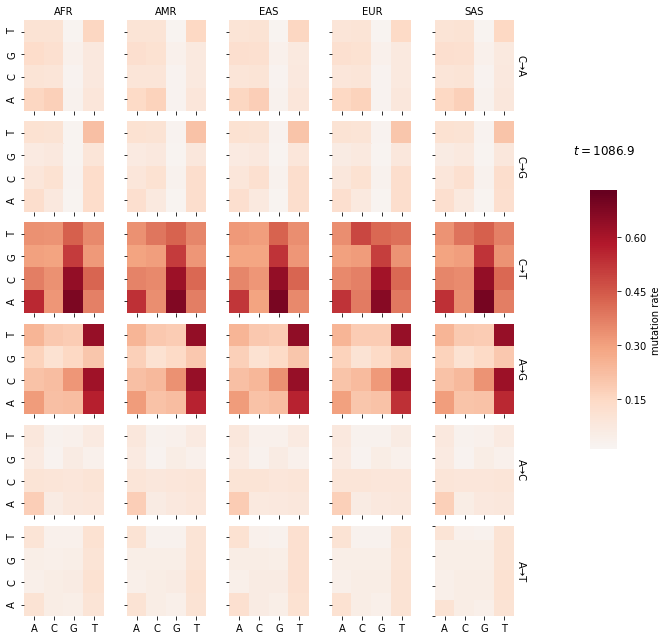

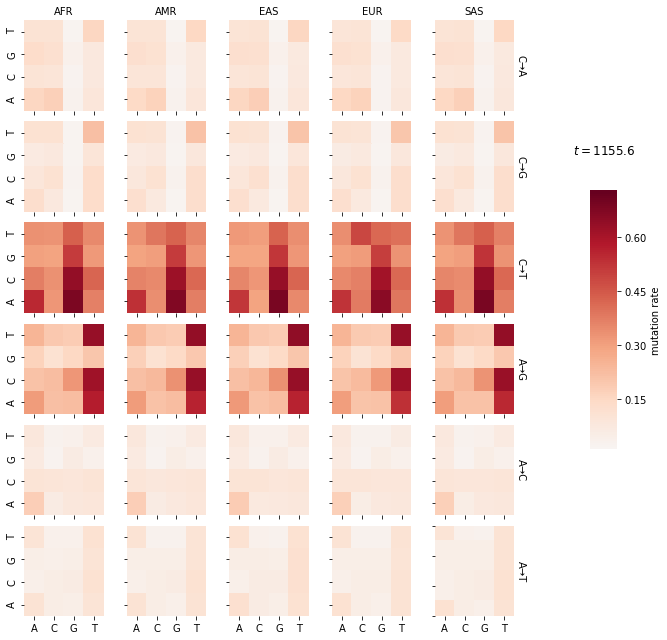

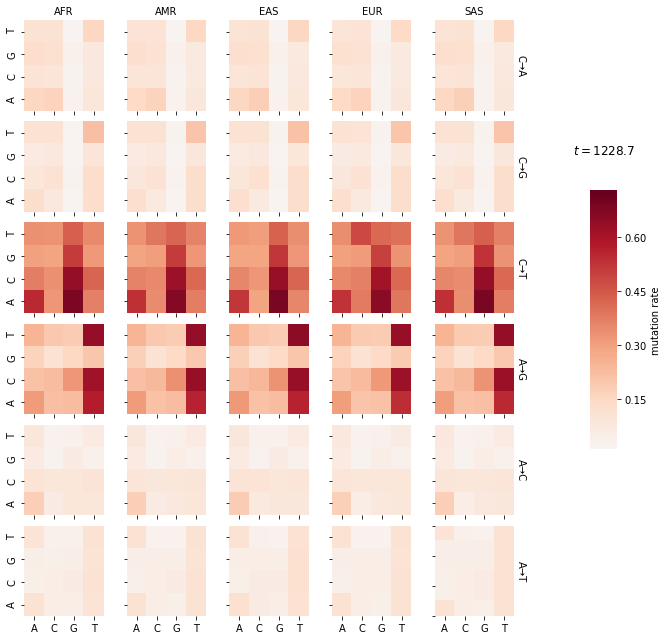

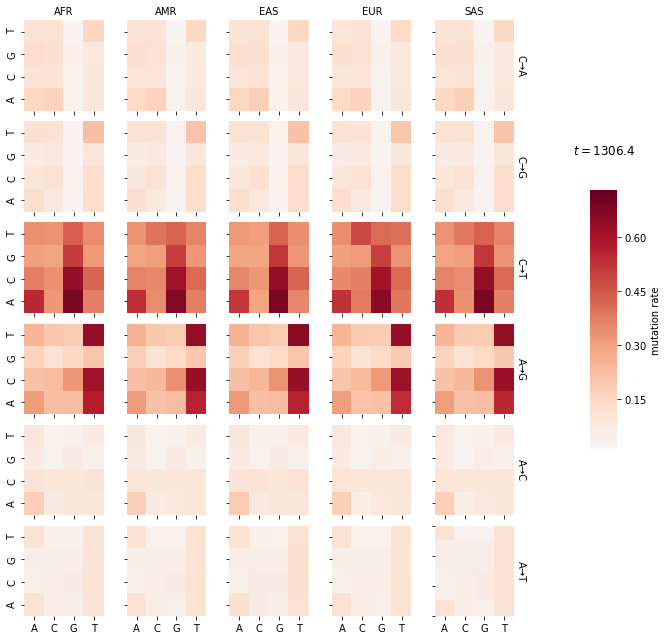

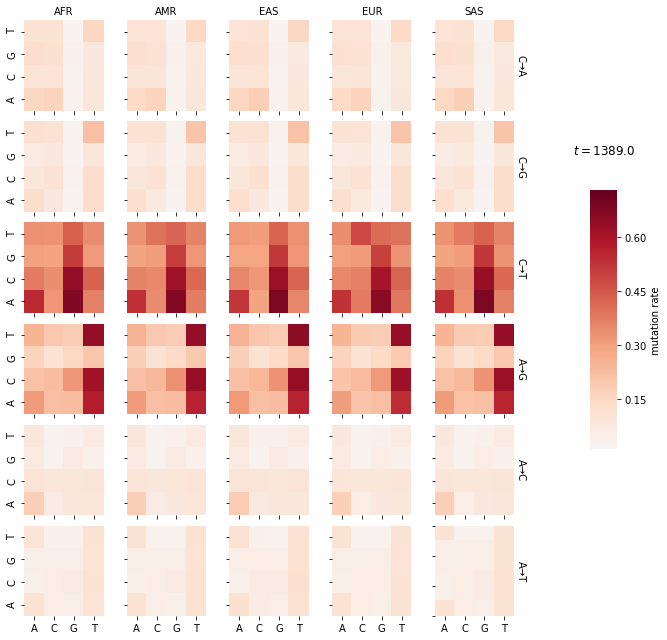

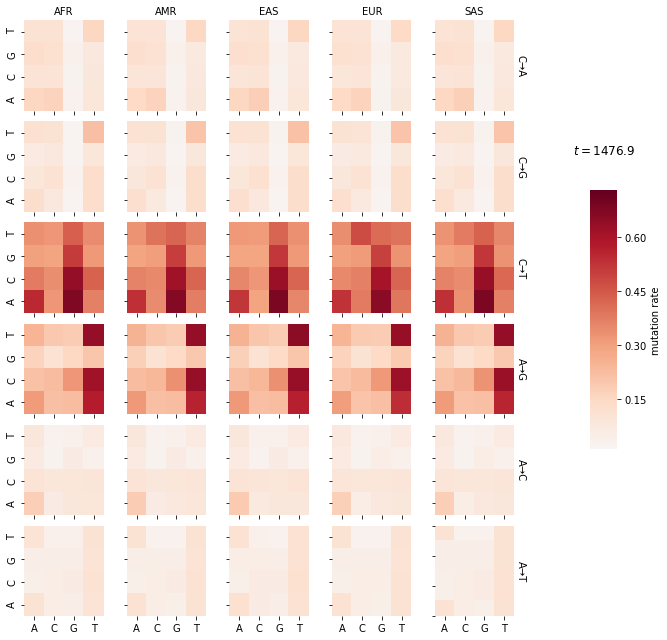

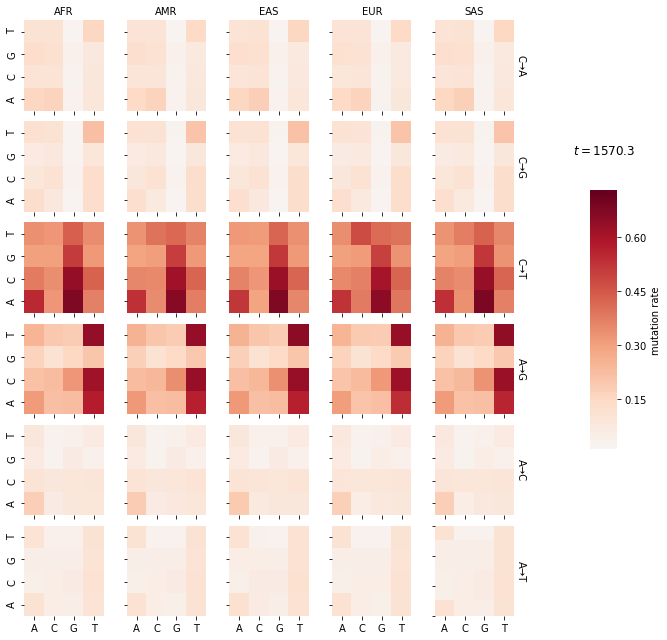

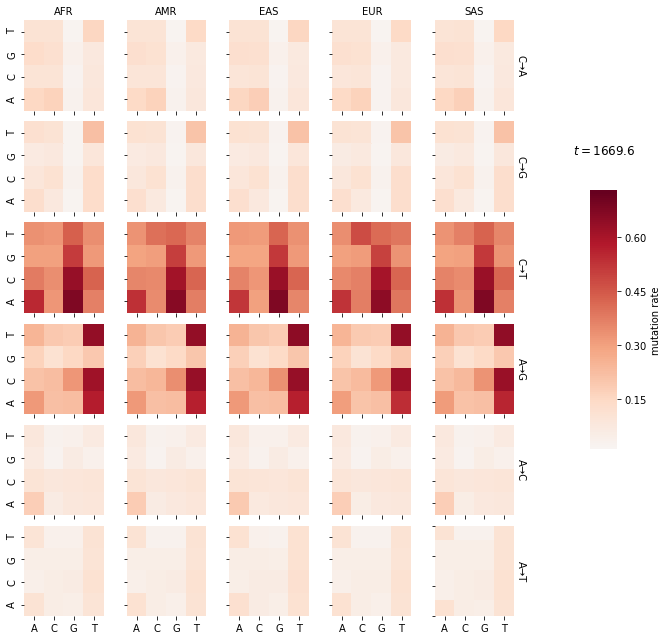

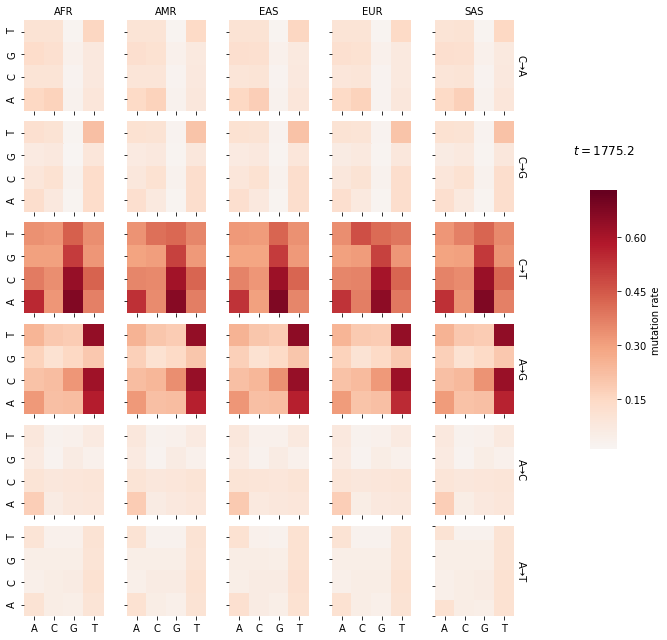

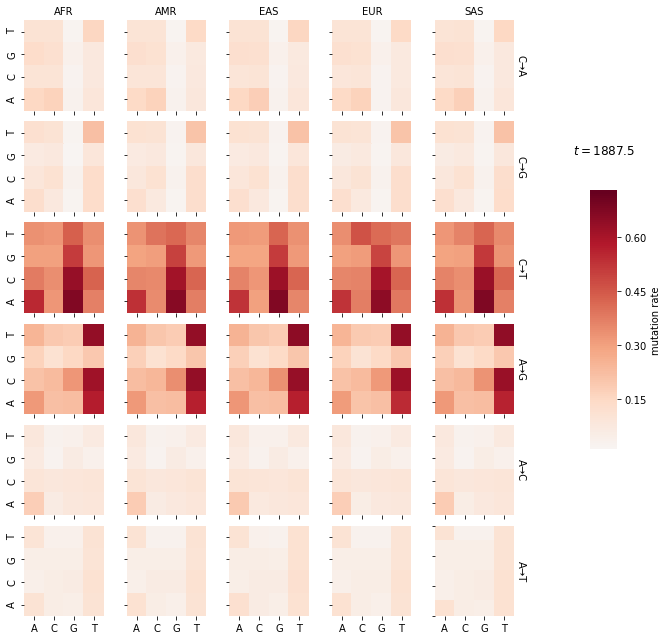

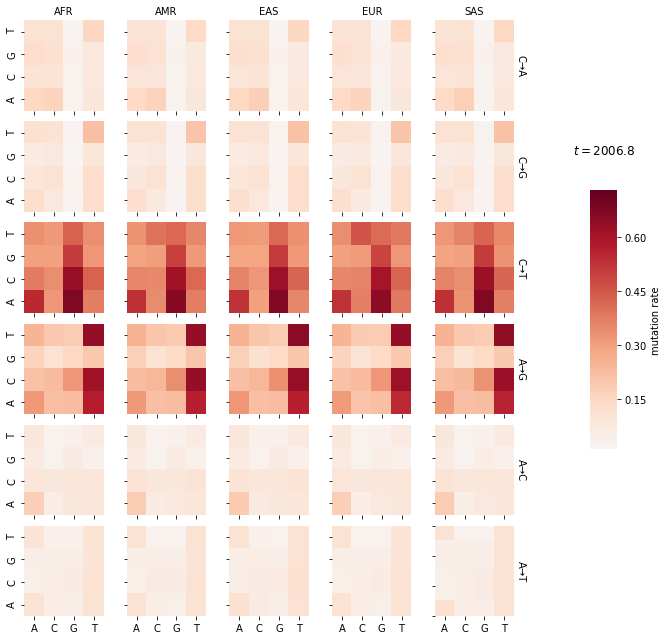

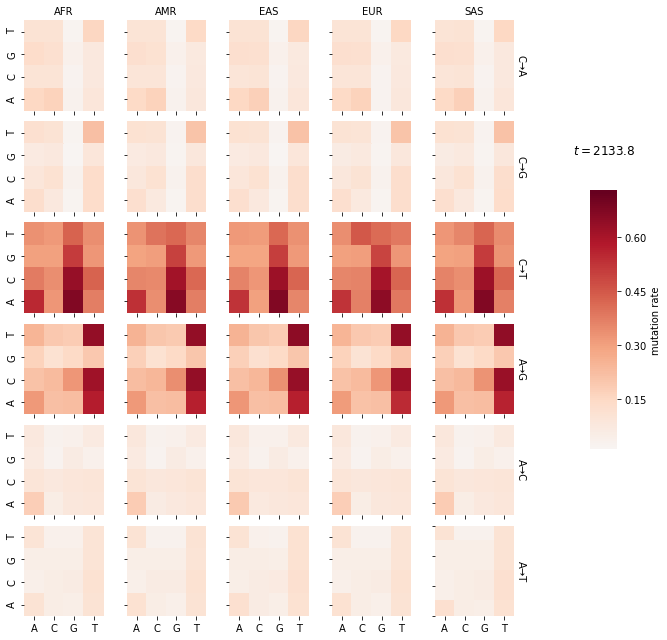

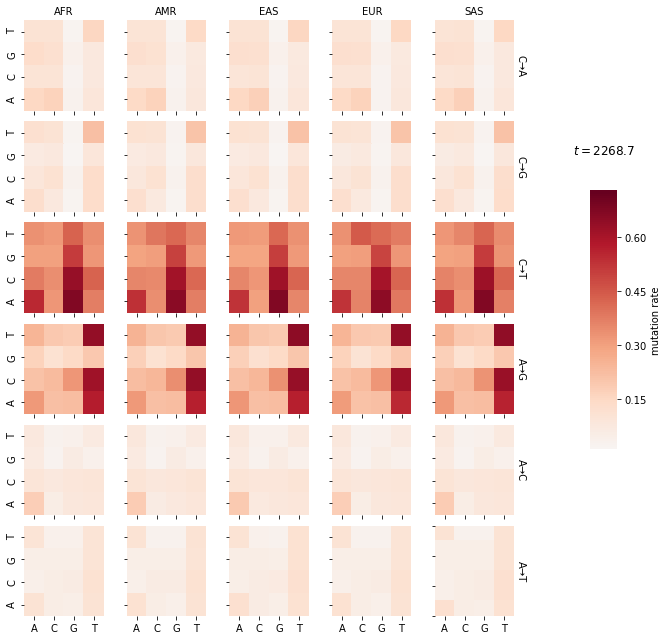

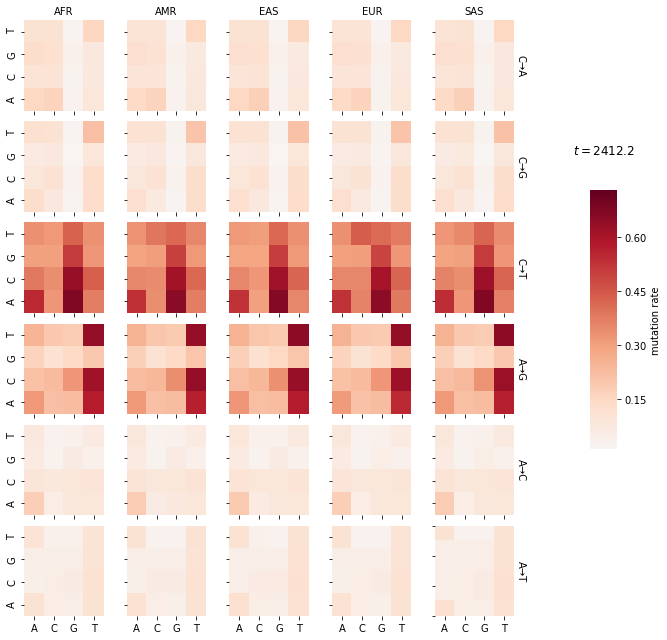

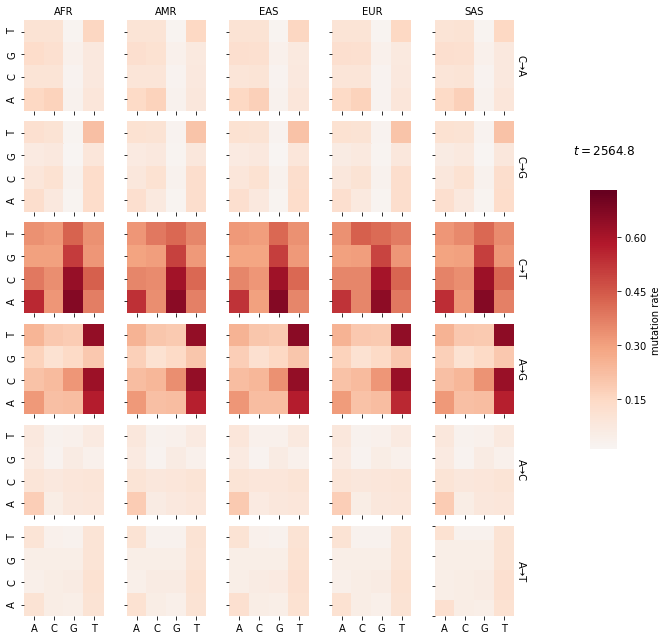

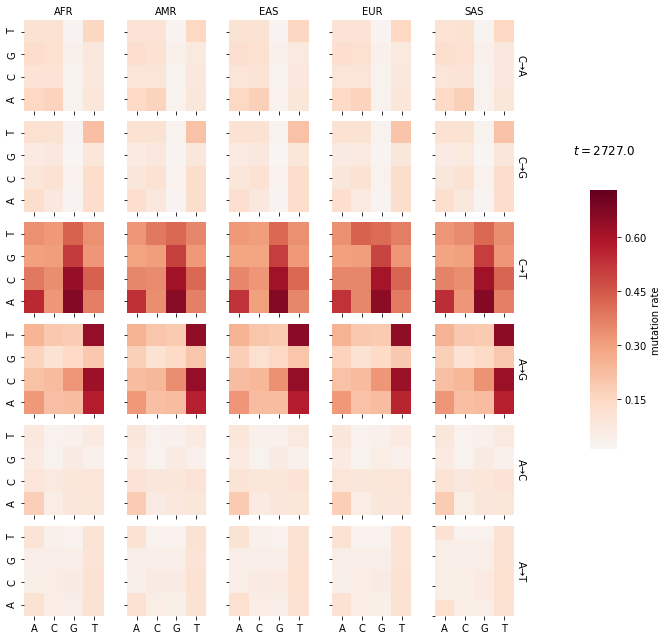

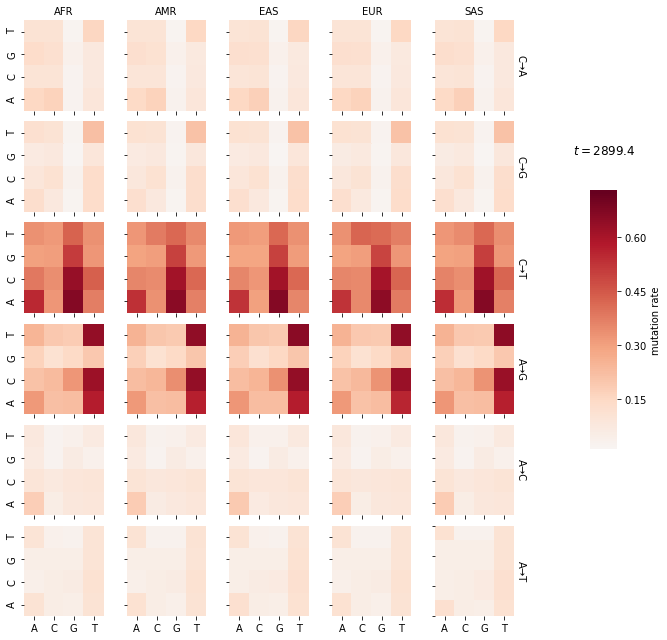

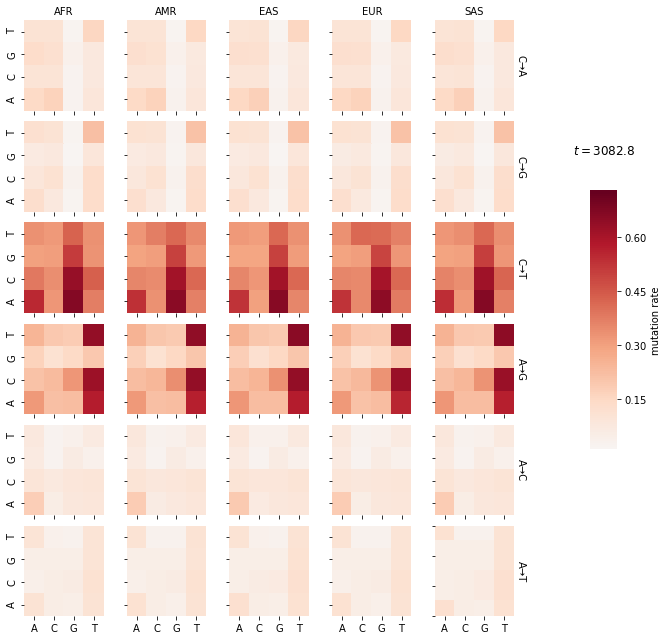

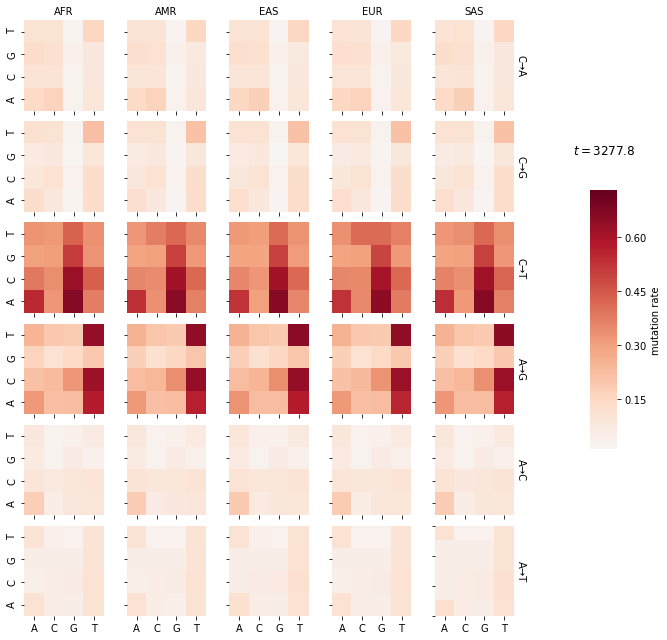

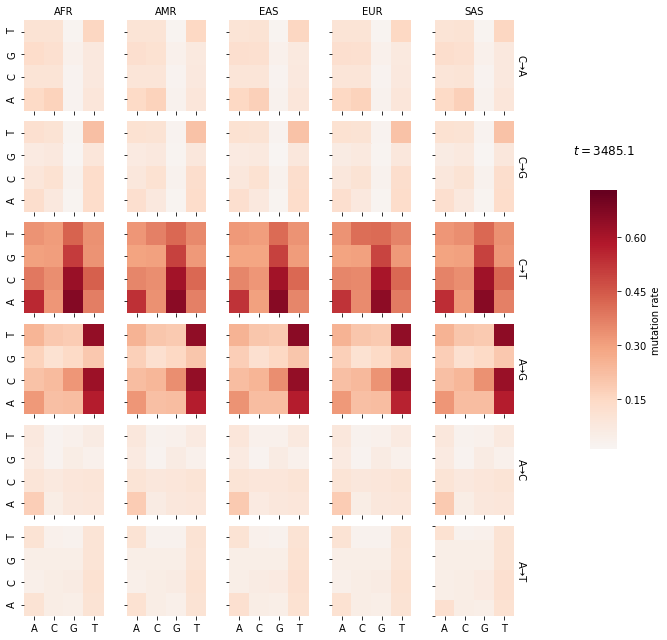

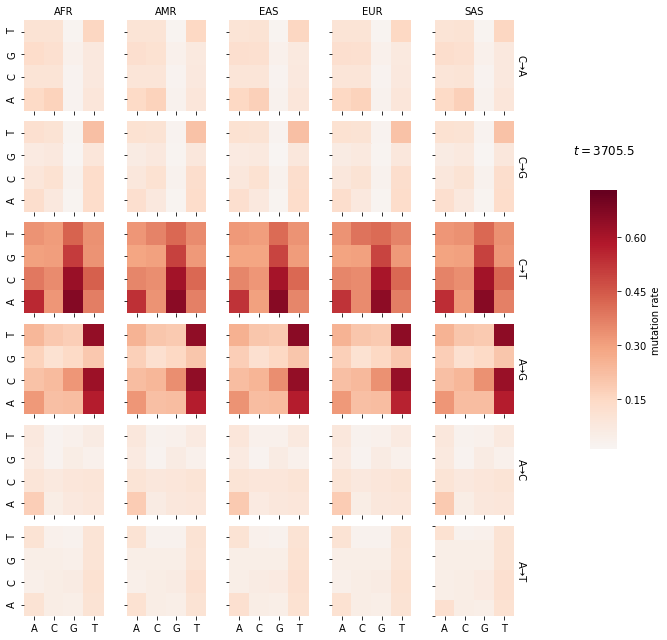

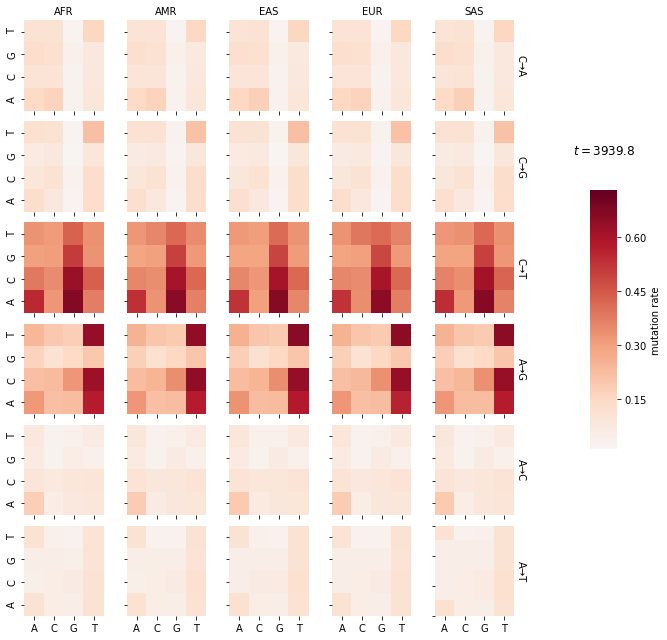

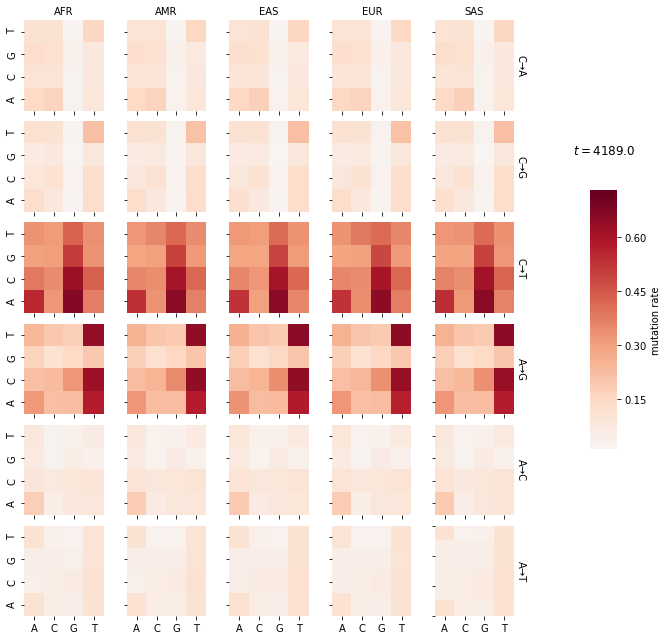

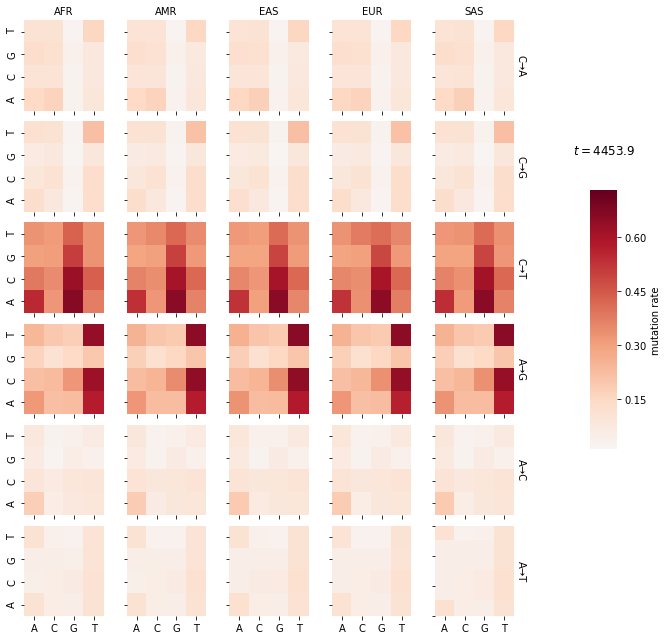

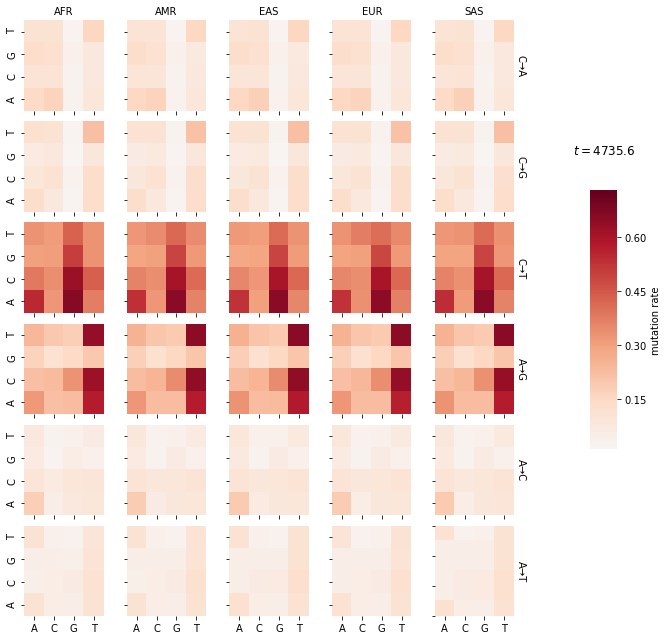

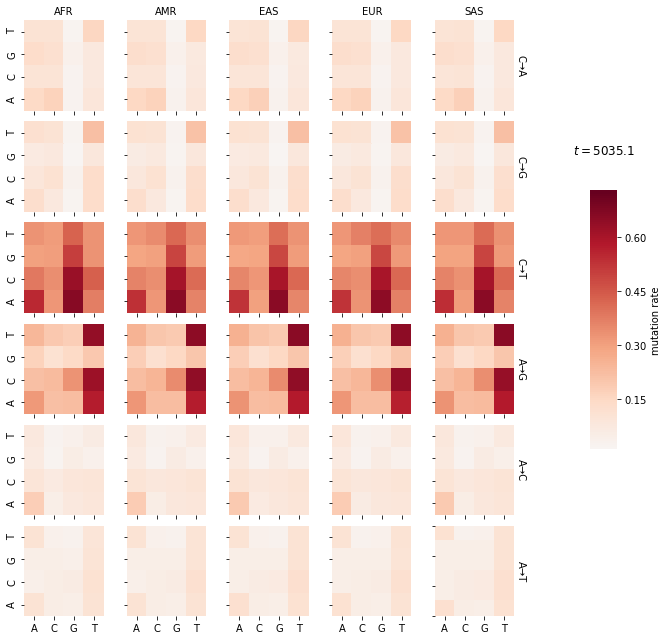

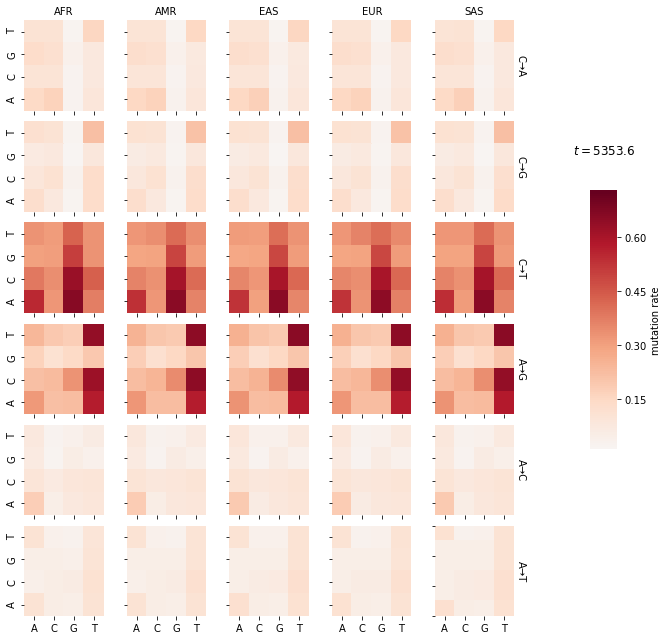

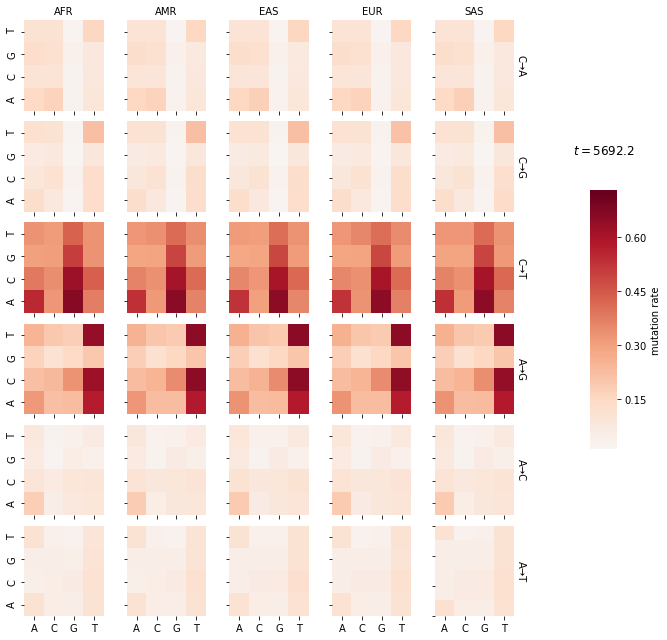

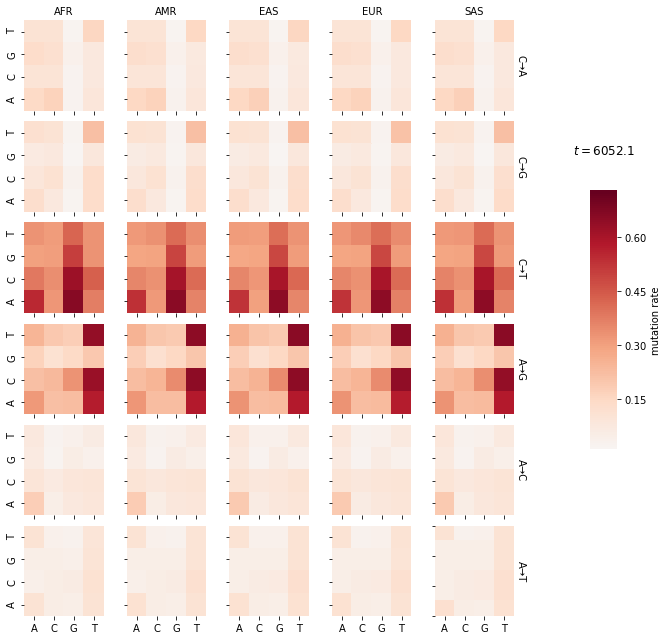

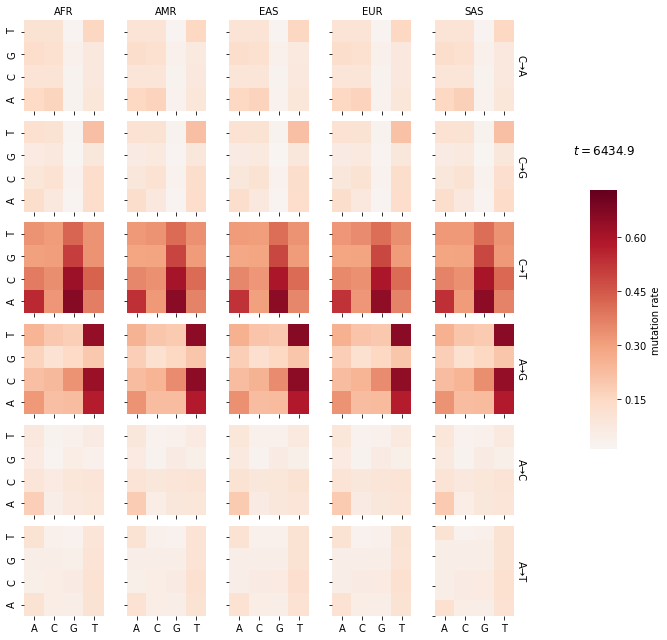

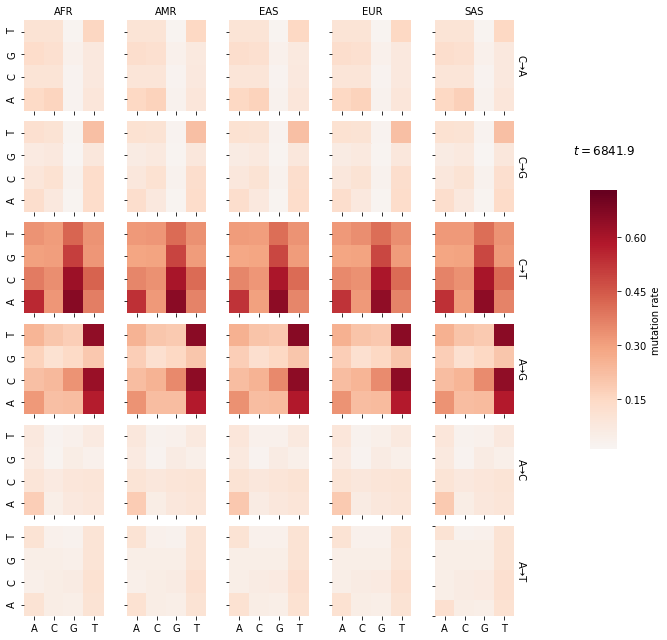

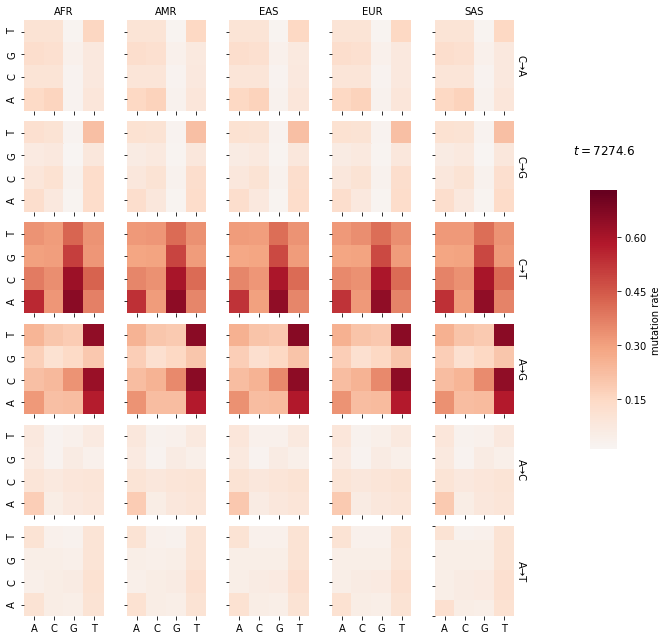

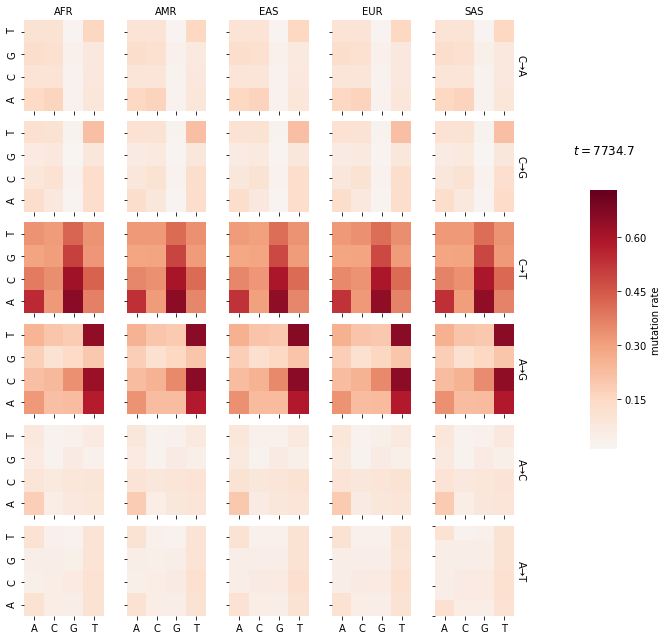

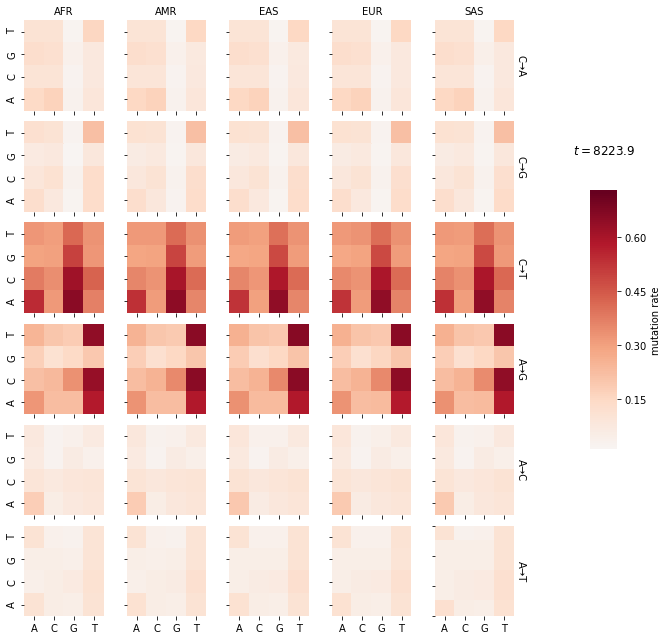

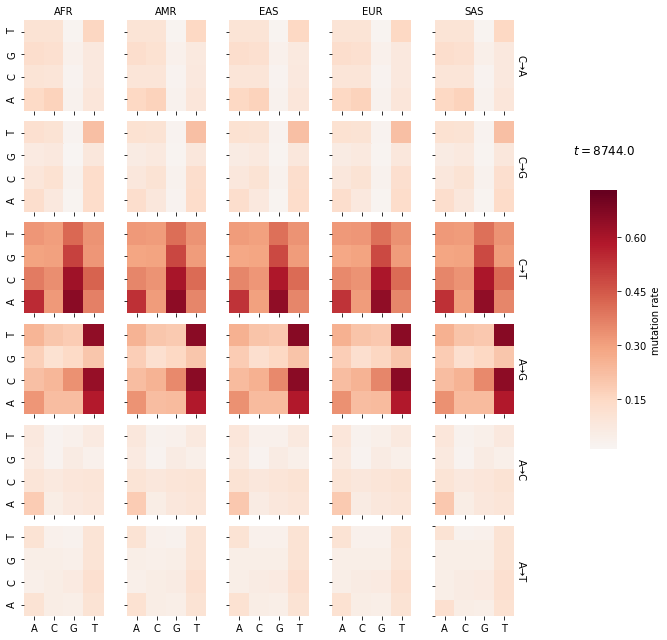

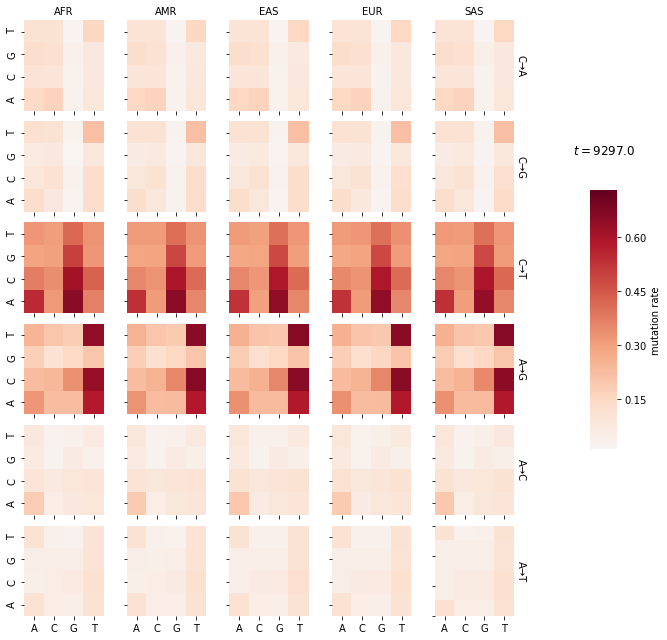

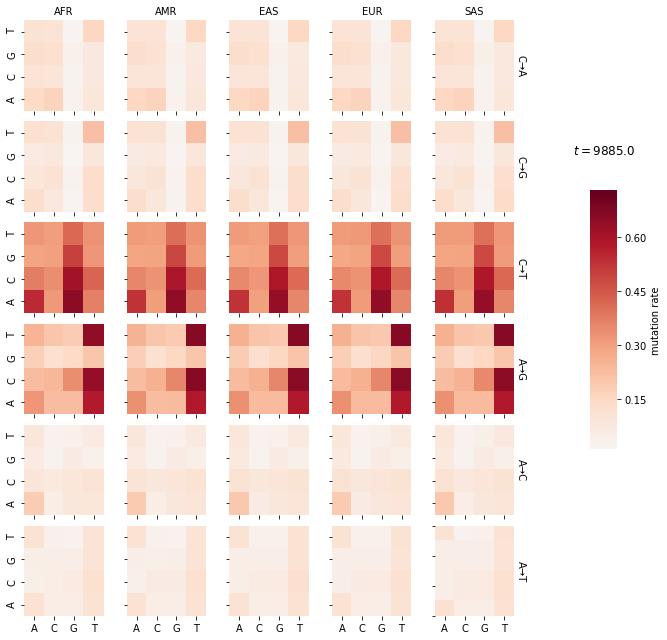

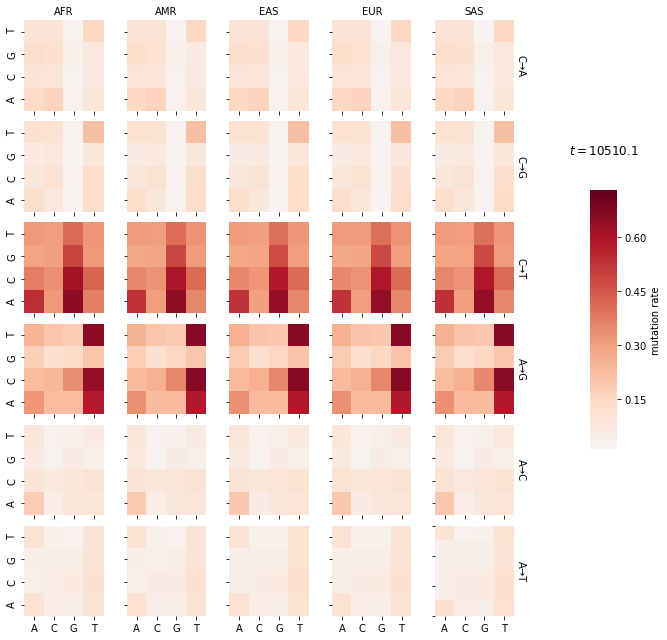

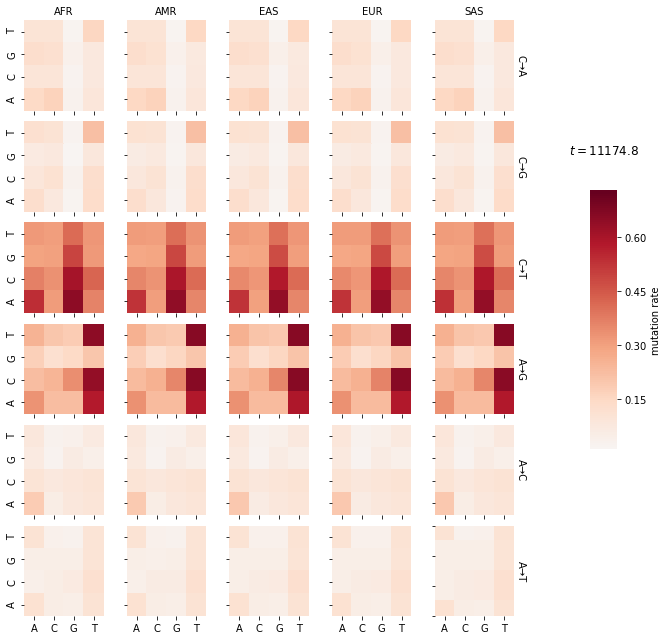

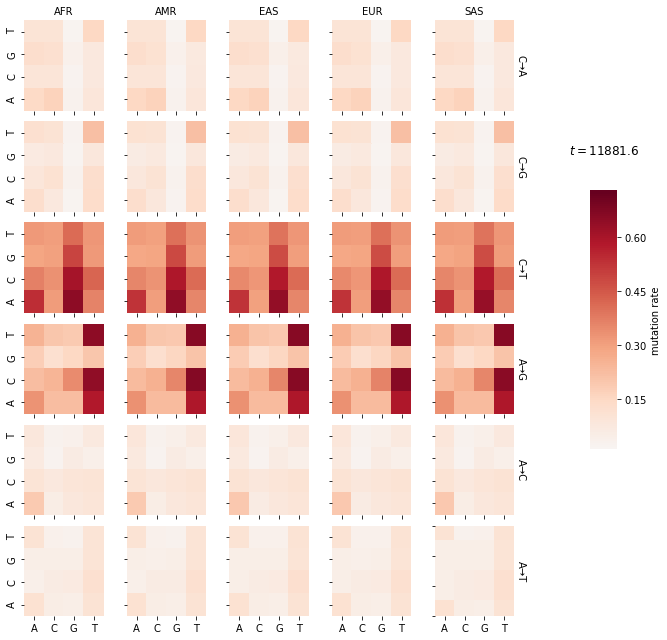

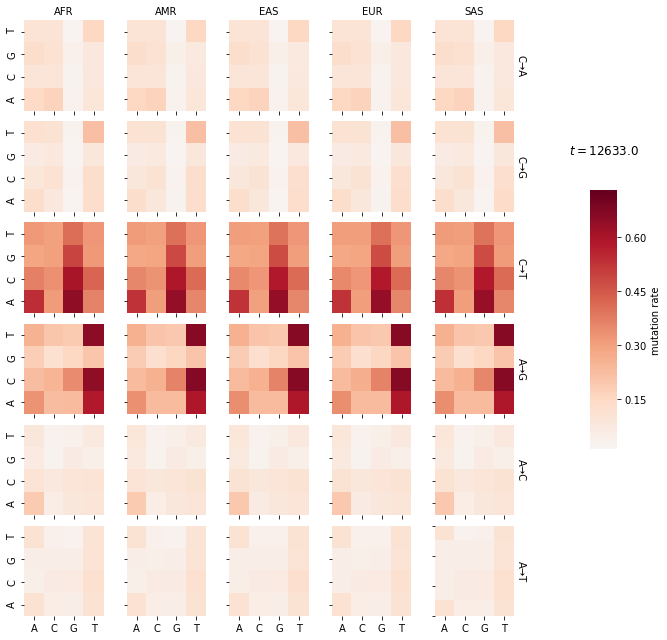

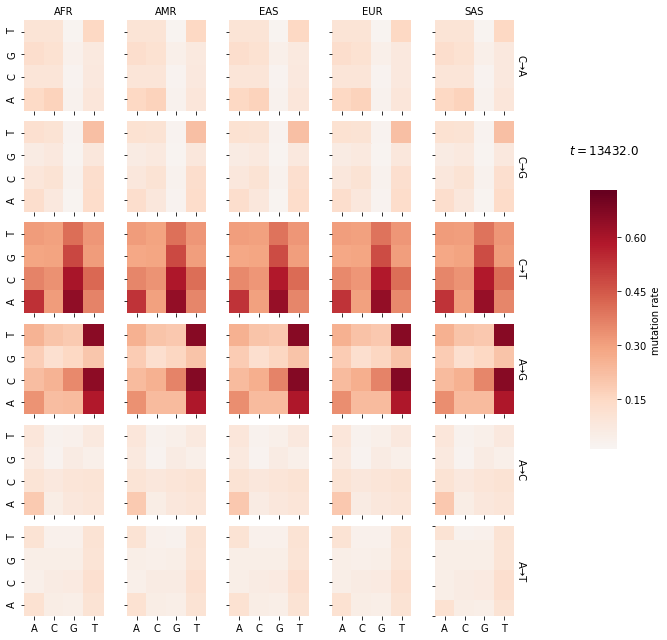

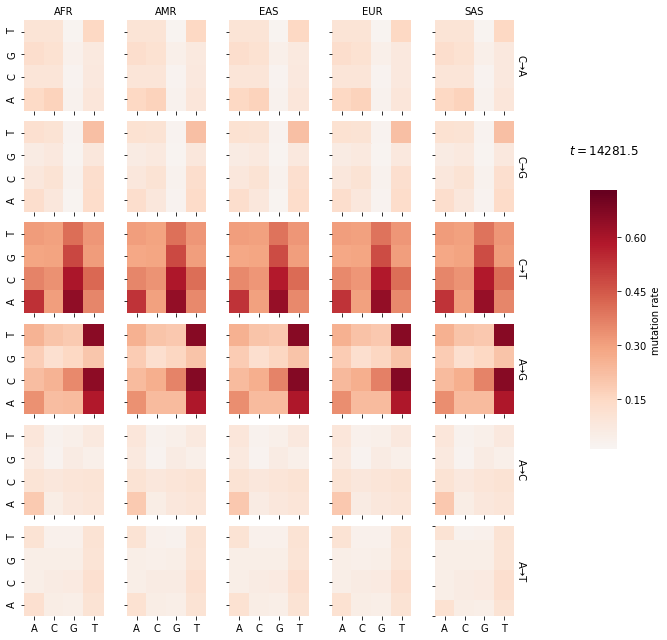

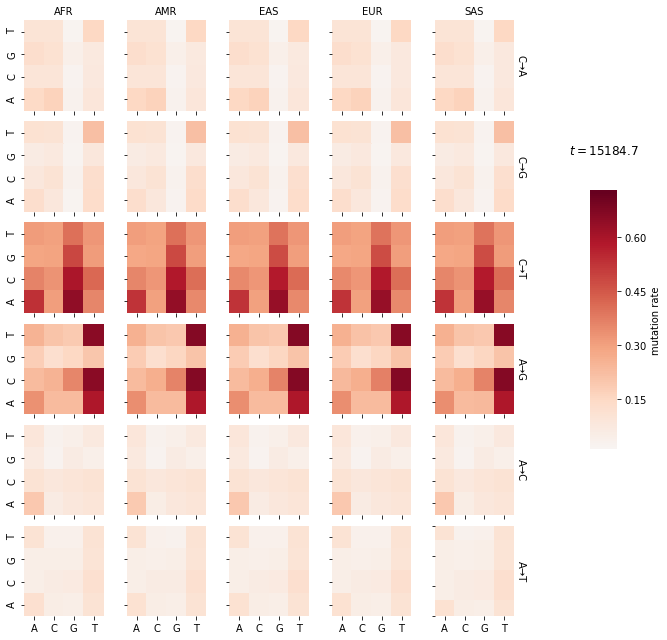

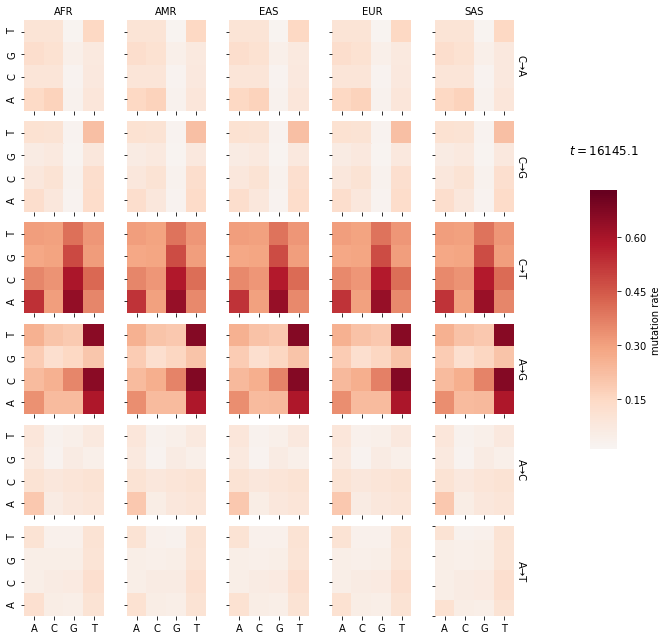

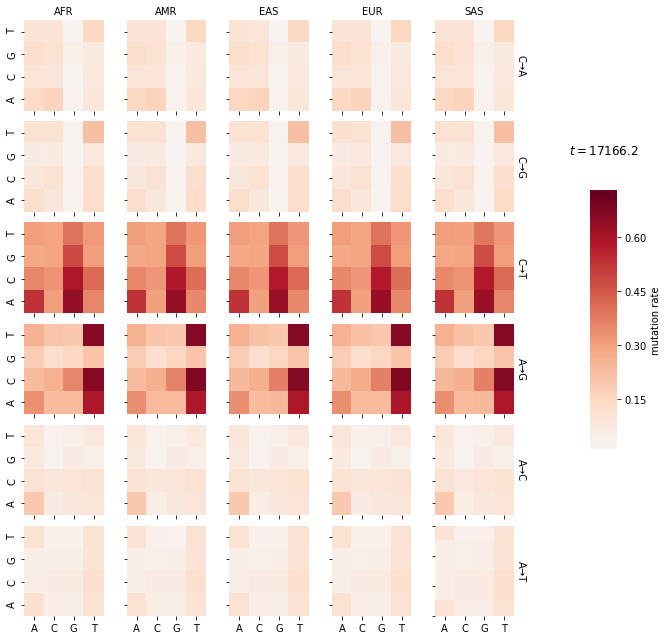

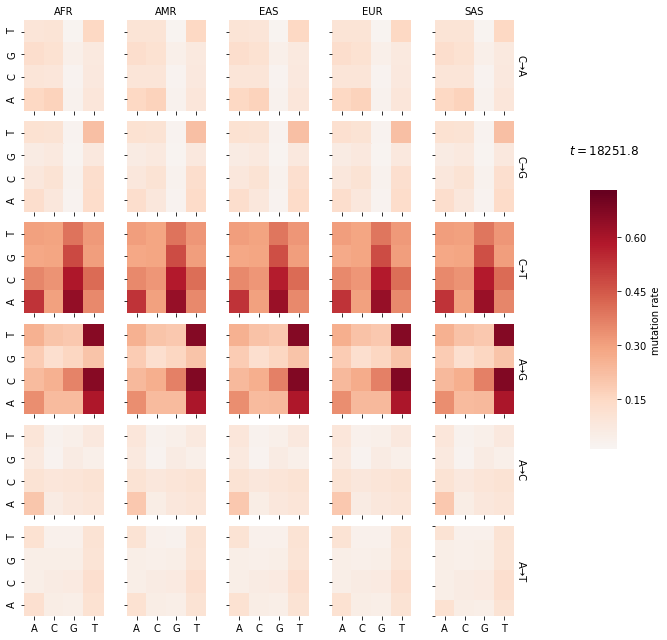

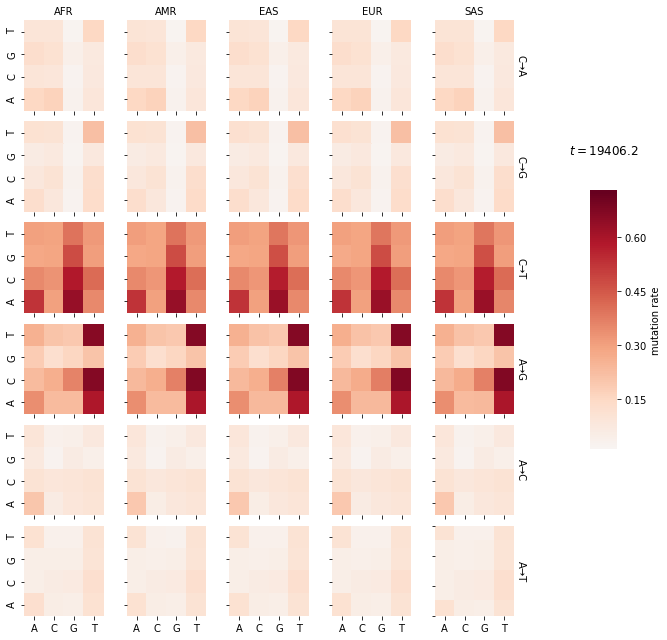

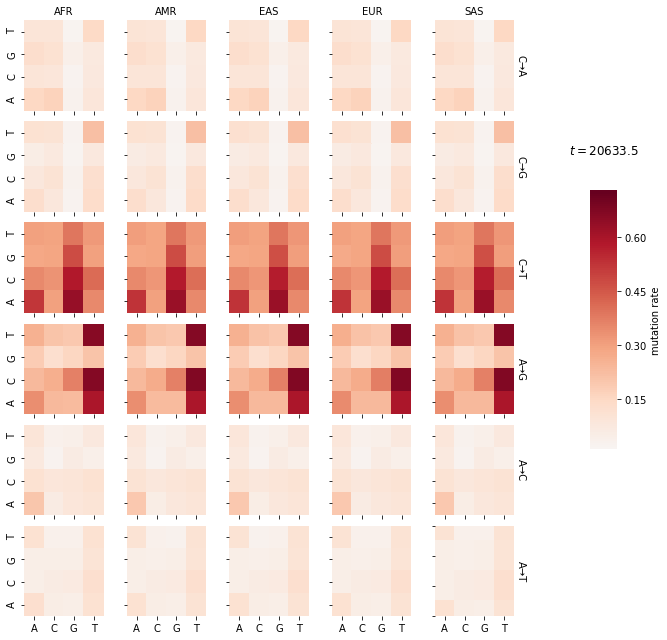

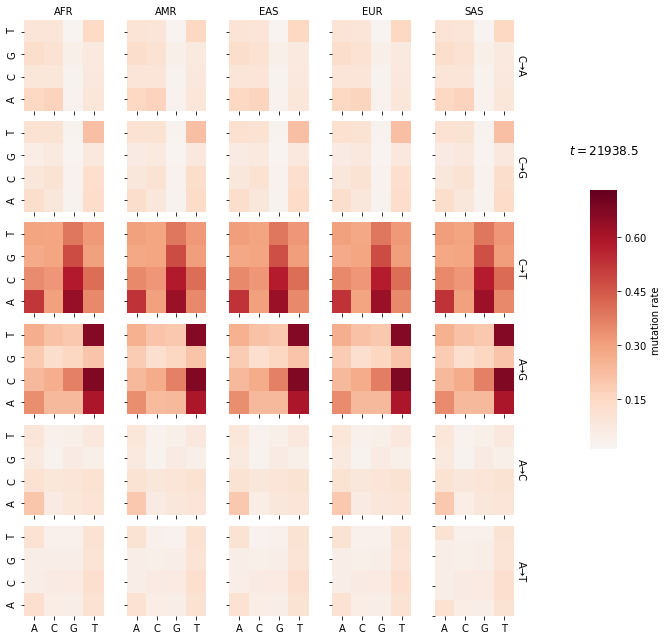

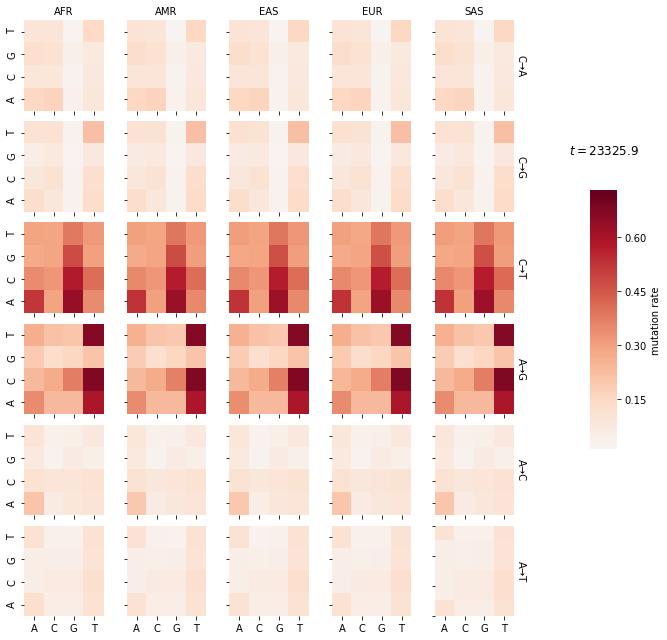

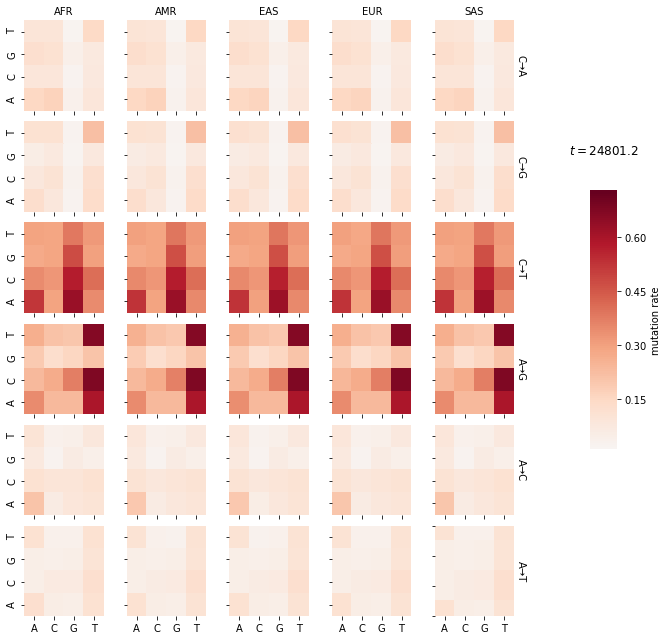

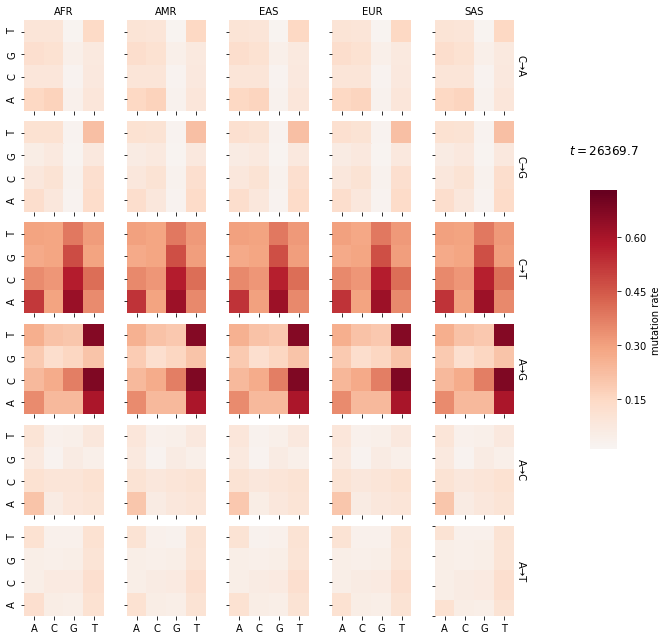

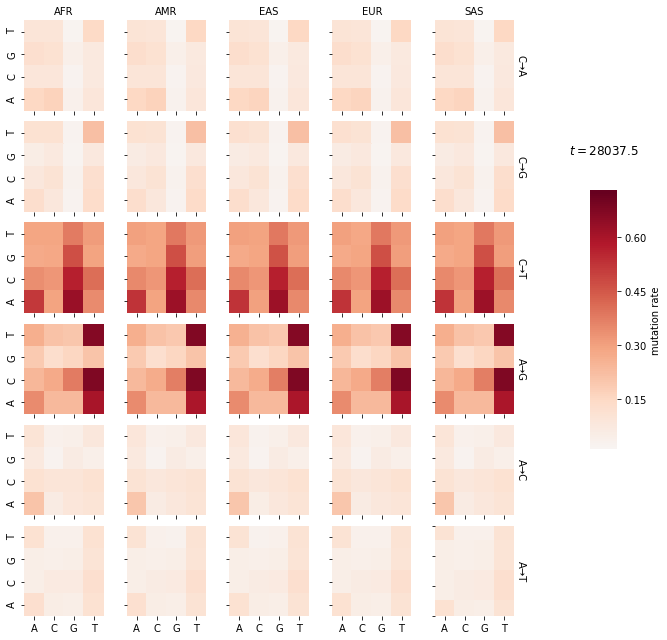

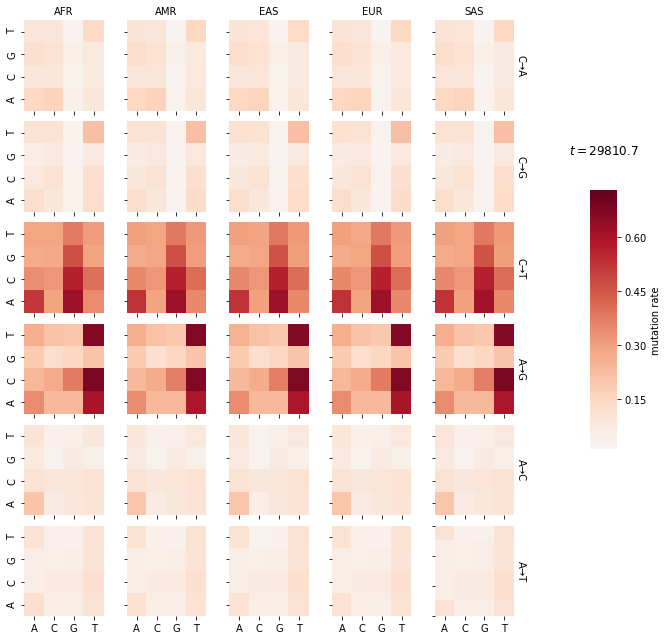

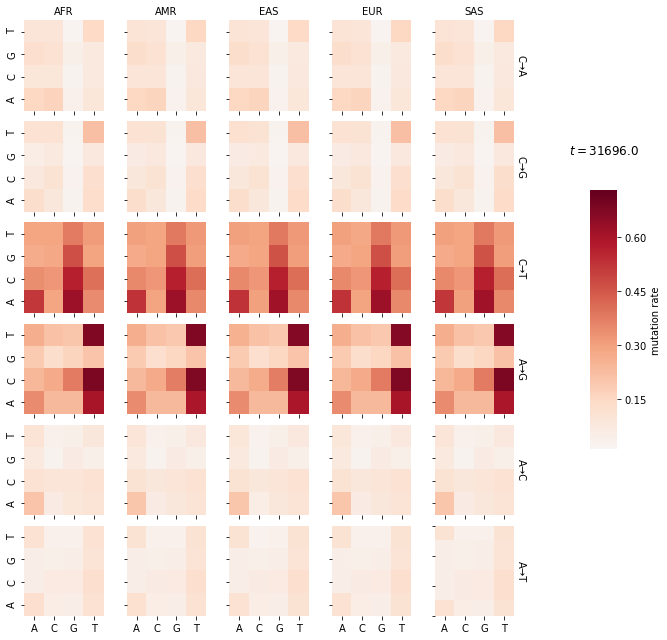

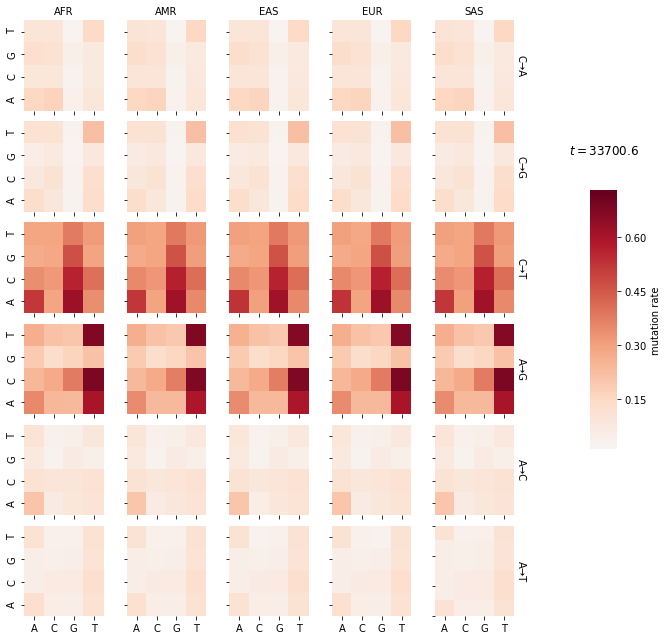

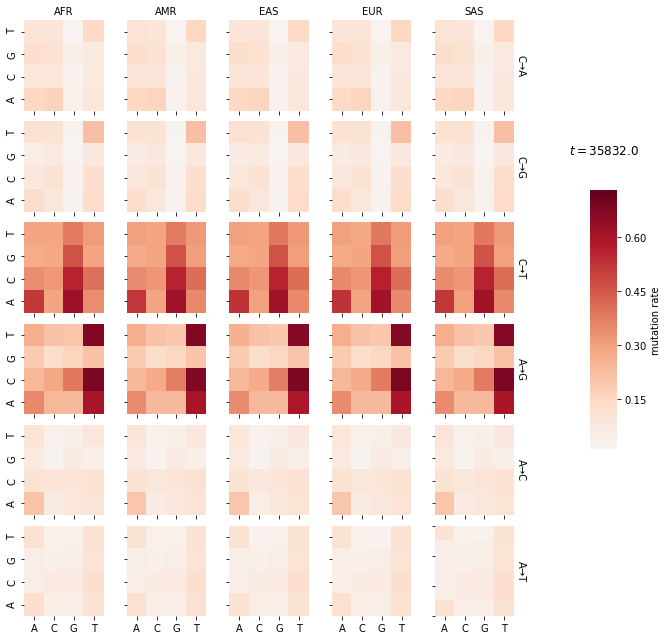

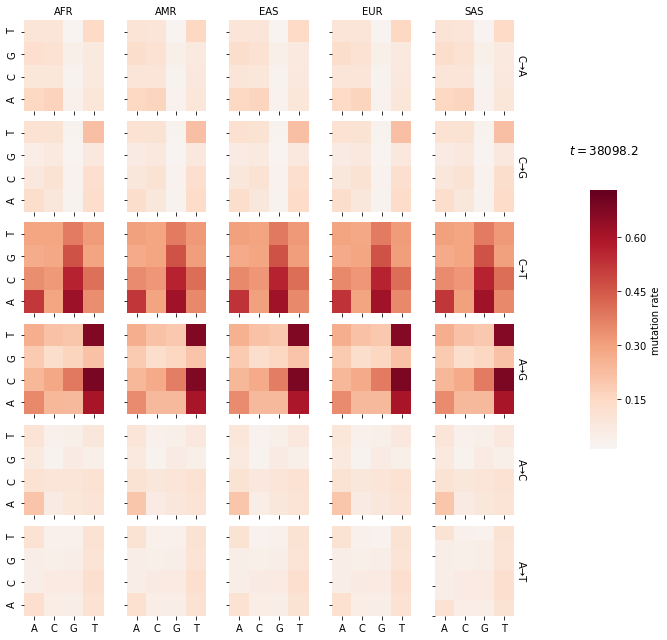

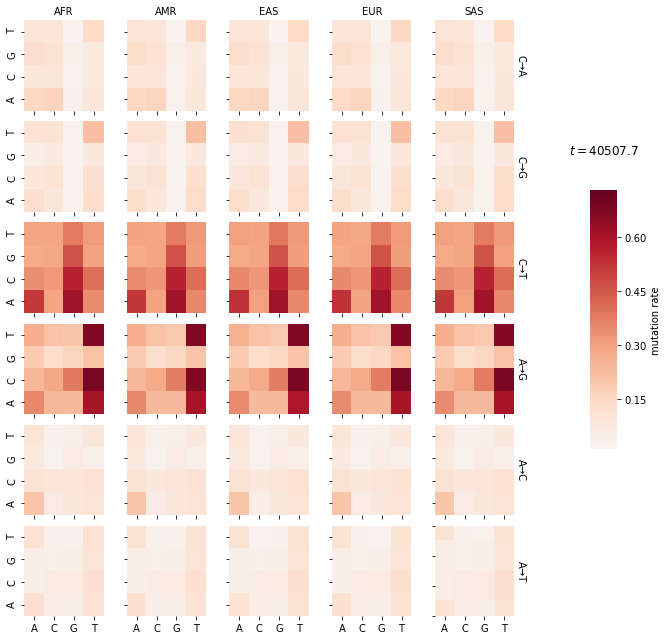

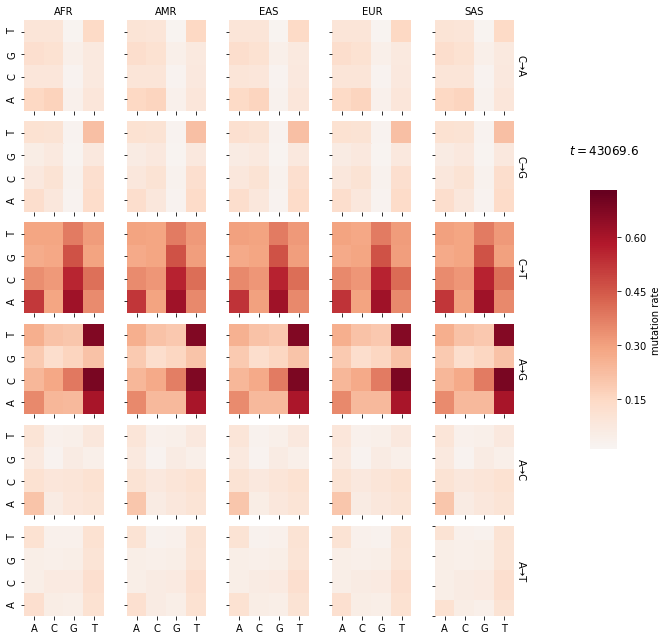

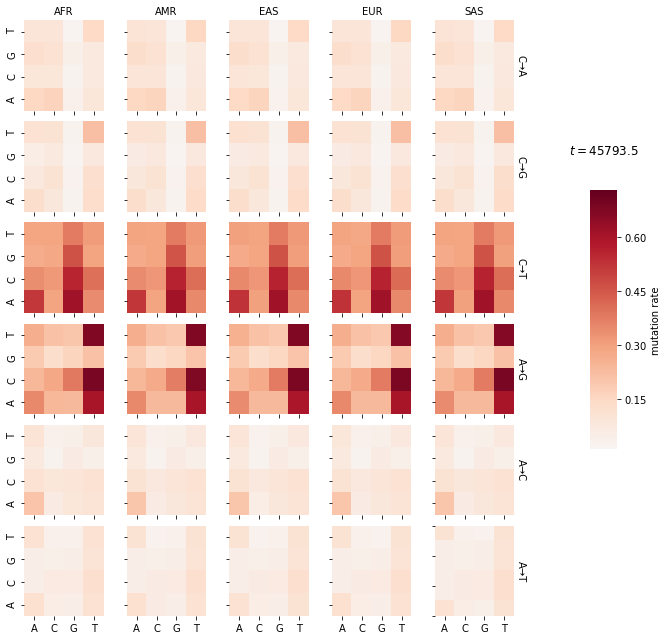

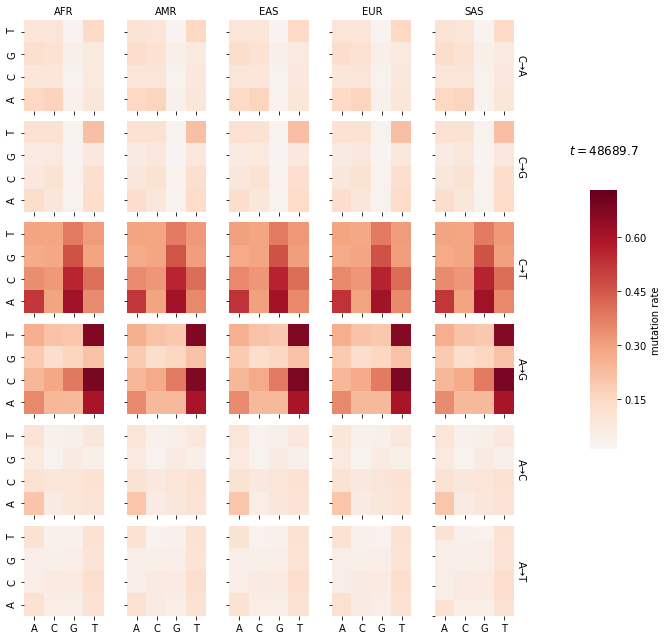

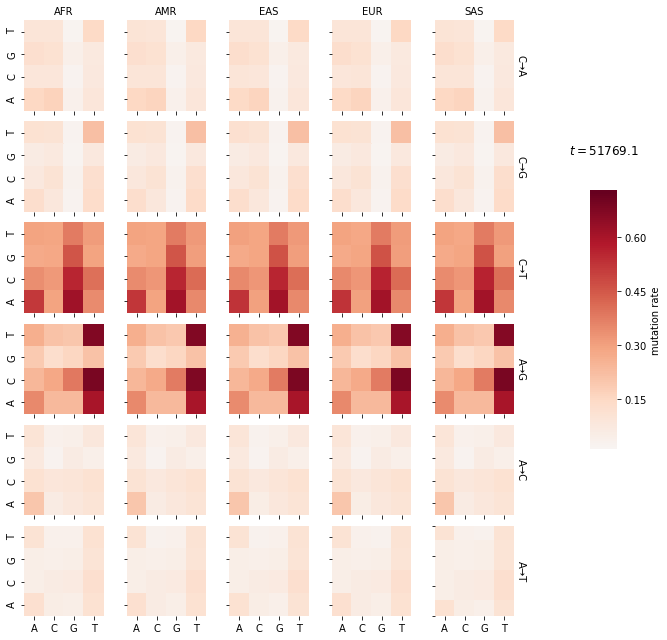

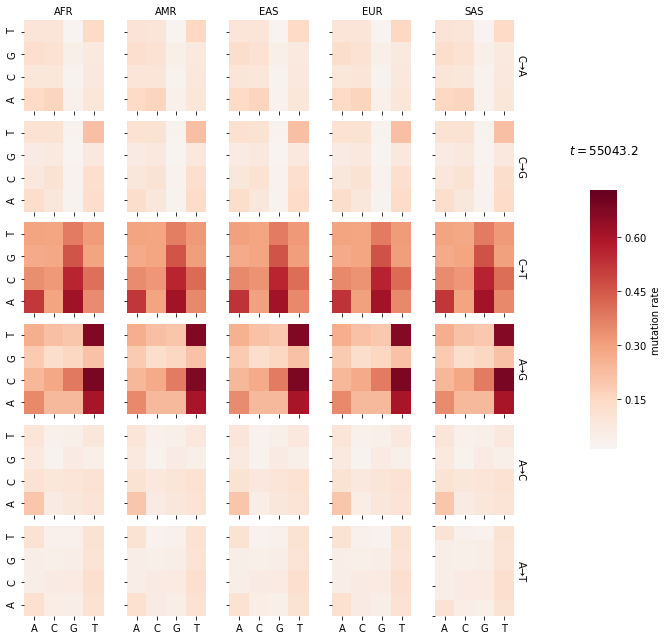

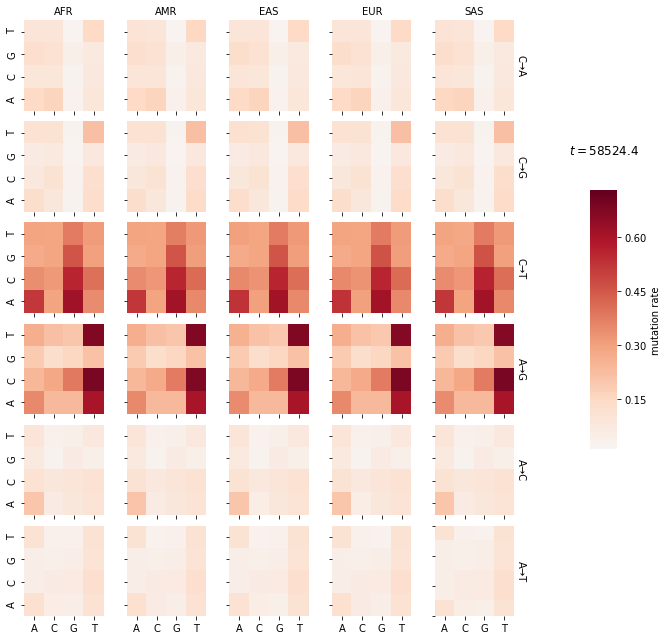

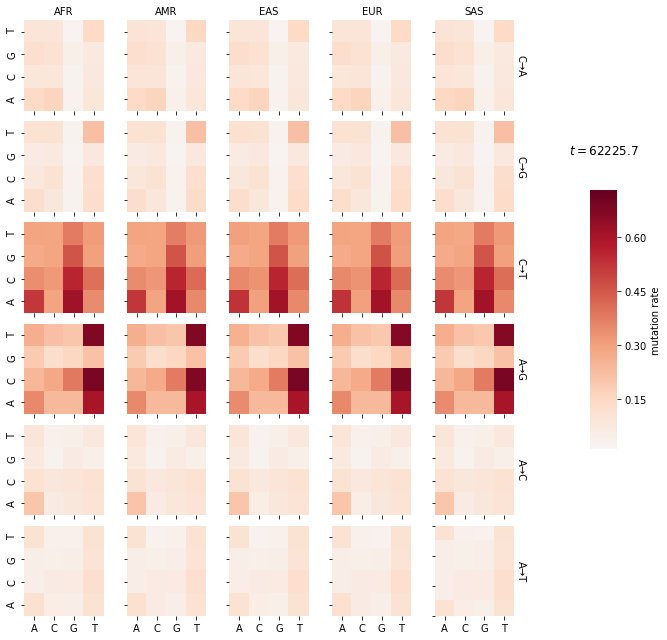

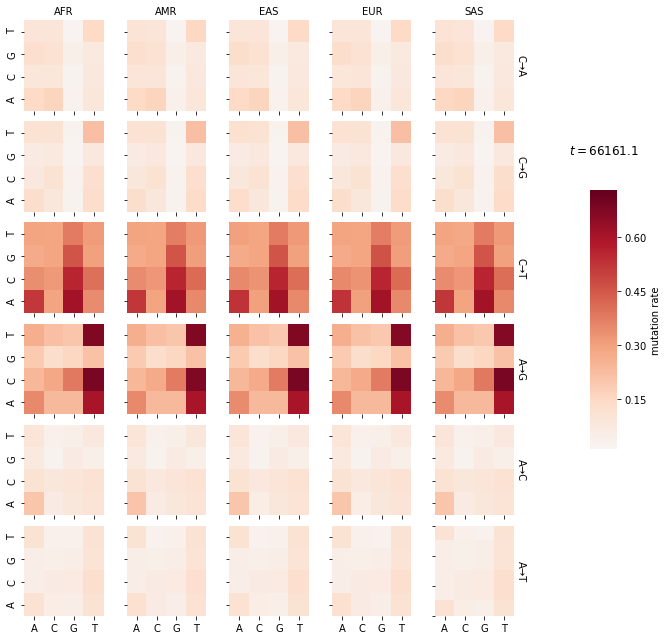

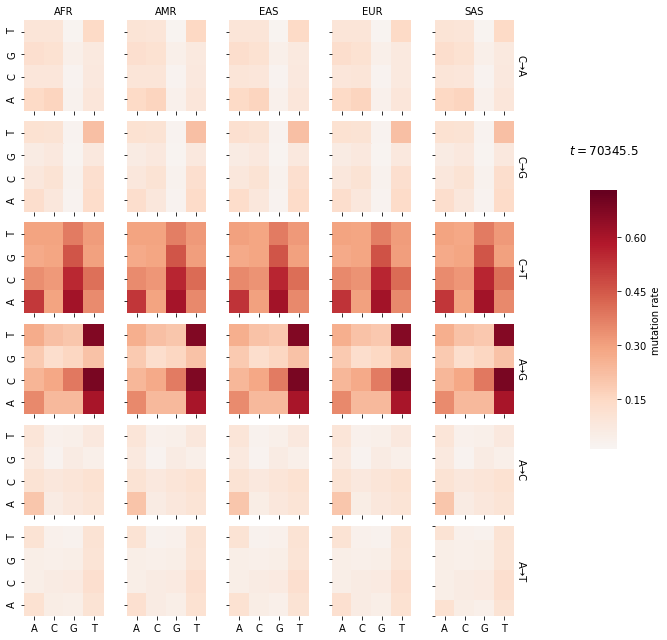

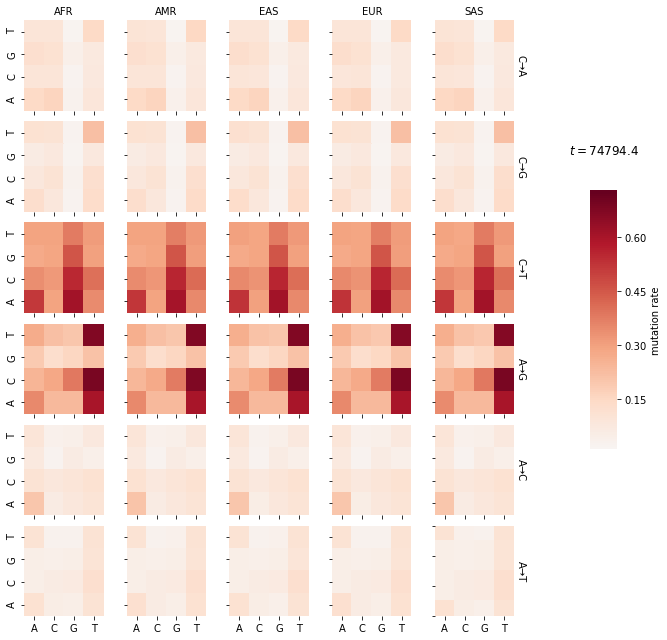

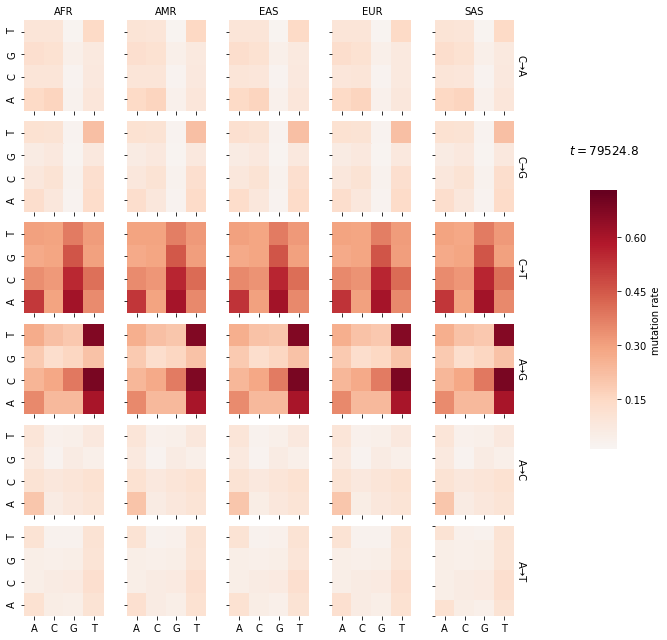

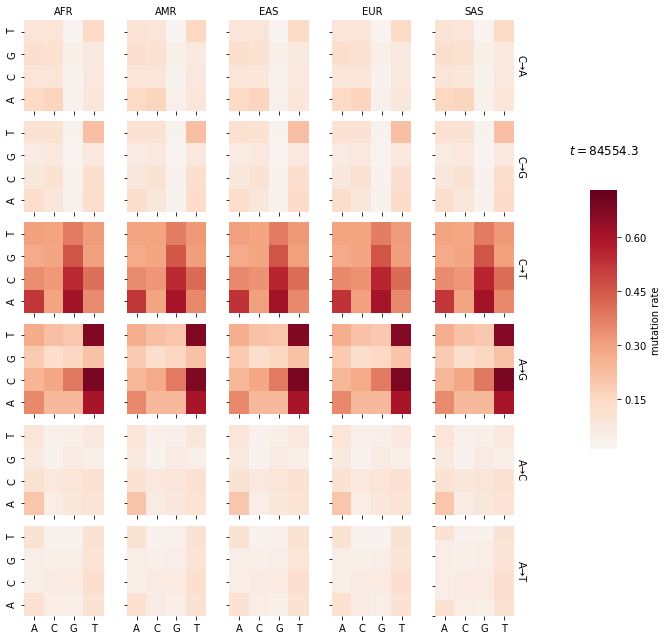

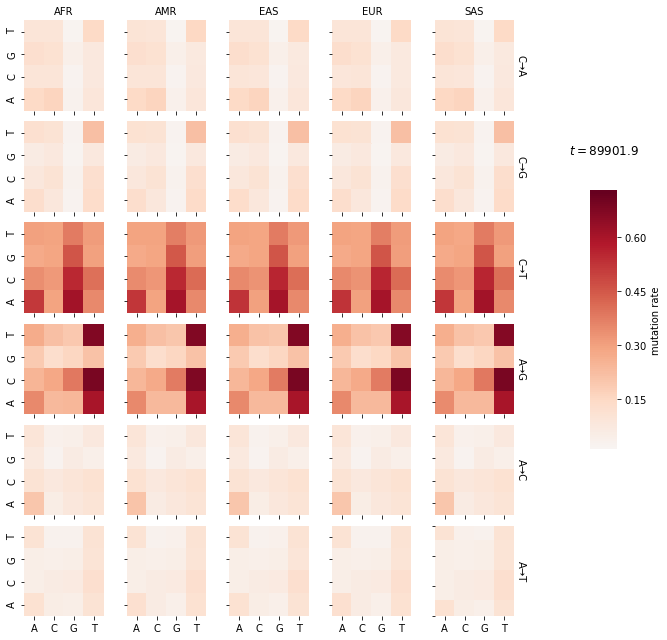

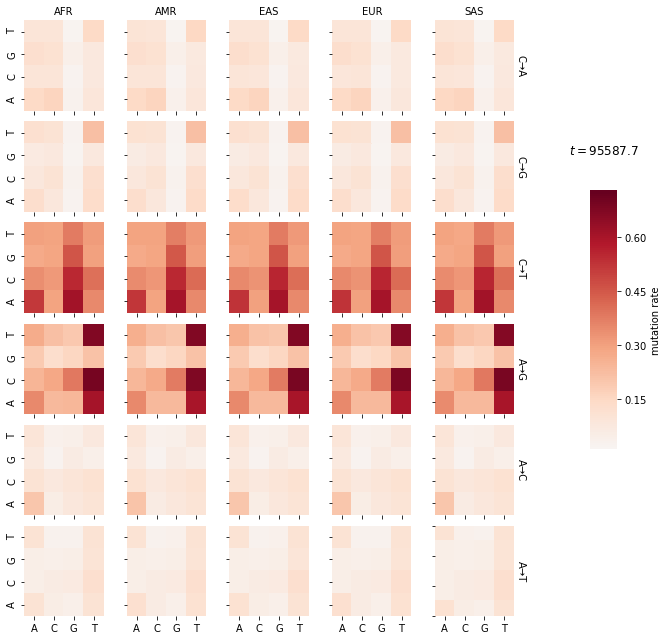

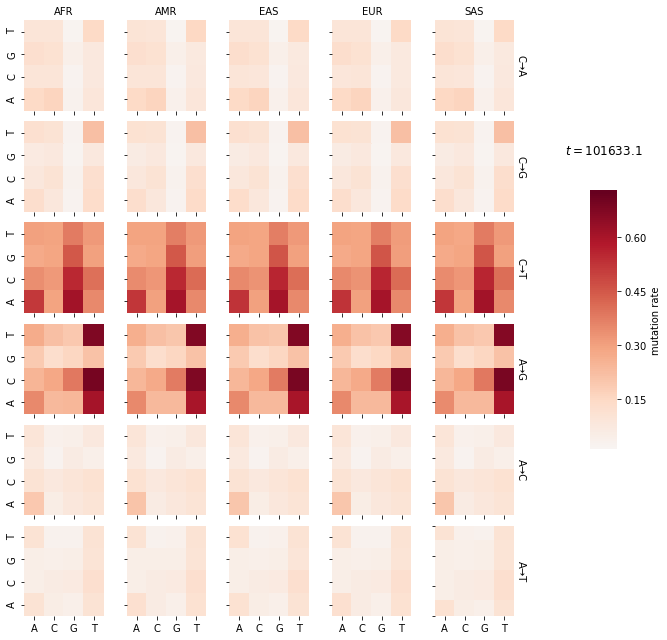

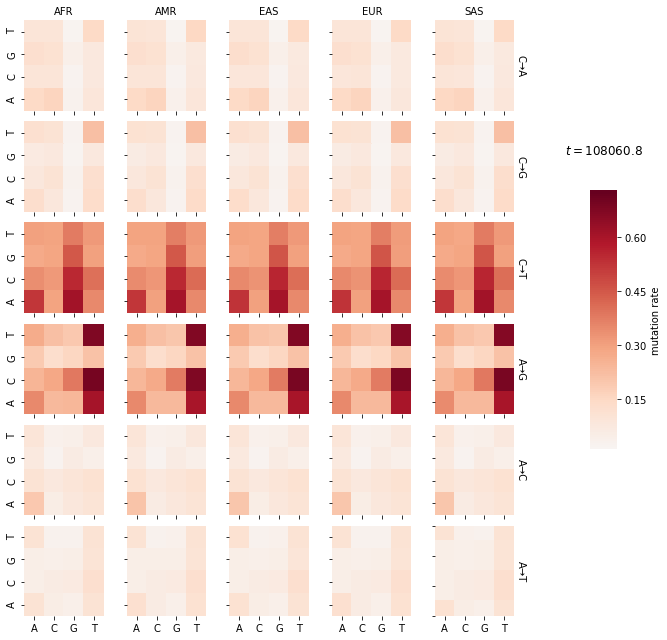

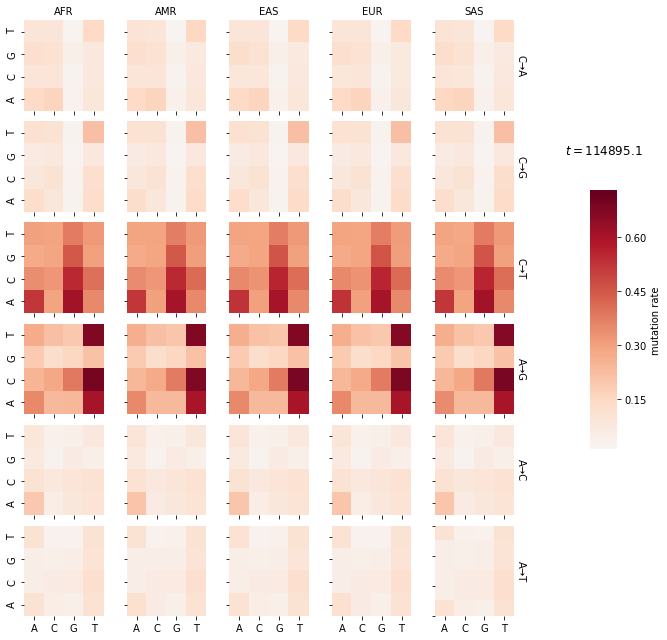

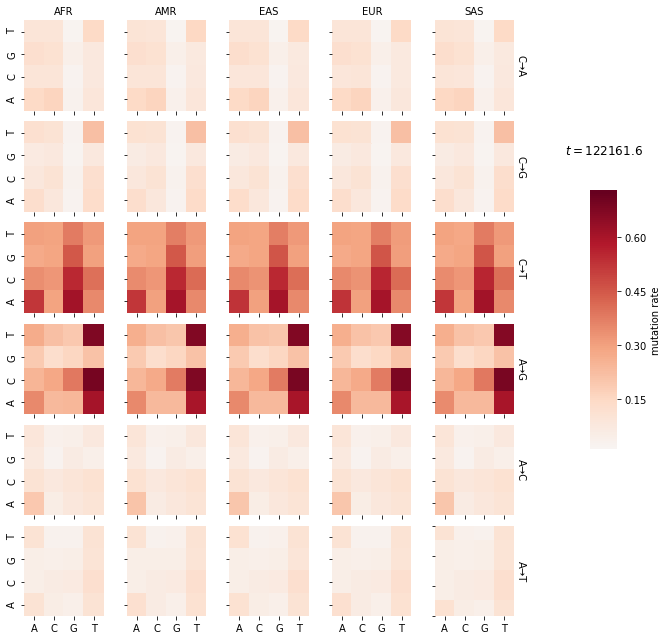

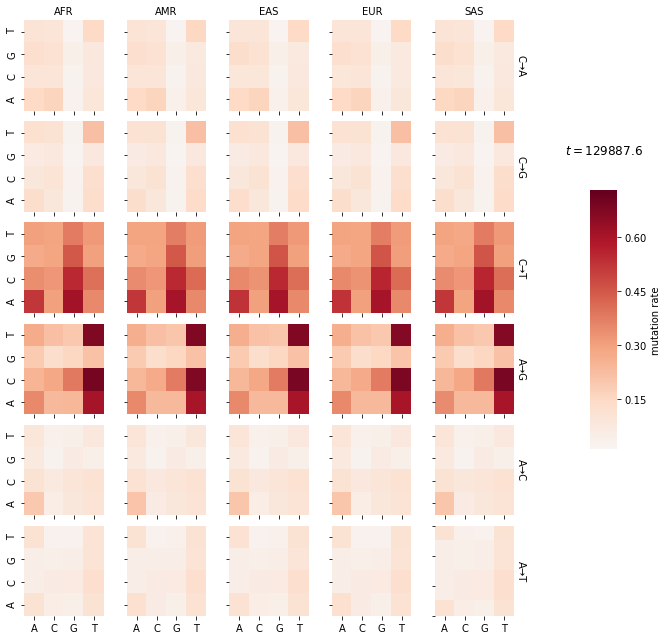

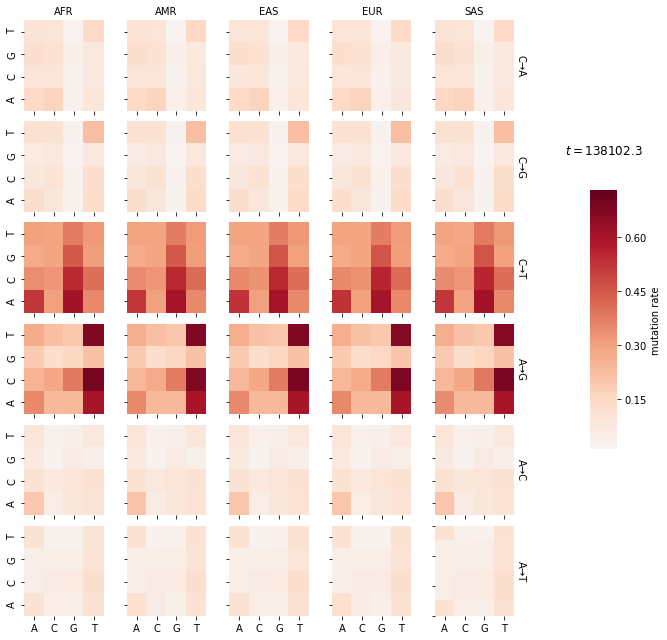

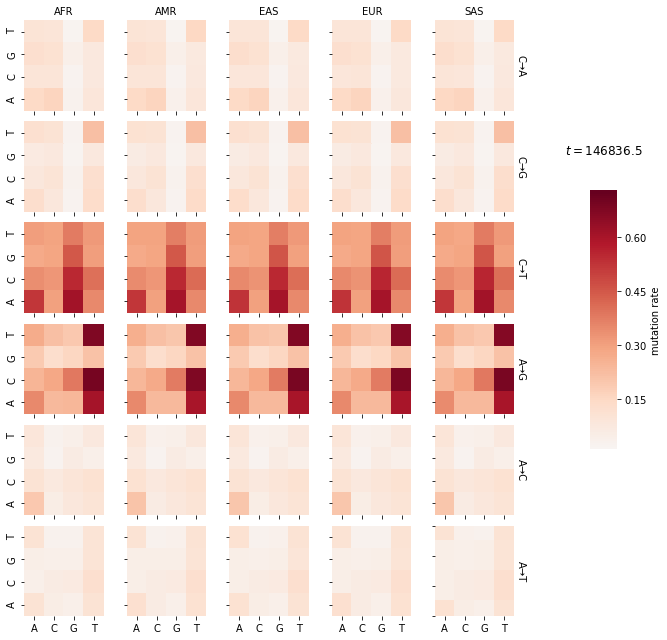

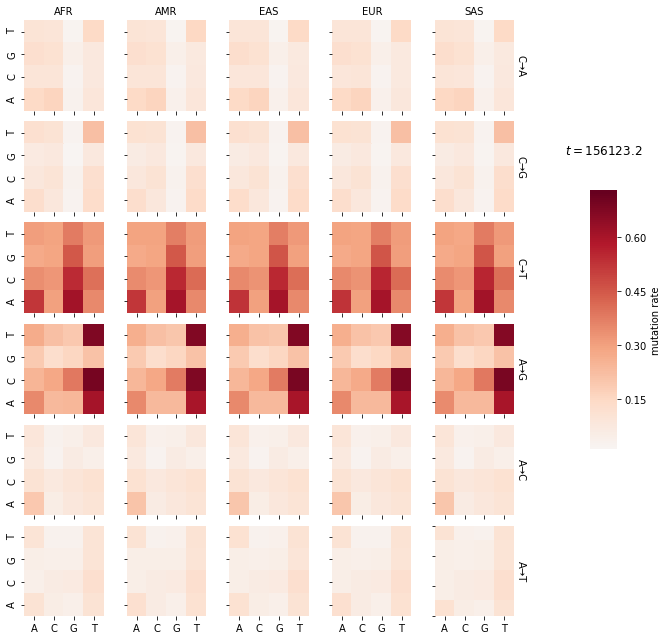

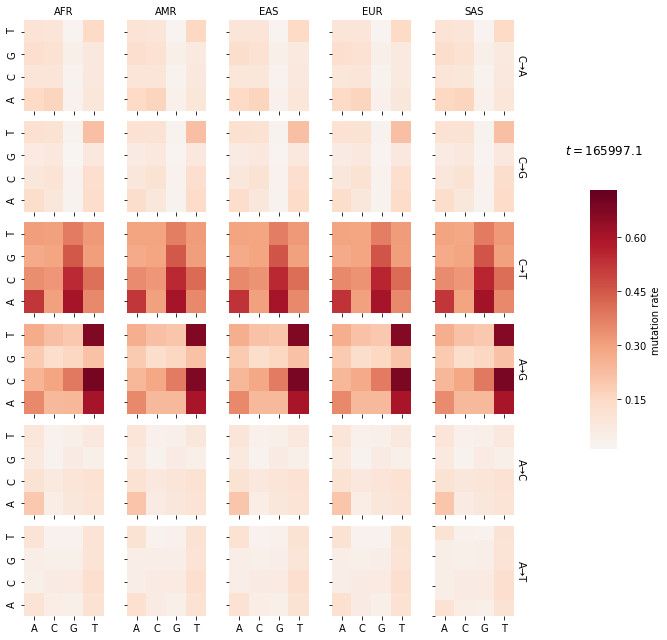

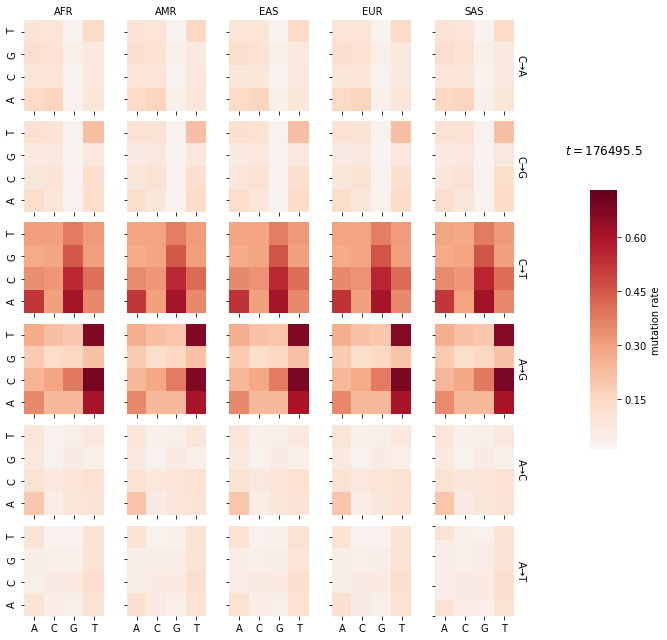

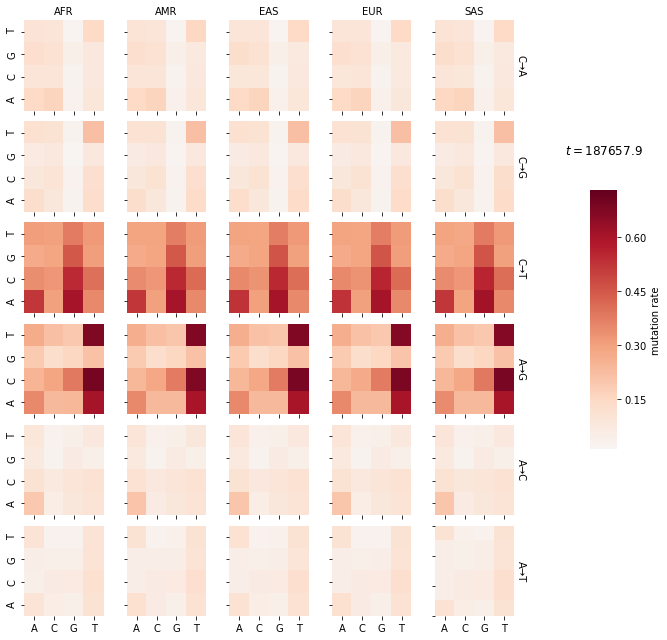

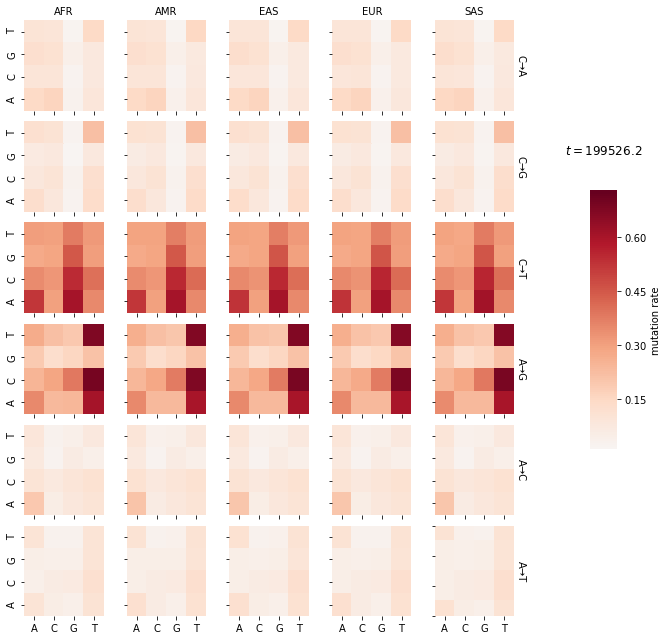

In [68]:
foo = np.concatenate(tuple(ksfs_dict[pop].μ.Z for pop in pops if pop is not 'AFR')).T
vmin = foo.min()
vmax = foo.max()
for i in range(len(time)):
    df = pd.DataFrame(data=np.concatenate(tuple([ksfs_dict[pop].μ.Z[i, :]] for pop in pops)).T,
                      index=ksfs_dict[pop].μ.mutation_types,
                      columns=pops)

    df["5'"] = df.index.str[0]
    df['mutation'] = df.index.str[1].str.cat(df.index.str[5], sep='→')
    df["3'"] = df.index.str[2]

    df = df.melt(id_vars=["5'", 'mutation', "3'"], var_name='population')

    g = sns.FacetGrid(df, row='mutation', col='population',
                      row_order=('C→A', 'C→G', 'C→T', 'A→G', 'A→C', 'A→T'),
                      margin_titles=True,
                      size=1.5
                      )

    def facet_heatmap(data, color, **kwargs):
        data = data.pivot(index="5'", columns="3'", values='value')
        data.sort_index(ascending=False, inplace=True)
        ax = sns.heatmap(data, **kwargs, cbar_kws={'label': 'mutation rate'})

    # colorbar axes
    cbar_ax = g.fig.add_axes([1.1, .3, .05, .4])
    cbar_ax.set_title(f'$t = {time[i]:.1f}$\n\n')

    g = g.map_dataframe(facet_heatmap,
                        cbar_ax=cbar_ax,
                        cmap='RdBu_r',
                        center=0,
                        vmin=vmin, vmax=vmax
                        )
    for ax in g.axes.flat:
        plt.setp(ax.texts, text="")
    g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    # so the colorbar doesn't overlap the plot
    # g.fig.subplots_adjust(right=.9)

    plt.savefig(f'foobar.{i:03d}.png', bbox_extra_artists=(cbar_ax,),  bbox_inches='tight')
    plt.show()